In [1]:
## Chargement des libraries
library(tidyverse)
library(lubridate)
library(readr)
library(ggplot2)
library(readxl)
library(forecast)
library(gridExtra)
library(dplyr)
library(tseries)
library("stats")
library("tidyr")
library("ggplot2")
library(reshape2)

Warning message:
"le package 'ggplot2' a été compilé avec la version R 4.3.3"
Warning message:
"le package 'stringr' a été compilé avec la version R 4.3.3"
── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Warning message:
"le package 'forecast' a été compilé avec la version R 4.3.3"
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Attachement du package : 'gridExtra'


L'objet suivant est ma

In [2]:
### Fonction de chargement de toutes les bases :

read_data <- function(year) {
  chemin <- paste0("data/stack-overflow-developer-survey-", year, "/survey_results_public.csv")
  data <- read.csv(chemin)
}

In [3]:
data_2023 <- read_data(2023)
data_2022 <- read_data(2022)
data_2021 <- read_data(2021)
data_2020 <- read_data(2020)
data_2019 <- read_data(2019)
data_2018 <- read_data(2018)
data_2017 <- read_data(2017)
data_2016 <- read_data(2016)
data_2015 <- read_data(2015)

In [4]:
data_2016 <- data_2016 %>%
  rename(ResponderID = X)

# Filtre des données

Comme pour les données de IPIUMS CPS, je restreins les bases sur 18-45 ans et sur les professionnels

#### Données de 2015

In [5]:
#print(names(data_2015))

In [6]:
print(unique(data_2015$Age))

 [1] "25-29"                  "20-24"                  "30-34"                 
 [4] "35-39"                  "< 20"                   "40-50"                 
 [7] "51-60"                  "Prefer not to disclose" "> 60"                  
[10] ""                      


In [7]:
#table(data_2015$`Employment.Status`)
#table(data_2015_active[,c("Employment.Status","Occupation"
#                  )])

Nous allons enlever les students qui ne travaille pas.

In [8]:
data_2015_active = data_2015 %>% filter(!(Age %in% c("> 60", "Prefer not to disclose", "< 20", "51-60",""))) %>%
                                filter(!(Occupation == "Student" & `Employment.Status` %in% c("I'm a student", "Other", "Prefer not to disclose", "Retired", "Unemployed",""))) %>%
                                filter(Country == "United States") %>%
                                filter(!(`Employment.Status` == "Retired"))

In [9]:
nrow(data_2015_active)

[1] 3730

In [10]:
print(unique(data_2015_active$Age))

[1] "35-39" "40-50" "30-34" "25-29" "20-24"


#### Données de 2016

In [11]:
#print(names(data_2016))

In [12]:
#print(unique(data_2016$employment_status))

In [13]:
#table(data_2016_active[,c("employment_status","occupation"
#                  )])

In [14]:
data_2016_active = data_2016 %>% filter(!(age_range %in% c("> 60", "Prefer not to disclose", "< 20", "50-59"))) %>%
                                 filter(country == "United States") %>%
                                 filter(!(occupation == "Student" & `employment_status` %in% c("I'm a student", "Other (please specify)", "Prefer not to disclose", "Retired", "Unemployed",""))) %>%
                                 filter(!(employment_status == "Retired"))

In [15]:
nrow(data_2016_active)

[1] 10827

#### Données de 2017

In [16]:
#print(names(data_2017))

In [17]:
print(unique(data_2017$Professional))

[1] "Student"                                             
[2] "Professional developer"                              
[3] "Professional non-developer who sometimes writes code"
[4] "Used to be a professional developer"                 
[5] "None of these"                                       


In [18]:
#table(data_2017_active[,c("EmploymentStatus","Professional"
#                  )])

In [19]:
data_2017_active = data_2017 %>% 
                   filter(Country == "United States") %>%
                   filter(!(Professional == "Student" & `EmploymentStatus` %in% c("Not employed, and not looking for work", "Not employed, but looking for work", "Retired", "I prefer not to say"))) %>%
                   filter(!(EmploymentStatus == "Retired")) %>%
                   filter(!(Professional == "None of these"))

In [20]:
nrow(data_2017_active)

[1] 10303

#### Données de 2018

In [21]:
print(names(data_2018))

  [1] "Respondent"                  "Hobby"                      
  [3] "OpenSource"                  "Country"                    
  [5] "Student"                     "Employment"                 
  [7] "FormalEducation"             "UndergradMajor"             
  [9] "CompanySize"                 "DevType"                    
 [11] "YearsCoding"                 "YearsCodingProf"            
 [13] "JobSatisfaction"             "CareerSatisfaction"         
 [15] "HopeFiveYears"               "JobSearchStatus"            
 [17] "LastNewJob"                  "AssessJob1"                 
 [19] "AssessJob2"                  "AssessJob3"                 
 [21] "AssessJob4"                  "AssessJob5"                 
 [23] "AssessJob6"                  "AssessJob7"                 
 [25] "AssessJob8"                  "AssessJob9"                 
 [27] "AssessJob10"                 "AssessBenefits1"            
 [29] "AssessBenefits2"             "AssessBenefits3"            
 [31] "Ass

In [22]:
print(unique(data_2018$Age))

[1] "25 - 34 years old"  "35 - 44 years old"  NA                  
[4] "18 - 24 years old"  "45 - 54 years old"  "55 - 64 years old" 
[7] "Under 18 years old" "65 years or older" 


In [23]:
table(data_2018[,c("Employment","Student"
                  )])

                                                      Student
Employment                                                No Yes, full-time
  Employed full-time                                   57476           8259
  Employed part-time                                    1219           2912
  Independent contractor, freelancer, or self-employed  6915           1624
  Not employed, and not looking for work                1800           2099
  Not employed, but looking for work                    2250           2971
  Retired                                                193             13
                                                      Student
Employment                                             Yes, part-time
  Employed full-time                                             3823
  Employed part-time                                             1163
  Independent contractor, freelancer, or self-employed            526
  Not employed, and not looking for work                        

In [24]:
data_2018_active = data_2018 %>% 
                   filter(Country == "United States") %>%
                   filter(!(Age %in% c("Under 18 years old", "65 years or older", "55 - 64 years old", "45 - 54 years old"))) %>%
                   filter(!(Student == "Yes, part-time" & `Employment` %in% c("Not employed, and not looking for work", "Not employed, but looking for work"))) %>%
                   filter(!(Employment == "Retired")) %>%
                   filter(!(Student == "Yes, full-time")) %>%
                   filter(!is.na(Age))

In [25]:
nrow(data_2018_active)

[1] 11868

#### Données de 2019

In [26]:
print(names(data_2019))

 [1] "Respondent"             "MainBranch"             "Hobbyist"              
 [4] "OpenSourcer"            "OpenSource"             "Employment"            
 [7] "Country"                "Student"                "EdLevel"               
[10] "UndergradMajor"         "EduOther"               "OrgSize"               
[13] "DevType"                "YearsCode"              "Age1stCode"            
[16] "YearsCodePro"           "CareerSat"              "JobSat"                
[19] "MgrIdiot"               "MgrMoney"               "MgrWant"               
[22] "JobSeek"                "LastHireDate"           "LastInt"               
[25] "FizzBuzz"               "JobFactors"             "ResumeUpdate"          
[28] "CurrencySymbol"         "CurrencyDesc"           "CompTotal"             
[31] "CompFreq"               "ConvertedComp"          "WorkWeekHrs"           
[34] "WorkPlan"               "WorkChallenge"          "WorkRemote"            
[37] "WorkLoc"                "ImpSyn"  

In [27]:
print(unique(data_2019$Age))

  [1] 14.0 19.0 28.0 22.0 30.0 42.0 24.0 23.0   NA 21.0 31.0 20.0 26.0 29.0 38.0
 [16] 47.0 34.0 32.0 25.0 17.0 35.0 27.0 44.0 43.0 62.0 37.0 45.0 18.0 33.0 36.0
 [31] 16.0 39.0 64.0 41.0 54.0 49.0 40.0 56.0 12.0 58.0 46.0 59.0 51.0 48.0 57.0
 [46] 52.0 50.0 23.9 55.0 15.0 67.0 13.0  1.0 53.0 69.0 65.0 17.5 63.0 61.0 68.0
 [61] 73.0 70.0 60.0 16.5 46.5 11.0 71.0  3.0 97.0 29.5 77.0 74.0 26.5 26.3 24.5
 [76] 78.0 72.0 66.0 76.0 10.0 75.0 99.0 83.0 79.0 36.8 14.1 13.5 19.5 98.0 43.5
 [91] 22.5 31.5 21.5 28.5 33.6  2.0 38.5 30.8 24.8 90.0 61.3 81.0  4.0 17.3 19.9
[106] 80.0 85.0 88.0 23.5 16.9 20.9 91.0 98.9 57.9  9.0 94.0 95.0 37.5 14.5  5.0
[121] 82.0 84.0 37.3 33.5 53.8 31.4 87.0


In [28]:
table(data_2019[,c("Employment","Student"
                  )])

                                                      Student
Employment                                                No Yes, full-time
  Employed full-time                                   53739           6332
  Employed part-time                                    1202           2415
  Independent contractor, freelancer, or self-employed  6362           1381
  Not employed, and not looking for work                1522           2015
  Not employed, but looking for work                    2091           2915
  Retired                                                314             16
                                                      Student
Employment                                             Yes, part-time
  Employed full-time                                             3514
  Employed part-time                                              776
  Independent contractor, freelancer, or self-employed            543
  Not employed, and not looking for work                        

In [29]:
data_2019_active = data_2019 %>% 
                   filter(Country == "United States") %>%
                   filter(Age %in% 18:45) %>%
                   filter(!(Student == "Yes, part-time" & `Employment` %in% c("Not employed, and not looking for work", "Not employed, but looking for work"))) %>%
                   filter(!(Employment == "Retired")) %>%
                   filter(!(Student == "Yes, full-time"))

In [30]:
nrow(data_2019_active)

[1] 14180

#### Données de 2020

In [31]:
print(names(data_2020))

 [1] "Respondent"                   "MainBranch"                  
 [3] "Hobbyist"                     "Age"                         
 [5] "Age1stCode"                   "CompFreq"                    
 [7] "CompTotal"                    "ConvertedComp"               
 [9] "Country"                      "CurrencyDesc"                
[11] "CurrencySymbol"               "DatabaseDesireNextYear"      
[13] "DatabaseWorkedWith"           "DevType"                     
[15] "EdLevel"                      "Employment"                  
[17] "Ethnicity"                    "Gender"                      
[19] "JobFactors"                   "JobSat"                      
[21] "JobSeek"                      "LanguageDesireNextYear"      
[23] "LanguageWorkedWith"           "MiscTechDesireNextYear"      
[25] "MiscTechWorkedWith"           "NEWCollabToolsDesireNextYear"
[27] "NEWCollabToolsWorkedWith"     "NEWDevOps"                   
[29] "NEWDevOpsImpt"                "NEWEdImpt"               

In [32]:
print(unique(data_2020$Age))

  [1]    NA  25.0  31.0  36.0  30.0  22.0  23.0  49.0  53.0  27.0  45.0  32.0
 [13]  24.0  40.0  18.0  39.0  29.0  16.0  34.0  19.0  35.0  20.0  38.0  57.0
 [25]  28.0  17.0  44.0  21.0  48.0  26.0  42.0  55.0  37.0  50.0  41.0  64.0
 [37]  63.0  33.0  43.0  51.0  60.0  59.0  62.0  69.0  52.0  46.0  49.5  56.0
 [49]  47.0  15.0  72.0  13.0  71.0  54.0  70.0  11.0  14.0  61.0  26.8  86.0
 [61]  58.0  67.0  94.0  65.0  66.0  84.0  73.0  78.0  68.0  99.0  74.0  12.0
 [73]  77.0  15.5  85.0  76.0  35.7  32.5  81.0  23.8  97.0  96.0  26.5   3.0
 [85]  24.5  14.7  34.5   5.0   1.0  20.5  79.0 279.0  22.5  27.5  32.8  10.0
 [97]  89.0  80.0  98.0  19.8   7.0  21.5  31.5  88.0  39.5  16.5  75.0  83.0
[109]  23.4  95.0  14.5


In [33]:
#table(data_2020_active[,c("Employment","MainBranch"
#                  )])

In [34]:
data_2020_active = data_2020 %>% 
                   filter(Country == "United States") %>%
                   filter(Age %in% 18:45) %>%
                   filter(!(MainBranch == "I am a student who is learning to code" & `Employment` %in% c("Not employed, and not looking for work", "Not employed, but looking for work"))) %>%
                   filter(!(Employment %in% c("Retired", "Student")))

In [35]:
nrow(data_2020_active)

[1] 7364

#### Données de 2021

In [36]:
#print(names(data_2021))

In [37]:
#print(unique(data_2021_active$Age))

In [38]:
#table(data_2021_active$Age)

In [39]:
#print(unique(data_2021$Country))

In [40]:
#table(data_2021_active[,c("Employment","MainBranch"
#                  )])

In [41]:
data_2021_active = data_2021 %>% 
                   filter(Country == "United States of America") %>%
                   filter(!(Age %in% c("Prefer not to say", "Under 18 years old", "65 years or older", "45-54 years old", "55-64 years old"))) %>%
                   filter(!(MainBranch == "I am a student who is learning to code" & `Employment` %in% c("Not employed, and not looking for work", "Not employed, but looking for work", "Student, full-time", "Student, part-time", "I prefer not to say"))) %>%
                   filter(!(Employment %in% c("Student, full-time", "Retired"))) %>%
                   filter(!(MainBranch %in% c("None of these", "I code primarily as a hobby"))) %>%
                   filter(!is.na(Age))

In [42]:
nrow(data_2021_active)

[1] 9809

#### Données 2022

In [43]:
print(names(data_2022))

 [1] "ResponseId"                     "MainBranch"                    
 [3] "Employment"                     "RemoteWork"                    
 [5] "CodingActivities"               "EdLevel"                       
 [7] "LearnCode"                      "LearnCodeOnline"               
 [9] "LearnCodeCoursesCert"           "YearsCode"                     
[11] "YearsCodePro"                   "DevType"                       
[13] "OrgSize"                        "PurchaseInfluence"             
[15] "BuyNewTool"                     "Country"                       
[17] "Currency"                       "CompTotal"                     
[19] "CompFreq"                       "LanguageHaveWorkedWith"        
[21] "LanguageWantToWorkWith"         "DatabaseHaveWorkedWith"        
[23] "DatabaseWantToWorkWith"         "PlatformHaveWorkedWith"        
[25] "PlatformWantToWorkWith"         "WebframeHaveWorkedWith"        
[27] "WebframeWantToWorkWith"         "MiscTechHaveWorkedWith"        
[29] "

In [44]:
print(unique(data_2022$Age))

[1] NA                   "25-34 years old"    "35-44 years old"   
[4] "Under 18 years old" "18-24 years old"    "45-54 years old"   
[7] "55-64 years old"    "65 years or older"  "Prefer not to say" 


In [45]:
print(unique(data_2022$Employment))

  [1] NA                                                                                                                                                                                                                    
  [2] "Employed, full-time"                                                                                                                                                                                                 
  [3] "Student, full-time"                                                                                                                                                                                                  
  [4] "Student, part-time"                                                                                                                                                                                                  
  [5] "Not employed, but looking for work"                                                                          

In [46]:
table(data_2022[,c("MainBranch"
                  )])


                                               I am a developer by profession 
                                                                        53507 
                                                        I am learning to code 
                                                                         6309 
I am not primarily a developer, but I write code sometimes as part of my work 
                                                                         5794 
                                                  I code primarily as a hobby 
                                                                         4865 
                     I used to be a developer by profession, but no longer am 
                                                                         1296 
                                                                None of these 
                                                                         1497 

In [47]:
data_2022_active <- data_2022 %>%
  filter(Country == "United States of America") %>%
  filter(!(Age %in% c("Prefer not to say", "Under 18 years old", "65 years or older", "45-54 years old", "55-64 years old"))) %>%
  filter(!grepl("Student, full-time", Employment)) %>%
  filter(!grepl("Retired", Employment)) %>%
  filter(!grepl("Student, part-time;Not employed", Employment)) %>%
  filter(grepl("Employed", Employment) | grepl("Independent contractor", Employment) | grepl("freelancer", Employment)) %>%
  filter(!(MainBranch == "I am a student who is learning to code" & !grepl("Employed|Independent contractor|freelancer", Employment))) %>% 
  filter(!(MainBranch %in% c("None of these", "I code primarily as a hobby"))) %>%
  filter(!is.na(Age))

In [48]:
nrow(data_2022_active)

[1] 8425

#### Données de 2023

In [49]:
print(names(data_2023))

 [1] "ResponseId"                          "Q120"                               
 [3] "MainBranch"                          "Age"                                
 [5] "Employment"                          "RemoteWork"                         
 [7] "CodingActivities"                    "EdLevel"                            
 [9] "LearnCode"                           "LearnCodeOnline"                    
[11] "LearnCodeCoursesCert"                "YearsCode"                          
[13] "YearsCodePro"                        "DevType"                            
[15] "OrgSize"                             "PurchaseInfluence"                  
[17] "TechList"                            "BuyNewTool"                         
[19] "Country"                             "Currency"                           
[21] "CompTotal"                           "LanguageHaveWorkedWith"             
[23] "LanguageWantToWorkWith"              "DatabaseHaveWorkedWith"             
[25] "DatabaseWantToWorkWith

In [50]:
print(unique(data_2023$Age))

[1] "18-24 years old"    "25-34 years old"    "45-54 years old"   
[4] "35-44 years old"    "Under 18 years old" "55-64 years old"   
[7] "65 years or older"  "Prefer not to say" 


In [51]:
print(unique(data_2023$Employment))

  [1] NA                                                                                                                                                                                                                    
  [2] "Employed, full-time"                                                                                                                                                                                                 
  [3] "Employed, full-time;Independent contractor, freelancer, or self-employed"                                                                                                                                            
  [4] "Not employed, but looking for work"                                                                                                                                                                                  
  [5] "Independent contractor, freelancer, or self-employed"                                                        

In [52]:
table(data_2023[,c("MainBranch"
                  )])


                                                       I am a developer by profession 
                                                                                67237 
                                                                I am learning to code 
                                                                                 4961 
I am not primarily a developer, but I write code sometimes as part of my work/studies 
                                                                                 8954 
                                                          I code primarily as a hobby 
                                                                                 4960 
                             I used to be a developer by profession, but no longer am 
                                                                                 1861 
                                                                        None of these 
                                          

In [53]:
data_2023_active <- data_2023 %>%
  filter(Country == "United States of America") %>%
  filter(!(Age %in% c("Prefer not to say", "Under 18 years old", "65 years or older", "45-54 years old", "55-64 years old"))) %>%
  filter(!grepl("Student, full-time", Employment)) %>%
  filter(!grepl("Retired", Employment)) %>%
  filter(!grepl("Student, part-time;Not employed", Employment)) %>%
  filter(grepl("Employed", Employment) | grepl("Independent contractor", Employment) | grepl("freelancer", Employment)) %>%
  filter(!(MainBranch == "I am a student who is learning to code" & !grepl("Employed|Independent contractor|freelancer", Employment))) %>% 
  filter(!(MainBranch %in% c("None of these", "I code primarily as a hobby"))) %>%
  filter(!is.na(Age))

In [54]:
nrow(data_2023_active)

[1] 11629

**Ajoutons la variable de l'age numéric avant de faire un bind des bases**

#### Données 2015

In [55]:
conversion_age_2015 <- function(age_category) {
  case_when(
    age_category == "20-24" ~ 22.5,
    age_category == "25-29" ~ 27.5,
    age_category == "30-34" ~ 32.5,
    age_category == "35-39" ~ 37.5,
    age_category == "40-50" ~ 45.5,
    age_category == "51-60" ~ 55.5,
    TRUE ~ NA_real_
  )
}

data_2015_active <- data_2015_active %>%
  mutate(Age_numeric = conversion_age_2015(Age))

In [56]:
print(unique(data_2015_active$Age_numeric))

[1] 37.5 45.5 32.5 27.5 22.5


#### Données 2018

In [57]:
conversion_age_2018 <- function(age_range) {
  age_midpoints <- c(
    "18 - 24 years old" = 21,
    "25 - 34 years old" = 29.5,
    "35 - 44 years old" = 39.5,
    "45 - 54 years old" = 49.5,
    "55 - 64 years old" = 59.5
  )
  return(age_midpoints[age_range])
}


data_2018_active <- data_2018_active %>%
  mutate(age_midpoint = sapply(Age, conversion_age_2018))


In [58]:
print(unique(data_2018_active$age_midpoint))

[1] 39.5 21.0 29.5


#### Données 2021

In [59]:
data_2021_active <- data_2021_active %>%
  mutate(
    Age_numeric = case_when(
      Age == "18-24 years old" ~ 21,
      Age == "25-34 years old" ~ 29.5,
      Age == "35-44 years old" ~ 39.5,
      Age == "45-54 years old" ~ 49.5,
      Age == "55-64 years old" ~ 59.5,
      TRUE ~ NA_real_
    )
  )

In [60]:
print(unique(data_2021_active$Age_numeric))

[1] 21.0 39.5 29.5


#### Données 2022

In [61]:
data_2022_active <- data_2022_active %>%
  mutate(
    Age_numeric = case_when(
      Age == "18-24 years old" ~ 21,
      Age == "25-34 years old" ~ 29.5,
      Age == "35-44 years old" ~ 39.5,
      Age == "45-54 years old" ~ 49.5,
      Age == "55-64 years old" ~ 59.5,
      TRUE ~ NA_real_
    )
  )

In [62]:
print(unique(data_2022_active$Age_numeric))

[1] 29.5 39.5 21.0


#### Données 2023

In [63]:
data_2023_active <- data_2023_active %>%
  mutate(
    Age_numeric = case_when(
      Age == "18-24 years old" ~ 21,
      Age == "25-34 years old" ~ 29.5,
      Age == "35-44 years old" ~ 39.5,
      Age == "45-54 years old" ~ 49.5,
      Age == "55-64 years old" ~ 59.5,
      TRUE ~ NA_real_
    )
  )

In [64]:
print(unique(data_2023_active$Age_numeric))

[1] 29.5 39.5 21.0


#### Concatation des compétences

#### Données 2015

In [65]:
data_2015_active <- data_2015_active %>%
  mutate(
    all_competences = paste(
      Desktop.Operating.System, Desktop.Operating.System..write.in,
      Current.Lang...Tech..Android, Current.Lang...Tech..Arduino, Current.Lang...Tech..AngularJS,
      Current.Lang...Tech..C, Current.Lang...Tech..C.., Current.Lang...Tech..C..11,
      Current.Lang...Tech..C., Current.Lang...Tech..Cassandra, Current.Lang...Tech..CoffeeScript,
      Current.Lang...Tech..Cordova, Current.Lang...Tech..Clojure, Current.Lang...Tech..Cloud,
      Current.Lang...Tech..Dart, Current.Lang...Tech..F., Current.Lang...Tech..Go,
      Current.Lang...Tech..Hadoop, Current.Lang...Tech..Haskell, Current.Lang...Tech..iOS,
      Current.Lang...Tech..Java, Current.Lang...Tech..JavaScript, Current.Lang...Tech..LAMP,
      Current.Lang...Tech..Matlab, Current.Lang...Tech..MongoDB, Current.Lang...Tech..Node.js,
      Current.Lang...Tech..Objective.C, Current.Lang...Tech..Perl, Current.Lang...Tech..PHP,
      Current.Lang...Tech..Python, Current.Lang...Tech..R, Current.Lang...Tech..Redis,
      Current.Lang...Tech..Ruby, Current.Lang...Tech..Rust, Current.Lang...Tech..Salesforce,
      Current.Lang...Tech..Scala, Current.Lang...Tech..Sharepoint, Current.Lang...Tech..Spark,
      Current.Lang...Tech..SQL, Current.Lang...Tech..SQL.Server, Current.Lang...Tech..Swift,
      Current.Lang...Tech..Visual.Basic, Current.Lang...Tech..Windows.Phone,
      Current.Lang...Tech..Wordpress, Current.Lang...Tech..Write.In,
      Source.control.used..Git, Source.control.used..Mercurial, Source.control.used..SVN,
      Source.control.used..CVS, Source.control.used..Perforce, Source.control.used..TFS,
      Source.control.used..DCVS, Source.control.used..Bitkeeper, Source.control.used..Legacy...Custom,
      Source.control.used..I.don.t.use.source.control, Source.control.used..write.in,
      sep = ";"
    ),
    future_competences = paste(
      Future.Lang...Tech..Android, Future.Lang...Tech..Arduino, Future.Lang...Tech..AngularJS,
      Future.Lang...Tech..C, Future.Lang...Tech..C.., Future.Lang...Tech..C..11,
      Future.Lang...Tech..C., Future.Lang...Tech..Cassandra, Future.Lang...Tech..CoffeeScript,
      Future.Lang...Tech..Cordova, Future.Lang...Tech..Clojure, Future.Lang...Tech..Cloud,
      Future.Lang...Tech..Dart, Future.Lang...Tech..F., Future.Lang...Tech..Go,
      Future.Lang...Tech..Hadoop, Future.Lang...Tech..Haskell, Future.Lang...Tech..iOS,
      Future.Lang...Tech..Java, Future.Lang...Tech..JavaScript, Future.Lang...Tech..LAMP,
      Future.Lang...Tech..Matlab, Future.Lang...Tech..MongoDB, Future.Lang...Tech..Node.js,
      Future.Lang...Tech..Objective.C, Future.Lang...Tech..Perl, Future.Lang...Tech..PHP,
      Future.Lang...Tech..Python, Future.Lang...Tech..R, Future.Lang...Tech..Redis,
      Future.Lang...Tech..Ruby, Future.Lang...Tech..Rust, Future.Lang...Tech..Salesforce,
      Future.Lang...Tech..Scala, Future.Lang...Tech..Sharepoint, Future.Lang...Tech..Spark,
      Future.Lang...Tech..SQL, Future.Lang...Tech..SQL.Server, Future.Lang...Tech..Swift,
      Future.Lang...Tech..Visual.Basic, Future.Lang...Tech..Windows.Phone,
      Future.Lang...Tech..Wordpress, Future.Lang...Tech..Write.In,
        sep = ";"
    )
      
  )

In [66]:
print(unique(data_2015_active$all_competences)[1:10])

 [1] "Mac OS X;;;;;;;;C#;;;;;;;;;;;;;JavaScript;;;;;;;;;;;;;;;;;;SQL Server;;;;;;Git;;SVN;;;;;;;;"                                                                                                                                    
 [2] "Mac OS X;;;;;;;;;;;;;Cloud (AWS, GAE, Azure, etc.);;;Go;;;iOS;;JavaScript;LAMP;;MongoDB;Node.js;Objective-C;;;Python;;;Ruby;;;;;;SQL;;;;;;XQuery;Git;;;;;;;;;;"                                                                 
 [3] "Windows 7;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;SQL;SQL Server;;;;;;;;SVN;;;;;;;;"                                                                                                                                               
 [4] "Mac OS X;;;;;;;;;;;;;;;;;;;;Java;JavaScript;;;;;;;;;;;;;;Scala;;;SQL;;;;;;;Git;;;;;;;;;;"                                                                                                                                       
 [5] "Windows 7;;;;AngularJS;;;;C#;Cassandra;;;;;;;;;;;;JavaScript;;;;Node.j

In [67]:
clean_column <- function(df, column_name) {
  df %>%
    mutate(
      {{column_name}} := str_replace_all(!!sym(column_name), ";{2,}", ";") %>%
        str_replace_all("^;|;$", "")  # Retirer les points-virgules en début et fin de chaîne
    )
}

In [68]:
data_2015_active = clean_column(data_2015_active,"all_competences")
data_2015_active = clean_column(data_2015_active,"future_competences")

#### Données 2016

In [69]:
data_2016_active <- data_2016_active %>%
  mutate(
    all_competences = paste(tech_do, desktop_os, dev_environment, sep = ";")
  )
data_2016_active <- data_2016_active %>% rename(future_competences = tech_want)
data_2016_active = clean_column(data_2016_active,"all_competences")
data_2016_active = clean_column(data_2016_active,"future_competences")

#### Données 2017

In [70]:
data_2017_active <- data_2017_active %>%
  mutate(
    all_competences = paste(HaveWorkedLanguage, HaveWorkedFramework, HaveWorkedDatabase, HaveWorkedPlatform, IDE, Methodology, VersionControl, sep = ";"),
    future_competences = paste(WantWorkLanguage, WantWorkFramework, WantWorkDatabase, WantWorkPlatform,
                              sep=";")
  )
data_2017_active = clean_column(data_2017_active,"all_competences")
data_2017_active = clean_column(data_2017_active,"future_competences")

#### Données 2018

In [71]:
data_2018_active <- data_2018_active %>%
  mutate(
    all_competences = paste(LanguageWorkedWith, DatabaseWorkedWith, PlatformWorkedWith, FrameworkWorkedWith, OperatingSystem, IDE, Methodology, VersionControl, sep = ";"),
    future_competences = paste(LanguageDesireNextYear, DatabaseDesireNextYear, PlatformDesireNextYear, FrameworkDesireNextYear, sep = ";")
  )
data_2018_active = clean_column(data_2018_active,"all_competences")
data_2018_active = clean_column(data_2018_active,"future_competences")

#### Données 2019

In [72]:
data_2019_active <- data_2019_active %>%
  mutate(
    all_competences = paste(LanguageWorkedWith, DatabaseWorkedWith, PlatformWorkedWith, WebFrameWorkedWith, MiscTechWorkedWith, DevEnviron, OpSys, sep = ";"),
    future_competences = paste(LanguageDesireNextYear, DatabaseDesireNextYear, PlatformDesireNextYear, WebFrameDesireNextYear, MiscTechDesireNextYear, sep = ";")
  )
data_2019_active = clean_column(data_2019_active, "all_competences")
data_2019_active = clean_column(data_2019_active, "future_competences")

#### Données 2020

In [73]:
data_2020_active <- data_2020_active %>%
  mutate(
    all_competences = paste(LanguageWorkedWith, MiscTechWorkedWith, NEWCollabToolsWorkedWith, OpSys, PlatformWorkedWith, WebframeWorkedWith, DatabaseWorkedWith, sep = ";"),
    future_competences = paste(DatabaseDesireNextYear, LanguageDesireNextYear, MiscTechDesireNextYear, NEWCollabToolsDesireNextYear,
                               WebframeDesireNextYear, sep = ";")
  )
data_2020_active = clean_column(data_2020_active,"all_competences")
data_2020_active = clean_column(data_2020_active, "future_competences")

#### Données 2021

In [74]:
data_2021_active <- data_2021_active %>%
  mutate(
    all_competences = paste(LanguageHaveWorkedWith, DatabaseHaveWorkedWith, PlatformHaveWorkedWith, WebframeHaveWorkedWith, MiscTechHaveWorkedWith,
                            ToolsTechHaveWorkedWith, NEWCollabToolsHaveWorkedWith, OpSys,  sep = ";"),
    future_competences = paste(LanguageHaveWorkedWith, DatabaseHaveWorkedWith, PlatformHaveWorkedWith, WebframeHaveWorkedWith, 
                               MiscTechHaveWorkedWith, ToolsTechHaveWorkedWith , NEWCollabToolsHaveWorkedWith, sep = ";")
  )
data_2021_active = clean_column(data_2021_active,"all_competences")
data_2021_active = clean_column(data_2021_active, "future_competences")

#### Données 2022

In [75]:
data_2022_active <- data_2022_active %>%
  mutate(
    all_competences = paste(LanguageHaveWorkedWith, DatabaseHaveWorkedWith, PlatformHaveWorkedWith, WebframeHaveWorkedWith, MiscTechHaveWorkedWith,
                            ToolsTechHaveWorkedWith, NEWCollabToolsHaveWorkedWith, `OpSysProfessional.use`,VersionControlSystem,
                            OfficeStackAsyncHaveWorkedWith, OfficeStackSyncHaveWorkedWith, 
                            sep = ";"),
    future_competences = paste(LanguageWantToWorkWith, DatabaseWantToWorkWith, PlatformWantToWorkWith, WebframeWantToWorkWith,
                               MiscTechWantToWorkWith, ToolsTechWantToWorkWith, NEWCollabToolsWantToWorkWith, OfficeStackAsyncWantToWorkWith,
                               OfficeStackSyncWantToWorkWith, sep = ";")
  )
data_2022_active = clean_column(data_2022_active,"all_competences")
data_2022_active = clean_column(data_2022_active, "future_competences")

#### Données 2023

In [76]:
data_2023_active <- data_2023_active %>%
  mutate(
    all_competences = paste(LanguageHaveWorkedWith, DatabaseHaveWorkedWith, PlatformHaveWorkedWith, WebframeHaveWorkedWith, MiscTechHaveWorkedWith,
                            ToolsTechHaveWorkedWith, NEWCollabToolsHaveWorkedWith, `OpSysProfessional.use`,
                            OfficeStackAsyncHaveWorkedWith, OfficeStackSyncHaveWorkedWith, AISearchHaveWorkedWith,
                            AIDevHaveWorkedWith,
                            sep = ";"),
    future_competences = paste(LanguageWantToWorkWith, DatabaseWantToWorkWith, PlatformWantToWorkWith, WebframeWantToWorkWith,
                               MiscTechWantToWorkWith, ToolsTechWantToWorkWith, NEWCollabToolsWantToWorkWith, OfficeStackAsyncWantToWorkWith,
                               OfficeStackSyncWantToWorkWith, AISearchWantToWorkWith, AIDevWantToWorkWith, sep = ";")
  )
data_2023_active = clean_column(data_2023_active,"all_competences")
data_2023_active = clean_column(data_2023_active, "future_competences")

### Ajout du niveau d'éducation aggrégé

#### Données 2015

In [77]:
education_categories_2015 <- list(
  less_than_or_equal_to_high_school = c("No formal training"),
  high_school = c(),
  some_college = c("Some college but no CS degree", 
                   "Boot camp or night school", 
                   "Online class", 
                   "Mentorship", 
                   "Industry certification"),
  college = c("BS in CS", "Masters in CS", "PhD in CS")
)

In [78]:
data_2015_active = data_2015_active %>%
    mutate(
      education_category = case_when(
        `Training...Education..No.formal.training` != "" ~ "No formal training",
        `Training...Education..On.the.job` != "" ~ "On-the-job training",
        `Training...Education..Boot.camp.or.night.school` != "" ~ "Boot camp or night school",
        `Training...Education..Online.Class` != "" ~ "Online class",
        `Training...Education..Mentorship` != "" ~ "Mentorship",
        `Training...Education..Industry.certification` != "" ~ "Industry certification",
        `Training...Education..Some.college..but.no.CS.degree` != "" ~ "Some college but no CS degree",
        `Training...Education..BS.in.CS` != "" ~ "BS in CS",
        `Training...Education..Masters.in.CS` != "" ~ "Masters in CS",
        `Training...Education..PhD.in.CS` != "" ~ "PhD in CS",
        `Training...Education..Other` != "" ~ "Other",
        TRUE ~ "Unknown"
      )
    ) %>%
    mutate(
      education_category = case_when(
        education_category %in% education_categories_2015$less_than_or_equal_to_high_school ~ "<= High School",
        education_category %in% education_categories_2015$some_college ~ "Some College",
        education_category %in% education_categories_2015$college ~ "College",
        TRUE ~ "Other"
      )
    )

#### Données 2016

In [79]:
education_categories_2016 <- list(
  less_than_or_equal_to_high_school = c("I'm self-taught", "No formal training"),
  high_school = c("High school diploma or equivalent"),
  some_college = c("Some college coursework in Computer Science (or related field)", 
                   "Part-time program (e.g. night school)", 
                   "Online class (e.g. Coursera, Codecademy, Khan Academy, etc.)", 
                   "On-the-job training", 
                   "Full-time, intensive program (e.g. \"boot-camp\")", 
                   "Mentorship program (e.g. Flatiron School, GDI, etc.)", 
                   "Industry certification program"),
  college = c("B.A. in Computer Science (or related field)", 
              "B.S. in Computer Science (or related field)", 
              "Masters Degree in Computer Science (or related field)", 
              "PhD in Computer Science (or related field)")
)

In [80]:
data_2016_active <- data_2016_active %>%
    mutate(
      education_category = case_when(
        education %in% education_categories_2016$less_than_or_equal_to_high_school ~ "<= High School",
        education %in% education_categories_2016$high_school ~ "High School",
        education %in% education_categories_2016$some_college ~ "Some College",
        education %in% education_categories_2016$college ~ "College",
        TRUE ~ "Other"
      )
    )

#### Données 2017

In [81]:
education_categories <- list(
  less_than_or_equal_to_high_school = c("Primary/elementary school", "Secondary school", "Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)", "I never completed any formal education"),
  high_school = c("Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)"),
  some_college = c("Some college/university study without earning a bachelor's degree", "Some college/university study without earning a degree", "Associate degree", "Associate degree (A.A., A.S., etc.)"),
  college = c("Bachelor's degree", "Bachelor’s degree (BA, BS, B.Eng., etc.)", "Bachelor’s degree (B.A., B.S., B.Eng., etc.)", "Master's degree", "Master’s degree (MA, MS, M.Eng., MBA, etc.)", "Master’s degree (M.A., M.S., M.Eng., MBA, etc.)", "Professional degree (JD, MD, etc.)", "Professional degree (JD, MD, etc.)", "Professional degree (JD, MD, Ph.D, Ed.D, etc.)", "Other doctoral degree (Ph.D, Ed.D., etc.)", "Other doctoral degree (Ph.D., Ed.D., etc.)", "Doctoral degree"),
  other = c("I prefer not to answer", "Something else")
)

In [82]:
data_2017_active <- data_2017_active %>%
  mutate(
    education_category = case_when(
      FormalEducation %in% education_categories$less_than_or_equal_to_high_school ~ "<= High School",
      FormalEducation %in% education_categories$high_school ~ "High School",
      FormalEducation %in% education_categories$some_college ~ "Some College",
      FormalEducation %in% education_categories$college ~ "College",
      FormalEducation %in% education_categories$other ~ "Other",
      TRUE ~ "Other"
    )
  )

#### Données 2018

In [83]:
data_2018_active <- data_2018_active %>%
  mutate(
    education_category = case_when(
      FormalEducation %in% education_categories$less_than_or_equal_to_high_school ~ "<= High School",
      FormalEducation %in% education_categories$high_school ~ "High School",
      FormalEducation %in% education_categories$some_college ~ "Some College",
      FormalEducation %in% education_categories$college ~ "College",
      FormalEducation %in% education_categories$other ~ "Other",
      TRUE ~ "Other"
    )
  )

#### Données 2019

In [84]:
data_2019_active <- data_2019_active %>%
  mutate(
    education_category = case_when(
      EdLevel %in% education_categories$less_than_or_equal_to_high_school ~ "<= High School",
      EdLevel %in% education_categories$high_school ~ "High School",
      EdLevel %in% education_categories$some_college ~ "Some College",
      EdLevel %in% education_categories$college ~ "College",
      EdLevel %in% education_categories$other ~ "Other",
      TRUE ~ "Other"
    )
  )

#### Données 2020

In [85]:
data_2020_active <- data_2020_active %>%
  mutate(
    education_category = case_when(
      EdLevel %in% education_categories$less_than_or_equal_to_high_school ~ "<= High School",
      EdLevel %in% education_categories$high_school ~ "High School",
      EdLevel %in% education_categories$some_college ~ "Some College",
      EdLevel %in% education_categories$college ~ "College",
      EdLevel %in% education_categories$other ~ "Other",
      TRUE ~ "Other"
    )
  )

#### Données 2021

In [86]:
data_2021_active <- data_2021_active %>%
  mutate(
    education_category = case_when(
      EdLevel %in% education_categories$less_than_or_equal_to_high_school ~ "<= High School",
      EdLevel %in% education_categories$high_school ~ "High School",
      EdLevel %in% education_categories$some_college ~ "Some College",
      EdLevel %in% education_categories$college ~ "College",
      EdLevel %in% education_categories$other ~ "Other",
      TRUE ~ "Other"
    )
  )

#### Données 2022

In [87]:
data_2022_active <- data_2022_active %>%
  mutate(
    education_category = case_when(
      EdLevel %in% education_categories$less_than_or_equal_to_high_school ~ "<= High School",
      EdLevel %in% education_categories$high_school ~ "High School",
      EdLevel %in% education_categories$some_college ~ "Some College",
      EdLevel %in% education_categories$college ~ "College",
      EdLevel %in% education_categories$other ~ "Other",
      TRUE ~ "Other"
    )
  )

#### Données 2023

In [88]:
data_2023_active <- data_2023_active %>%
  mutate(
    education_category = case_when(
      EdLevel %in% education_categories$less_than_or_equal_to_high_school ~ "<= High School",
      EdLevel %in% education_categories$high_school ~ "High School",
      EdLevel %in% education_categories$some_college ~ "Some College",
      EdLevel %in% education_categories$college ~ "College",
      EdLevel %in% education_categories$other ~ "Other",
      TRUE ~ "Other"
    )
  )

## Bind des données de 2015 - 2023

In [89]:
harmonize_data <- function(df, year, age_col, gender_col, job_sat_col, company_size_col, country_col, experience_col, salary_col, occupation_col, statut_d_emploi_col) {
  df %>%
    mutate(
      Year = year,
      age = if (!is.na(age_col) && age_col %in% names(df)) df[[age_col]] else NA,
      genre = if (!is.na(gender_col) && gender_col %in% names(df)) df[[gender_col]] else NA,
      satisfaction_travail = if (!is.na(job_sat_col) && job_sat_col %in% names(df)) as.character(df[[job_sat_col]]) else NA,
      taille_entreprise = if (!is.na(company_size_col) && company_size_col %in% names(df)) as.character(df[[company_size_col]]) else NA,
      statut_d_emploi = if (!is.na(statut_d_emploi_col) && statut_d_emploi_col %in% names(df)) df[[statut_d_emploi_col]] else NA,
      `experiences_en_programmation` = if (!is.na(experience_col) && experience_col %in% names(df)) as.character(df[[experience_col]]) else NA,
      salaire = if (!is.na(salary_col) && salary_col %in% names(df)) as.character(df[[salary_col]]) else NA
    ) %>%
    select(
      Year,
      pays = !!sym(country_col),
      genre,
      `experiences_en_programmation`,
      `type_developpeur` = !!sym(occupation_col),
      salaire,
      `statut_d_emploi` = statut_d_emploi,
      satisfaction_travail,
      age,
      `niveau_d_etudes` = education_category,
      taille_entreprise,
      competences = all_competences,
      tech_next = future_competences
    )
}

In [90]:
data_2015_active_restrict <- harmonize_data(data_2015_active, 2015, age_col = "Age_numeric", gender_col = "Gender", job_sat_col = "Job.Satisfaction", company_size_col = NA, country_col = "Country", experience_col = "Years.IT...Programming.Experience", salary_col = "Compensation..midpoint", occupation_col = "Occupation", statut_d_emploi_col = "Employment.Status")
data_2016_active_restrict <- harmonize_data(data_2016_active, 2016, age_col = "age_midpoint", gender_col = "gender", job_sat_col = "job_satisfaction", company_size_col = "company_size_range", country_col = "country", experience_col = "experience_midpoint", salary_col = "salary_midpoint", occupation_col = "occupation", statut_d_emploi_col = "employment_status")
data_2017_active_restrict <- harmonize_data(data_2017_active, 2017, age_col = NA, gender_col = "Gender", job_sat_col = "JobSatisfaction", company_size_col = "CompanySize", country_col = "Country", experience_col = "YearsProgram", salary_col = "Salary", occupation_col = "DeveloperType", statut_d_emploi_col = "EmploymentStatus")
data_2018_active_restrict <- harmonize_data(data_2018_active, 2018, age_col = "age_midpoint", gender_col = "Gender", job_sat_col = "JobSatisfaction", company_size_col = "CompanySize", country_col = "Country", experience_col = "YearsCoding", salary_col = "ConvertedSalary", occupation_col = "DevType", statut_d_emploi_col = "Employment")
data_2019_active_restrict <- harmonize_data(data_2019_active, 2019, age_col = "Age", gender_col = "Gender", job_sat_col = "JobSat", company_size_col = "OrgSize", country_col = "Country", experience_col = "YearsCode", salary_col = "ConvertedComp", occupation_col = "DevType", statut_d_emploi_col = "Employment")
data_2020_active_restrict <- harmonize_data(data_2020_active, 2020, age_col = "Age", gender_col = "Gender", job_sat_col = "JobSat", company_size_col = "OrgSize", country_col = "Country", experience_col = "YearsCode", salary_col = "ConvertedComp", occupation_col = "DevType", statut_d_emploi_col = "Employment")
data_2021_active_restrict <- harmonize_data(data_2021_active, 2021, age_col = "Age_numeric", gender_col = "Gender", job_sat_col = NA, company_size_col = "OrgSize", country_col = "Country", experience_col = "YearsCode", salary_col = "ConvertedCompYearly", occupation_col = "DevType", statut_d_emploi_col = "Employment")
data_2022_active_restrict <- harmonize_data(data_2022_active, 2022, age_col = "Age_numeric", gender_col = "Gender", job_sat_col = NA, company_size_col = "OrgSize", country_col = "Country", experience_col = "YearsCode", salary_col = "ConvertedCompYearly", occupation_col = "DevType", statut_d_emploi_col = "Employment")
data_2023_active_restrict <- harmonize_data(data_2023_active, 2023, age_col = "Age_numeric", gender_col = NA, job_sat_col = NA, company_size_col = "OrgSize", country_col = "Country", experience_col = "YearsCode", salary_col = "ConvertedCompYearly", occupation_col = "DevType", statut_d_emploi_col = "Employment")

In [91]:
combined_data <- bind_rows(
  data_2015_active_restrict,
  data_2016_active_restrict,
  data_2017_active_restrict,
  data_2018_active_restrict,
  data_2019_active_restrict,
  data_2020_active_restrict,
  data_2021_active_restrict,
  data_2022_active_restrict,
  data_2023_active_restrict
)

In [92]:
nrow(combined_data)

[1] 88135

In [93]:
replace_invalid_salaries <- function(salary_vector) {
  numeric_salaries <- as.numeric(salary_vector)
  
  salary_vector[salary_vector == "1e+05"] <- "100000"
  salary_vector[salary_vector == "1e+06"] <- "1000000"
  salary_vector[salary_vector == "9e+05"] <- "900000"
  salary_vector[salary_vector == "2e+06"] <- "2000000"
  salary_vector[salary_vector == "2e+05"] <- "200000"
  salary_vector[salary_vector == "3e+05"] <- "300000"
  salary_vector[salary_vector == "3e+06"] <- "3000000"
  salary_vector[salary_vector == "4e+05"] <- "400000"
  salary_vector[salary_vector == "5e+05"] <- "500000"
  salary_vector[salary_vector == "6e+05"] <- "600000"
  salary_vector[salary_vector == "7e+05"] <- "700000"
  salary_vector[salary_vector == "8e+05"] <- "800000"
  numeric_salaries <- as.numeric(salary_vector)
  
  return(numeric_salaries)
}

In [94]:
glimpse(combined_data)

Rows: 88,135
Columns: 13
$ Year                         <dbl> 2015, 2015, 2015, 2015, 2015, 2015, 2015,…
$ pays                         <chr> "United States", "United States", "United…
$ genre                        <chr> "Male", "Male", "Male", "Male", "Male", "…
$ experiences_en_programmation <chr> "11+ years", "11+ years", "11+ years", "6…
$ type_developpeur             <chr> "Back-end web developer", "Back-end web d…
$ salaire                      <chr> "", "90000", "90000", "90000", "110000", …
$ statut_d_emploi              <chr> "Employed full-time", "Freelance / Contra…
$ satisfaction_travail         <chr> "I'm somewhat dissatisfied with my job", …
$ age                          <dbl> 37.5, 45.5, 37.5, 32.5, 45.5, 37.5, 32.5,…
$ niveau_d_etudes              <chr> "Some College", "Some College", "Other", …
$ taille_entreprise            <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N…
$ competences                  <chr> "Mac OS X;C#;JavaScript;SQL Server;Git;SV…
$ tech_next    

In [95]:
combined_data = combined_data %>% mutate(id=row_number())

In [96]:
combined_data = combined_data %>% 
         separate_rows(type_developpeur, sep = ";")

combined_data = combined_data %>% 
         separate_rows(genre, sep = ";")

combined_data = combined_data %>% 
         separate_rows(statut_d_emploi, sep = ";")

In [97]:
correspondances <- tibble::tribble(
  ~correspondant, ~normal,
  "back-end web developer", "back-end developer",
  "business intelligence or data warehousing expert", "bi / dw expert",
  "data scientist", "data scientist / machine learning",
  "desktop developer", "developer, desktop or enterprise applications",
  "developer with a statistics or mathematics background", "developer",
  "embedded application developer", "embedded developer",
  "enterprise level services developer", "developer, desktop or enterprise applications",
  "executive (vp of eng., cto, cio, etc.)", "executive",
  "front-end web developer", "front-end developer",
  "full-stack web developer", "full-stack developer",
  "graphics programmer", "graphic designer / graphics",
  "machine learning developer", "data scientist / machine learning",
  "mobile developer - android", "mobile developer",
  "mobile developer - ios", "mobile developer",
  "mobile developer - windows phone", "mobile developer",
  "product manager", "manager",
  "desktop applications developer", "developer, desktop or enterprise applications",
  "embedded applications/devices developer", "embedded developer",
  "devops specialist", "devops",
  "quality assurance engineer", "quality assurance",
  "systems administrator", "system administrator",
  "graphic designer", "graphic designer / graphics",
  "graphics programming", "graphic designer / graphics",
  "machine learning specialist", "data scientist / machine learning",
  "c-suite executive (ceo, cto, etc.)", "executive",
  "embedded applications or devices developer", "embedded developer",
  "educator or academic researcher", "educator / academic researcher",
  "data scientist or machine learning specialist", "data scientist / machine learning",
  "qa or test developer", "quality assurance",
  "desktop or enterprise applications developer", "developer, desktop or enterprise applications",
  "game or graphics developer", "graphic designer / graphics",
  "developer, full-stack", "full-stack developer",
  "developer, back-end", "back-end developer",
  "developer, front-end", "front-end developer",
  "developer, mobile", "mobile developer",
  "engineer, data", "data engineer",
  "engineer, site reliability", "site reliability engineer",
  "senior executive/vp", "executive",
  "developer, embedded applications or devices", "embedded developer",
  "developer, qa or test", "quality assurance",
  "educator", "educator / academic researcher",
  "academic researcher", "educator / academic researcher",
  "scientist", "data scientist / machine learning",
  "developer, game or graphics", "graphic designer / graphics",
  "senior executive (c-suite, vp, etc.)", "executive",
  "project manager", "manager"
)

normalize_type_developpeur <- function(type) {
  normal_value <- correspondances$normal[grepl(type, correspondances$correspondant, ignore.case = TRUE)]
  if (length(normal_value) > 0) {
    return(normal_value[1])
  } else {
    return(type)  
  }
}

combined_data <- combined_data %>%
  mutate(type_developpeur = sapply(type_developpeur, normalize_type_developpeur))

In [98]:
unique(combined_data$type_developpeur)

[1] "back-end developer"                                    
 [2] "bi / dw expert"                                        
 [3] "data scientist / machine learning"                     
 [4] "Database administrator"                                
 [5] "graphic designer / graphics"                           
 [6] "developer, desktop or enterprise applications"         
 [7] "developer"                                             
 [8] "devops"                                                
 [9] "embedded developer"                                    
[10] "Executive (VP of Eng., CTO, CIO, etc.)"                
[11] "front-end developer"                                   
[12] "full-stack developer"                                  
[13] "Growth hacker"                                         
[14] "mobile developer"                                      
[15] "manager"                                               
[16] "quality assurance"                                     
[17] "Student"                                               
[18] "System administrator"                                  
[19] "other"                                                 
[20] "Analyst"                                               
[21] "Engineering manager"                                   
[22] NA                                                      
[23] " Embedded applications/devices developer"              
[24] " DevOps specialist"                                    
[25] " Quality assurance engineer"                           
[26] " Other"                                                
[27] " Desktop applications developer"                       
[28] " Developer with a statistics or mathematics background"
[29] " Mobile developer"                                     
[30] " Systems administrator"                                
[31] " Data scientist"                                       
[32] " Graphic designer"                                     
[33] " Database administrator"                               
[34] "Other"                                                 
[35] " Graphics programming"                                 
[36] "system administrator"                                  
[37] "Full-stack developer"                                  
[38] "Back-end developer"                                    
[39] "Front-end developer"                                   
[40] "C-suite executive (CEO, CTO, etc.)"                    
[41] "Data or business analyst"                              
[42] "Marketing or sales professional"                       
[43] "educator / academic researcher"                        
[44] "Developer, desktop or enterprise applications"         
[45] "data engineer"                                         
[46] "site reliability engineer"                             
[47] "executive"                                             
[48] "Senior Executive (C-Suite, VP, etc.)"                  
[49] "Other (please specify):"                               
[50] "Cloud infrastructure engineer"                         
[51] "Security professional"                                 
[52] "Blockchain"                                            
[53] "Developer Advocate"                                    
[54] "Hardware Engineer"                                     
[55] "Research & Development role"                           
[56] "Developer Experience"

In [99]:
combined_data$salaire <- replace_invalid_salaries(combined_data$salaire)

Warning message in replace_invalid_salaries(combined_data$salaire):
"NAs introduits lors de la conversion automatique"
Warning message in replace_invalid_salaries(combined_data$salaire):
"NAs introduits lors de la conversion automatique"


In [100]:
glimpse(combined_data)

Rows: 198,638
Columns: 14
$ Year                         <dbl> 2015, 2015, 2015, 2015, 2015, 2015, 2015,…
$ pays                         <chr> "United States", "United States", "United…
$ genre                        <chr> "Male", "Male", "Male", "Male", "Male", "…
$ experiences_en_programmation <chr> "11+ years", "11+ years", "11+ years", "6…
$ type_developpeur             <chr> "back-end developer", "back-end developer…
$ salaire                      <dbl> NA, 90000, 90000, 90000, 110000, 130000, …
$ statut_d_emploi              <chr> "Employed full-time", "Freelance / Contra…
$ satisfaction_travail         <chr> "I'm somewhat dissatisfied with my job", …
$ age                          <dbl> 37.5, 45.5, 37.5, 32.5, 45.5, 37.5, 32.5,…
$ niveau_d_etudes              <chr> "Some College", "Some College", "Other", …
$ taille_entreprise            <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N…
$ competences                  <chr> "Mac OS X;C#;JavaScript;SQL Server;Git;SV…
$ tech_next   

In [101]:
print(unique(combined_data$genre))

 [1] "Male"                                             
 [2] "Female"                                           
 [3] "Prefer not to disclose"                           
 [4] "Other"                                            
 [5] ""                                                 
 [6] NA                                                 
 [7] "Gender non-conforming"                            
 [8] " Transgender"                                     
 [9] "Transgender"                                      
[10] " Gender non-conforming"                           
[11] " Other"                                           
[12] " Female"                                          
[13] "Non-binary, genderqueer, or gender non-conforming"
[14] "Man"                                              
[15] "Woman"                                            
[16] "Prefer not to say"                                
[17] "Or, in your own words:"                           


In [102]:
library(stringr)

In [103]:
combined_data <- combined_data %>%
  mutate(type_developpeur = tolower(type_developpeur)) %>% 
  mutate(type_developpeur = str_trim(type_developpeur)) %>% 
  mutate(type_developpeur = case_when(
    type_developpeur %in% c("other (please specify):", "other", "other", "", NA) ~ "Not specified",
    TRUE ~ type_developpeur
  )) %>%
mutate(type_developpeur = str_squish(type_developpeur))

In [104]:
print(unique(combined_data$type_developpeur))

 [1] "back-end developer"                                   
 [2] "bi / dw expert"                                       
 [3] "data scientist / machine learning"                    
 [4] "database administrator"                               
 [5] "graphic designer / graphics"                          
 [6] "developer, desktop or enterprise applications"        
 [7] "developer"                                            
 [8] "devops"                                               
 [9] "embedded developer"                                   
[10] "executive (vp of eng., cto, cio, etc.)"               
[11] "front-end developer"                                  
[12] "full-stack developer"                                 
[13] "growth hacker"                                        
[14] "mobile developer"                                     
[15] "manager"                                              
[16] "quality assurance"                                    
[17] "student"          

In [105]:
combined_data <- combined_data %>%
  mutate(statut_d_emploi = tolower(statut_d_emploi)) %>% 
  mutate(statut_d_emploi = str_trim(statut_d_emploi)) %>%  # Enlever les espaces à gauche et à droite
  mutate(statut_d_emploi = str_squish(statut_d_emploi)) %>%  # Enlever les doubles espaces
  mutate(statut_d_emploi = case_when(
    statut_d_emploi %in% c("other", "", "other (please specify)", "prefer not to disclose", "i prefer not to say", NA) ~ "Not precised",
    TRUE ~ statut_d_emploi
  ))

In [106]:
print(unique(combined_data$statut_d_emploi))

 [1] "employed full-time"                                  
 [2] "freelance / contractor"                              
 [3] "Not precised"                                        
 [4] "employed part-time"                                  
 [5] "i'm a student"                                       
 [6] "unemployed"                                          
 [7] "self-employed"                                       
 [8] "independent contractor, freelancer, or self-employed"
 [9] "not employed, but looking for work"                  
[10] "not employed, and not looking for work"              
[11] "student, part-time"                                  
[12] "employed, full-time"                                 
[13] "employed, part-time"                                 


# Calcul des indicateurs

## Taux de chômage et taux d'emploi par année

In [107]:
print(names(combined_data))

 [1] "Year"                         "pays"                        
 [3] "genre"                        "experiences_en_programmation"
 [5] "type_developpeur"             "salaire"                     
 [7] "statut_d_emploi"              "satisfaction_travail"        
 [9] "age"                          "niveau_d_etudes"             
[11] "taille_entreprise"            "competences"                 
[13] "tech_next"                    "id"                          


In [108]:
print(unique(combined_data$statut_d_emploi))

 [1] "employed full-time"                                  
 [2] "freelance / contractor"                              
 [3] "Not precised"                                        
 [4] "employed part-time"                                  
 [5] "i'm a student"                                       
 [6] "unemployed"                                          
 [7] "self-employed"                                       
 [8] "independent contractor, freelancer, or self-employed"
 [9] "not employed, but looking for work"                  
[10] "not employed, and not looking for work"              
[11] "student, part-time"                                  
[12] "employed, full-time"                                 
[13] "employed, part-time"                                 


In [109]:
combined_data <- combined_data %>%
  mutate(statut_d_emploi = tolower(statut_d_emploi)) %>%
  mutate(statut_d_emploi = case_when(
    statut_d_emploi == "self-employed" ~ "independent contractor, freelancer, or self-employed",
    statut_d_emploi == "freelance / contractor" ~ "independent contractor, freelancer, or self-employed",
    statut_d_emploi == "employed full-time" ~ "employed, full-time",
    statut_d_emploi == "employed part-time" ~ "employed, part-time",
    TRUE ~ statut_d_emploi
  ))

In [110]:
print(unique(combined_data$statut_d_emploi))

[1] "employed, full-time"                                 
[2] "independent contractor, freelancer, or self-employed"
[3] "not precised"                                        
[4] "employed, part-time"                                 
[5] "i'm a student"                                       
[6] "unemployed"                                          
[7] "not employed, but looking for work"                  
[8] "not employed, and not looking for work"              
[9] "student, part-time"                                  


In [111]:
calculate_employment_unemployment_rate <- function(data) {
  data <- data %>%
    filter(!is.na(statut_d_emploi))
  
  total_individuals_per_year <- data %>%
    group_by(Year) %>%
    summarise(total_individuals = n())
  
  employed_per_year <- data %>%
    filter(grepl("employed, full-time|independent contractor, freelancer, or self-employed|employed, part-time", statut_d_emploi)) %>%
    group_by(Year) %>%
    summarise(employed_count = n())
  
  unemployed_per_year <- data %>%
    filter(grepl("not employed, but looking for work|unemployed", statut_d_emploi)) %>%
    group_by(Year) %>%
    summarise(unemployed_count = n())
  
  employment_stats <- total_individuals_per_year %>%
    left_join(employed_per_year, by = "Year") %>%
    left_join(unemployed_per_year, by = "Year") %>%
    mutate(
      employed_count = replace_na(employed_count, 0),
      unemployed_count = replace_na(unemployed_count, 0),
      employment_rate = (employed_count / total_individuals) * 100,
      unemployment_rate = (unemployed_count / total_individuals) * 100
    )
  
  return(employment_stats)
}

In [112]:
employment_stats <- calculate_employment_unemployment_rate(combined_data)

In [113]:
employment_stats

Year,total_individuals,employed_count,unemployed_count,employment_rate,unemployment_rate
<dbl>,<int>,<int>,<int>,<dbl>,<dbl>
2015,3730,3150,56,84.45040,1.5013405
2016,10827,9443,149,87.21714,1.3761892
2017,19815,19243,415,97.11330,2.0943729
2018,35604,34387,1042,96.58184,2.9266375
2019,42303,41113,1127,97.18696,2.6641137
2020,23201,22642,528,97.59062,2.2757640
2021,25459,25004,380,98.21281,1.4925959
2022,25022,24242,107,96.88274,0.4276237
2023,12677,12340,43,97.34164,0.3391970


In [114]:
graph_ind <- ggplot(employment_stats, aes(x = Year, y = unemployment_rate)) +
  geom_line(color = "lightblue", size = 2) +
  geom_point(color = "blue", size = 3) +
  labs(title = "Évolution du taux de chômage",
       x = "Année",
       y = "UR") +
  theme_minimal(base_size = 25) +
    scale_x_continuous(breaks = seq(2011, 2023, 1)) +
    scale_y_continuous(breaks = seq(0, 3, 0.25)) +
      theme(
        panel.grid.major = element_blank(), 
        panel.grid.minor = element_blank()
      )

Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead."


In [115]:
# Spécification de la taille du graphique
options(repr.plot.width=20, repr.plot.height=10)

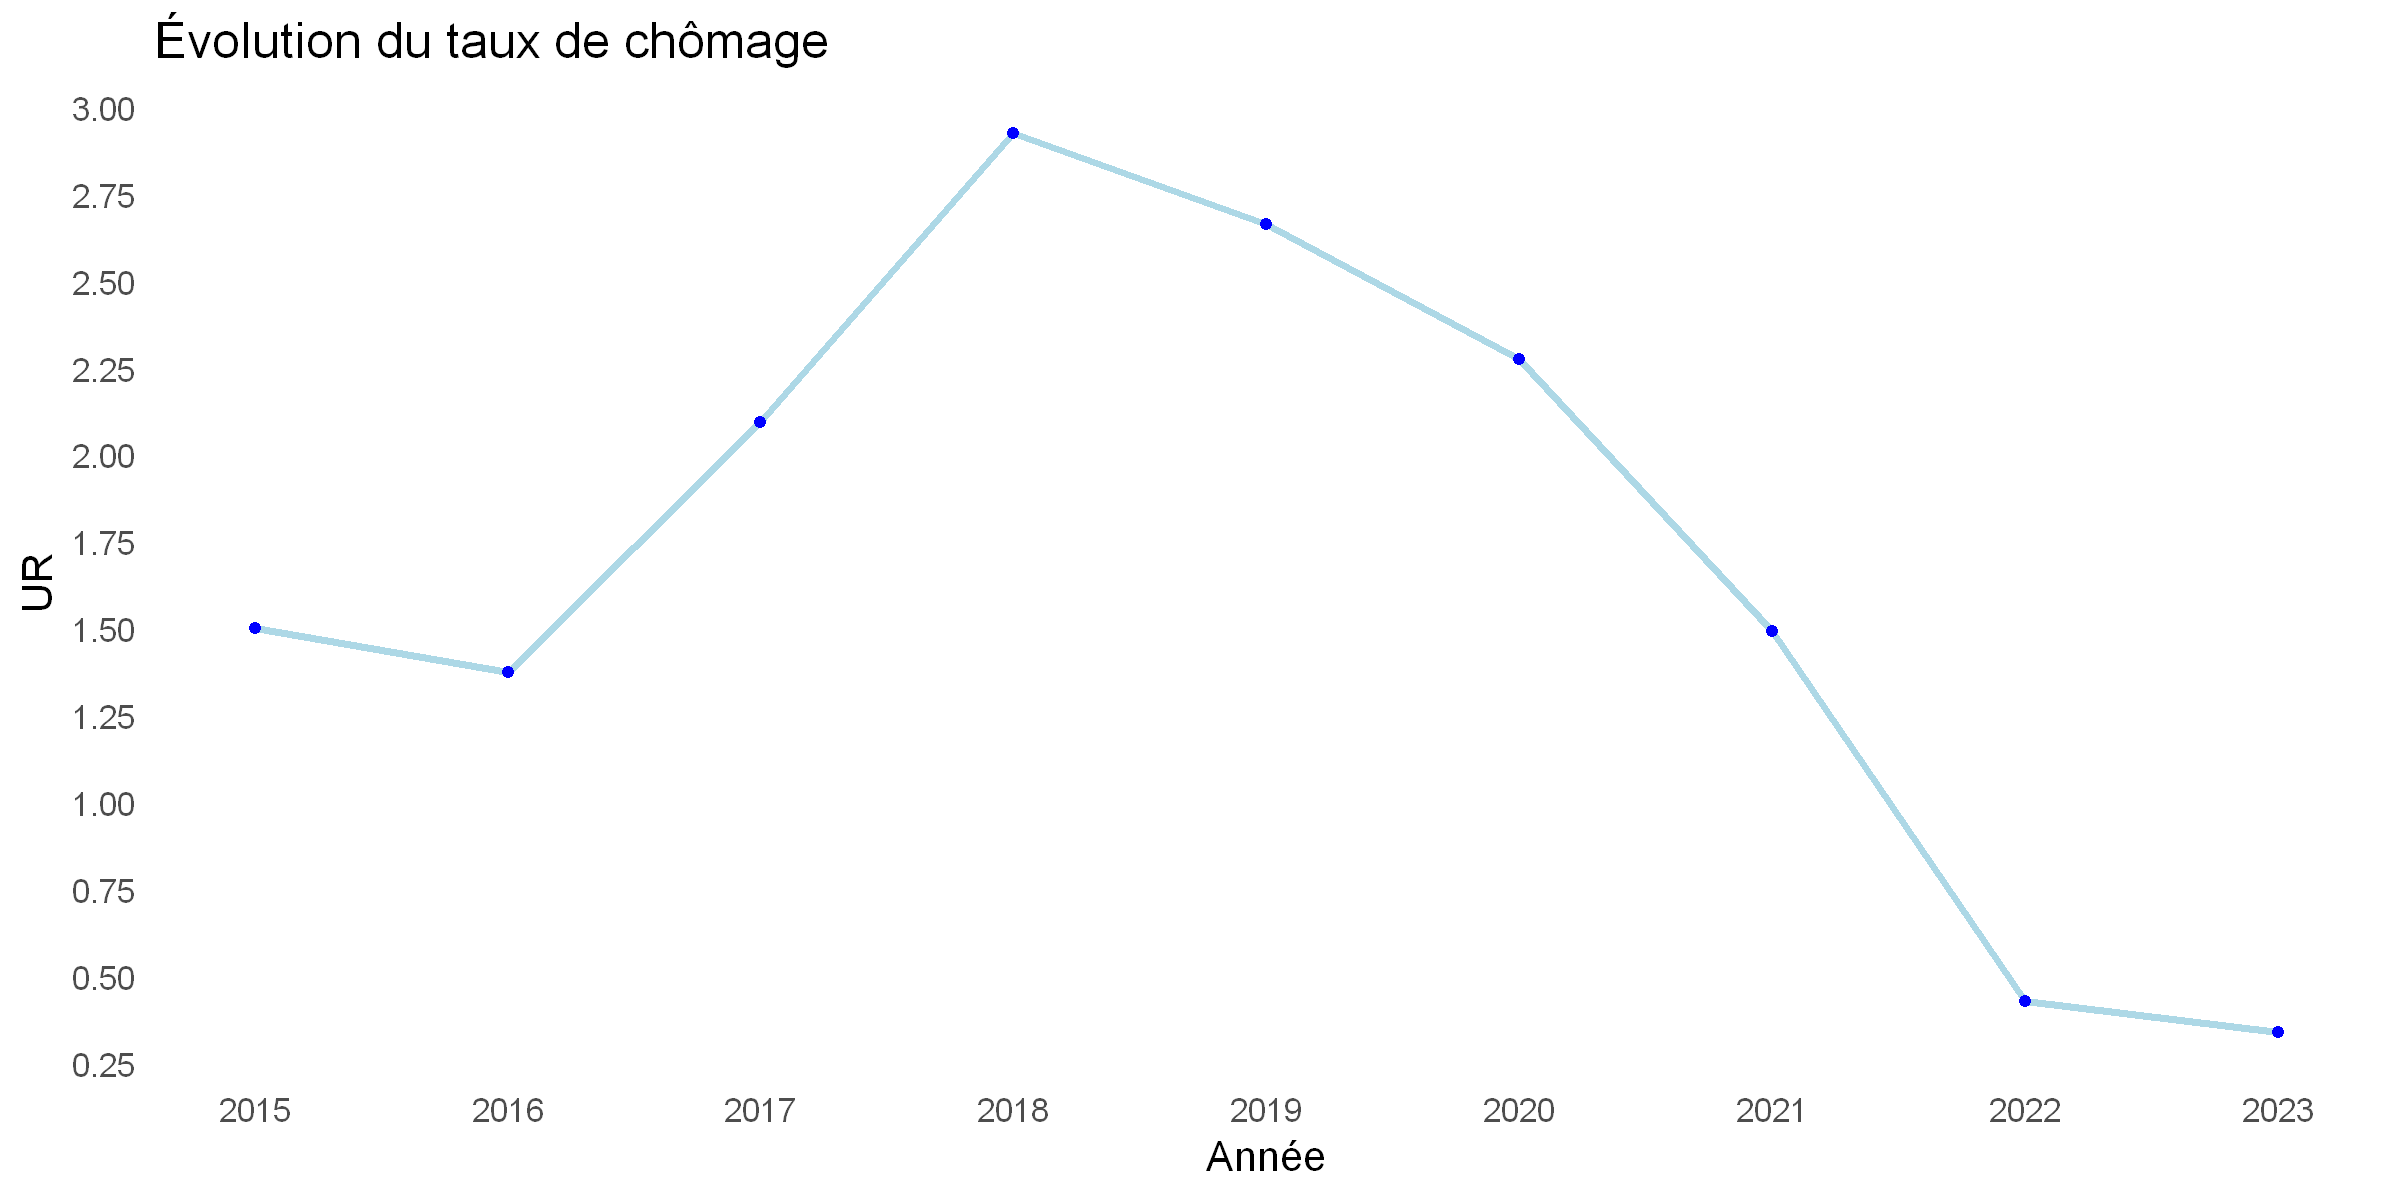

In [116]:
graph_ind

## L'âge

In [117]:
print(unique(combined_data$age))

 [1] 37.5 45.5 32.5 27.5 22.5 27.0 22.0 37.0 44.5 32.0   NA 39.5 21.0 29.5 28.0
[16] 34.0 35.0 42.0 45.0 43.0 30.0 25.0 33.0 26.0 38.0 36.0 39.0 24.0 23.0 29.0
[31] 44.0 31.0 40.0 41.0 20.0 19.0 18.0


In [118]:
age_par_annee_type_dev = combined_data %>%
  filter(!is.na(age)) %>%
  group_by(Year,type_developpeur) %>%
  summarise(
    Q25 = quantile(age, 0.25, na.rm = TRUE),
    Q50 = median(age, na.rm = TRUE),
    Q75 = quantile(age, 0.75, na.rm = TRUE),
    Mean = mean(age, na.rm = TRUE),
    Mode = as.numeric(names(sort(table(age), decreasing = TRUE)[1]))
  )

`summarise()` has grouped output by 'Year'. You can override using the `.groups` argument.


In [119]:
head(age_par_annee_type_dev, 5)

Year,type_developpeur,Q25,Q50,Q75,Mean,Mode
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2015,back-end developer,27.5,32.5,37.50,32.19266,27.5
2015,bi / dw expert,32.5,32.5,37.50,34.01282,32.5
2015,data scientist / machine learning,27.5,32.5,36.25,31.90164,27.5
2015,database administrator,27.5,32.5,45.50,34.01724,27.5
2015,developer,27.5,32.5,45.50,33.87647,27.5


In [120]:
age_par_annee = combined_data %>%
  filter(!is.na(age)) %>%
  group_by(Year) %>%
  summarise(
    Age_min = min(age, na.rm = TRUE),
    Age_max = max(age, na.rm = TRUE),
    Q25 = quantile(age, 0.25, na.rm = TRUE),
    Q50 = median(age, na.rm = TRUE),
    Q75 = quantile(age, 0.75, na.rm = TRUE),
    Mean = mean(age, na.rm = TRUE),
    Mode = as.numeric(names(sort(table(age), decreasing = TRUE)[1]))
  )

In [121]:
age_par_annee

Year,Age_min,Age_max,Q25,Q50,Q75,Mean,Mode
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2015,22.5,45.5,27.5,32.5,37.5,32.27292,27.5
2016,22.0,44.5,27.0,32.0,37.0,31.45399,27.0
2018,21.0,39.5,29.5,29.5,39.5,31.34888,29.5
2019,18.0,45.0,27.0,31.0,36.0,31.61253,30.0
2020,18.0,45.0,27.0,31.0,37.0,31.88776,30.0
2021,21.0,39.5,29.5,29.5,39.5,32.15814,29.5
2022,21.0,39.5,29.5,29.5,39.5,32.62581,29.5
2023,21.0,39.5,29.5,29.5,39.5,32.45725,29.5


## L'ethnicity (% Blancs et % Non Blancs)

Sur les données de StackOverflow, nous ne disposons de cette variable que sur les années **2017-2022**.

In [122]:
calculate_ethnicity_percentages <- function(data, year, country_var, country, race_var) {
  
  data_filtered <- data %>% filter(!!sym(country_var) == country)
  
  data_filtered <- data_filtered %>% mutate(white = grepl("White or of European descent|European|White", !!sym(race_var), ignore.case = TRUE))
  
  total_responses <- nrow(data_filtered)
  white_responses <- sum(data_filtered$white, na.rm = TRUE)
  non_white_responses <- total_responses - white_responses
  
  white_percentage <- (white_responses / total_responses) * 100
  non_white_percentage <- (non_white_responses / total_responses) * 100
  
  return(data.frame(year = year, white_percentage = white_percentage, non_white_percentage = non_white_percentage))
}

In [123]:
variables <- data.frame(
  year = 2017:2022,
  country_var = c("Country", "Country", "Country", "Country", "Country", "Country"),
  country = c("United States", "United States", "United States", "United States", "United States of America", "United States of America"),
  race = c("Race", "RaceEthnicity", "Ethnicity", "Ethnicity", "Ethnicity", "Ethnicity")
)

In [124]:
results <- list()

for (i in 1:nrow(variables)) {
  year <- variables$year[i]
  country_var <- variables$country_var[i]
  country <- variables$country[i]
  race_var <- variables$race[i]
  data <- get(paste0("data_", year, "_active"))
  
  result <- calculate_ethnicity_percentages(data, year, country_var, country, race_var)
  results[[i]] <- result
}

final_results <- do.call(rbind, results)

In [125]:
final_results

year,white_percentage,non_white_percentage
<int>,<dbl>,<dbl>
2017,62.92342,37.07658
2018,82.11156,17.88844
2019,80.74753,19.25247
2020,81.12439,18.87561
2021,77.63279,22.36721
2022,78.59941,21.40059


## L'éducation

In [126]:
education_percentages <- combined_data %>%
  group_by(Year, niveau_d_etudes) %>%
  summarise(total = n(), .groups = 'drop') %>%
  group_by(Year) %>%
  mutate(
    percentage = (total / sum(total)) * 100
  ) %>%
  pivot_wider(names_from = niveau_d_etudes, values_from = percentage, values_fill = list(percentage = 0)) %>%
  ungroup()

In [127]:
select_max_percentages <- function(data) {
  data %>%
    
    pivot_longer(cols = `<= High School`:`Some College`, names_to = "niveau_d_etudes", values_to = "percentage") %>%
    
    filter(percentage > 0) %>%
    
    group_by(Year, niveau_d_etudes) %>%
    summarise(max_percentage = max(percentage, na.rm = TRUE), .groups = 'drop') %>%
    
    pivot_wider(names_from = Year, values_from = max_percentage, values_fill = list(max_percentage = 0)) %>%
    ungroup()
}

In [128]:
result_final <- select_max_percentages(education_percentages)

In [129]:
result_final <- result_final %>%  pivot_longer(cols = -niveau_d_etudes, names_to = "Year", values_to = "Value") %>%
  pivot_wider(names_from = niveau_d_etudes, values_from = Value)

In [130]:
result_final

Year,<= High School,College,Other,Some College
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
2015,31.394102,26.56836,33.6193029,8.418231
2016,7.158031,14.96259,75.4594994,2.419876
2017,5.576583,73.18698,1.0093364,20.227101
2018,4.510729,75.74711,0.4409617,19.301202
2019,4.250290,76.12699,0.7682670,18.854455
2020,4.827378,75.44933,0.6163527,19.106935
2021,3.676499,77.75246,0.5656153,18.005420
2022,5.810886,74.98202,0.4396131,18.767485
2023,2.879230,81.06808,0.3313087,15.721385


## Pourcentage des femmes

In [131]:
print(unique(combined_data$genre))

 [1] "Male"                                             
 [2] "Female"                                           
 [3] "Prefer not to disclose"                           
 [4] "Other"                                            
 [5] ""                                                 
 [6] NA                                                 
 [7] "Gender non-conforming"                            
 [8] " Transgender"                                     
 [9] "Transgender"                                      
[10] " Gender non-conforming"                           
[11] " Other"                                           
[12] " Female"                                          
[13] "Non-binary, genderqueer, or gender non-conforming"
[14] "Man"                                              
[15] "Woman"                                            
[16] "Prefer not to say"                                
[17] "Or, in your own words:"                           


In [132]:
clean_gender <- function(data) {
  data$genre <- tolower(data$genre)
  data$genre <- gsub("woman", "female", data$genre)
  data$genre <- gsub("man", "male", data$genre)
  data$genre <- gsub("non-binary, genderqueer, or gender non-conforming", "non-binary", data$genre)
  return(data)
}

In [133]:
combined_data = clean_gender(combined_data)

In [134]:
combined_data <- combined_data %>%
  mutate(genre = str_trim(genre)) %>%  # Enlever les espaces à gauche et à droite
  mutate(genre = case_when(
    genre %in% c("other", "", NA, "prefer not to say", "prefer not to disclose", " or, in your own words:") ~ "not precised",
    genre == "transgender" | genre == " transgender" ~ "transgender",
    genre == "gender non-conforming" | genre == " gender non-conforming" ~ "gender non-conforming",
    TRUE ~ genre
  ))

In [135]:
print(unique(combined_data$genre))

[1] "male"                   "female"                 "not precised"          
[4] "gender non-conforming"  "transgender"            "non-binary"            
[7] "or, in your own words:"


## Par occupation par année

In [136]:
total_responses_by_devtype =  combined_data %>%
  group_by(Year, type_developpeur) %>%
  summarise(total = n())

percentage_female_by_devtype <- combined_data %>%
  filter(!is.na(genre) & grepl("female", genre, ignore.case = TRUE)) %>%
  group_by(Year, type_developpeur) %>%
  summarise(num_females = n()) %>%
  left_join(total_responses_by_devtype, by = c("Year", "type_developpeur")) %>%
  mutate(percentage_females = (num_females / total) * 100) %>%
  arrange(desc(year))

`summarise()` has grouped output by 'Year'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'Year'. You can override using the `.groups` argument.


In [137]:
head(percentage_female_by_devtype)

Year,type_developpeur,num_females,total,percentage_females
<dbl>,<chr>,<int>,<int>,<dbl>
2015,back-end developer,45,872,5.160550
2015,bi / dw expert,4,39,10.256410
2015,data scientist / machine learning,9,122,7.377049
2015,database administrator,2,29,6.896552
2015,developer,3,85,3.529412
2015,"developer, desktop or enterprise applications",13,396,3.282828


## Par année

In [138]:
total_responses_by_year =  combined_data %>%
  group_by(Year) %>%
  summarise(total = n())

percentage_female_by_year <- combined_data %>%
  filter(!is.na(genre) & grepl("female", genre, ignore.case = TRUE)) %>%
  group_by(Year) %>%
  summarise(num_females = n()) %>%
  left_join(total_responses_by_year, by = "Year") %>%
  mutate(percentage_females = (num_females / total) * 100) %>%
  arrange(desc(Year))

In [139]:
percentage_female_by_year

Year,num_females,total,percentage_females
<dbl>,<int>,<int>,<dbl>
2022,1459,25022,5.830869
2021,1407,25459,5.526533
2020,1941,23201,8.366019
2019,3473,42303,8.209820
2018,2613,35604,7.339063
2017,1339,19815,6.757507
2016,699,10827,6.456082
2015,174,3730,4.664879


# Traitement supplémentaire

In [140]:
glimpse(combined_data)

Rows: 198,638
Columns: 14
$ Year                         <dbl> 2015, 2015, 2015, 2015, 2015, 2015, 2015,…
$ pays                         <chr> "United States", "United States", "United…
$ genre                        <chr> "male", "male", "male", "male", "male", "…
$ experiences_en_programmation <chr> "11+ years", "11+ years", "11+ years", "6…
$ type_developpeur             <chr> "back-end developer", "back-end developer…
$ salaire                      <dbl> NA, 90000, 90000, 90000, 110000, 130000, …
$ statut_d_emploi              <chr> "employed, full-time", "independent contr…
$ satisfaction_travail         <chr> "I'm somewhat dissatisfied with my job", …
$ age                          <dbl> 37.5, 45.5, 37.5, 32.5, 45.5, 37.5, 32.5,…
$ niveau_d_etudes              <chr> "Some College", "Some College", "Other", …
$ taille_entreprise            <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N…
$ competences                  <chr> "Mac OS X;C#;JavaScript;SQL Server;Git;SV…
$ tech_next   

In [141]:
print(names(combined_data))

 [1] "Year"                         "pays"                        
 [3] "genre"                        "experiences_en_programmation"
 [5] "type_developpeur"             "salaire"                     
 [7] "statut_d_emploi"              "satisfaction_travail"        
 [9] "age"                          "niveau_d_etudes"             
[11] "taille_entreprise"            "competences"                 
[13] "tech_next"                    "id"                          


In [142]:
print(unique(combined_data$taille_entreprise))

 [1] NA                                                  
 [2] ""                                                  
 [3] "10,000+ employees"                                 
 [4] "100-499 employees"                                 
 [5] "10-19 employees"                                   
 [6] "1,000-4,999 employees"                             
 [7] "5-9 employees"                                     
 [8] "1-4 employees"                                     
 [9] "20-99 employees"                                   
[10] "500-999 employees"                                 
[11] "5,000-9,999 employees"                             
[12] "I am not part of a company"                        
[13] "I am not sure"                                     
[14] "Other (please specify)"                            
[15] "10,000 or more employees"                          
[16] "20 to 99 employees"                                
[17] "100 to 499 employees"                              
[18] "1,000 to

In [143]:
combined_data$satisfaction_travail <- case_when(
  combined_data$satisfaction_travail %in% c("", "Other (please specify)") ~ "Not precised",
  combined_data$satisfaction_travail == "I'm somewhat dissatisfied with my job" ~ "Slightly dissatisfied",
  combined_data$satisfaction_travail == "I'm somewhat satisfied with my job" ~ "Slightly satisfied",
  combined_data$satisfaction_travail == "I love my job" ~ "Extremely satisfied",
  combined_data$satisfaction_travail == "I hate my job" ~ "Extremely dissatisfied",
  combined_data$satisfaction_travail == "I'm neither satisfied nor dissatisfied with my job" ~ "Neither satisfied nor dissatisfied",
  combined_data$satisfaction_travail == "I'm neither satisfied nor dissatisfied" ~ "Neither satisfied nor dissatisfied",
  combined_data$satisfaction_travail == "I don't have a job" ~ "Not precised",
  combined_data$satisfaction_travail == "3" ~ "Slightly dissatisfied",
  combined_data$satisfaction_travail == "6" ~ "Moderately satisfied",
  combined_data$satisfaction_travail == "9" ~ "Very satisfied",
  combined_data$satisfaction_travail == "8" ~ "Moderately satisfied",
  combined_data$satisfaction_travail == "7" ~ "Slightly satisfied",
  combined_data$satisfaction_travail == "5" ~ "Neither satisfied nor dissatisfied",
  combined_data$satisfaction_travail == "10" ~ "Extremely satisfied",
  combined_data$satisfaction_travail == "4" ~ "Slightly dissatisfied",
  combined_data$satisfaction_travail == "0" ~ "Very dissatisfied",
  combined_data$satisfaction_travail == "1" ~ "Very dissatisfied",
  combined_data$satisfaction_travail == "2" ~ "Very dissatisfied",
  TRUE ~ combined_data$satisfaction_travail
)

In [144]:
copie_combined_data = combined_data

In [145]:
convert_taille_entreprise <- function(taille_entreprise) {
  case_when(
    taille_entreprise == "Just me - I am a freelancer, sole proprietor, etc." ~ 1,
    taille_entreprise == "Fewer than 10 employees" ~ 10,
    taille_entreprise %in% c("10,000+ employees", "10,000 or more employees") ~ 10000,
    taille_entreprise %in% c("2-9 employees", "2 to 9 employees") ~ 5,
    taille_entreprise %in% c("10-19 employees", "10 to 19 employees") ~ 15,
    taille_entreprise %in% c("20-99 employees", "20 to 99 employees") ~ 60,
    taille_entreprise %in% c("100-499 employees", "100 to 499 employees") ~ 300,
    taille_entreprise %in% c("1,000-4,999 employees", "1,000 to 4,999 employees") ~ 3000,
    taille_entreprise %in% c("500-999 employees", "500 to 999 employees") ~ 750,
    taille_entreprise %in% c("5,000-9,999 employees", "5,000 to 9,999 employees") ~ 7500,
    taille_entreprise %in% c("I am not part of a company", "I am not sure", "Other (please specify)", "I don't know", "I don’t know", "I prefer not to answer", "") ~ NA_real_,
    is.na(taille_entreprise) ~ NA_real_,
    TRUE ~ as.numeric(taille_entreprise)
  )
}

# Appliquer la fonction à votre DataFrame
copie_combined_data <- copie_combined_data %>%
  mutate(taille_entreprise_numeric = convert_taille_entreprise(taille_entreprise))

Warning message:
"There was 1 warning in `mutate()`.
ℹ In argument: `taille_entreprise_numeric = convert_taille_entreprise(taille_entreprise)`.
Caused by warning:
! NAs introduits lors de la conversion automatique"


In [146]:
print(unique(copie_combined_data$taille_entreprise))

 [1] NA                                                  
 [2] ""                                                  
 [3] "10,000+ employees"                                 
 [4] "100-499 employees"                                 
 [5] "10-19 employees"                                   
 [6] "1,000-4,999 employees"                             
 [7] "5-9 employees"                                     
 [8] "1-4 employees"                                     
 [9] "20-99 employees"                                   
[10] "500-999 employees"                                 
[11] "5,000-9,999 employees"                             
[12] "I am not part of a company"                        
[13] "I am not sure"                                     
[14] "Other (please specify)"                            
[15] "10,000 or more employees"                          
[16] "20 to 99 employees"                                
[17] "100 to 499 employees"                              
[18] "1,000 to

In [147]:
print(unique(copie_combined_data$experiences_en_programmation))

 [1] "11+ years"          "6 - 10 years"       "2 - 5 years"       
 [4] "1 - 2 years"        "Less than 1 year"   ""                  
 [7] NA                   "13"                 "8"                 
[10] "1.5"                "3.5"                "0.5"               
[13] "14 to 15 years"     "9 to 10 years"      "12 to 13 years"    
[16] "11 to 12 years"     "20 or more years"   "2 to 3 years"      
[19] "5 to 6 years"       "15 to 16 years"     "17 to 18 years"    
[22] "4 to 5 years"       "1 to 2 years"       "18 to 19 years"    
[25] "10 to 11 years"     "13 to 14 years"     "7 to 8 years"      
[28] "3 to 4 years"       "8 to 9 years"       "19 to 20 years"    
[31] "6 to 7 years"       "16 to 17 years"     "Less than a year"  
[34] "18-20 years"        "9-11 years"         "30 or more years"  
[37] "3-5 years"          "6-8 years"          "12-14 years"       
[40] "15-17 years"        "0-2 years"          "21-23 years"       
[43] "24-26 years"        "27-29 years"        "

In [148]:
glimpse(copie_combined_data)

Rows: 198,638
Columns: 15
$ Year                         <dbl> 2015, 2015, 2015, 2015, 2015, 2015, 2015,…
$ pays                         <chr> "United States", "United States", "United…
$ genre                        <chr> "male", "male", "male", "male", "male", "…
$ experiences_en_programmation <chr> "11+ years", "11+ years", "11+ years", "6…
$ type_developpeur             <chr> "back-end developer", "back-end developer…
$ salaire                      <dbl> NA, 90000, 90000, 90000, 110000, 130000, …
$ statut_d_emploi              <chr> "employed, full-time", "independent contr…
$ satisfaction_travail         <chr> "Slightly dissatisfied", "Slightly satisf…
$ age                          <dbl> 37.5, 45.5, 37.5, 32.5, 45.5, 37.5, 32.5,…
$ niveau_d_etudes              <chr> "Some College", "Some College", "Other", …
$ taille_entreprise            <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N…
$ competences                  <chr> "Mac OS X;C#;JavaScript;SQL Server;Git;SV…
$ tech_next   

In [149]:
convert_experience_to_numeric <- function(experience) {
  case_when(
    experience == "Less than 1 year" ~ 0.5,
    experience == "Less than a year" ~ 0.5,
    experience == "0-2 years" ~ 1,
    experience == "1 - 2 years" ~ 1.5,
    experience == "1 to 2 years" ~ 1.5,
    experience == "1.5" ~ 1.5,
    experience == "2 - 5 years" ~ 3.5,
    experience == "2 to 3 years" ~ 2.5,
    experience == "3 - 5 years" ~ 4,
    experience == "3 to 4 years" ~ 3.5,
    experience == "3.5" ~ 3.5,
    experience == "4 to 5 years" ~ 4.5,
    experience == "5 to 6 years" ~ 5.5,
    experience == "6 - 10 years" ~ 8,
    experience == "6 to 7 years" ~ 6.5,
    experience == "6-8 years" ~ 7,
    experience == "7 to 8 years" ~ 7.5,
    experience == "8 to 9 years" ~ 8.5,
    experience == "8" ~ 8,
    experience == "9 to 10 years" ~ 9.5,
    experience == "9 to 11 years" ~ 10,
    experience == "9-11 years" ~ 10,
    experience == "9" ~ 9,
    experience == "10 to 11 years" ~ 10.5,
    experience == "10" ~ 10,
    experience == "11 - 12 years" ~ 11.5,
    experience == "11 to 12 years" ~ 11.5,
    experience == "11+ years" ~ 11,
    experience == "12 - 13 years" ~ 12.5,
    experience == "12 to 13 years" ~ 12.5,
    experience == "12-14 years" ~ 13,
    experience == "12" ~ 12,
    experience == "13 to 14 years" ~ 13.5,
    experience == "13" ~ 13,
    experience == "14 to 15 years" ~ 14.5,
    experience == "14" ~ 14,
    experience == "15 to 16 years" ~ 15.5,
    experience == "15-17 years" ~ 16,
    experience == "15" ~ 15,
    experience == "16 to 17 years" ~ 16.5,
    experience == "16" ~ 16,
    experience == "17 to 18 years" ~ 17.5,
    experience == "17" ~ 17,
    experience == "18 to 19 years" ~ 18.5,
    experience == "18-20 years" ~ 19,
    experience == "18" ~ 18,
    experience == "19 to 20 years" ~ 19.5,
    experience == "19" ~ 19,
    experience == "20 or more years" ~ 20,
    experience == "21-23 years" ~ 22,
    experience == "24-26 years" ~ 25,
    experience == "27-29 years" ~ 28,
    experience == "30 or more years" ~ 30,
    experience == "35" ~ 35,
    experience == "37" ~ 37,
    experience == "40" ~ 40,
    experience == "39" ~ 39,
    experience == "38" ~ 38,
    experience == "41" ~ 41,
    experience == "42" ~ 42,
    experience == "43" ~ 43,
    experience == "46" ~ 46,
    experience == "More than 50 years" ~ 50,
    experience == "" ~ NA_real_,
    is.na(experience) ~ NA_real_,
    TRUE ~ as.numeric(experience)
  )
}

In [150]:
copie_combined_data <- copie_combined_data %>%
  mutate(experiences_en_programmation = convert_experience_to_numeric(experiences_en_programmation))

Warning message:
"There was 1 warning in `mutate()`.
ℹ In argument: `experiences_en_programmation = convert_experience_to_numeric(experiences_en_programmation)`.
Caused by warning:
! NAs introduits lors de la conversion automatique"


In [151]:
print(unique(copie_combined_data$experiences_en_programmation))

 [1] 11.0  8.0  3.5  1.5  0.5   NA 13.0 14.5  9.5 12.5 11.5 20.0  2.5  5.5 15.5
[16] 17.5  4.5 18.5 10.5 13.5  7.5  8.5 19.5  6.5 16.5 19.0 10.0 30.0  7.0 16.0
[31]  1.0 22.0 25.0 28.0  3.0 17.0 12.0  4.0 14.0 35.0 15.0  6.0  2.0  9.0  5.0
[46] 21.0 23.0 24.0 18.0 37.0 31.0 29.0 26.0 27.0 32.0 36.0 33.0 34.0 38.0 40.0
[61] 39.0 43.0 46.0 42.0 41.0 50.0


In [152]:
combined_data = copie_combined_data

In [153]:
glimpse(combined_data)

Rows: 198,638
Columns: 15
$ Year                         <dbl> 2015, 2015, 2015, 2015, 2015, 2015, 2015,…
$ pays                         <chr> "United States", "United States", "United…
$ genre                        <chr> "male", "male", "male", "male", "male", "…
$ experiences_en_programmation <dbl> 11.0, 11.0, 11.0, 8.0, 11.0, 11.0, 11.0, …
$ type_developpeur             <chr> "back-end developer", "back-end developer…
$ salaire                      <dbl> NA, 90000, 90000, 90000, 110000, 130000, …
$ statut_d_emploi              <chr> "employed, full-time", "independent contr…
$ satisfaction_travail         <chr> "Slightly dissatisfied", "Slightly satisf…
$ age                          <dbl> 37.5, 45.5, 37.5, 32.5, 45.5, 37.5, 32.5,…
$ niveau_d_etudes              <chr> "Some College", "Some College", "Other", …
$ taille_entreprise            <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N…
$ competences                  <chr> "Mac OS X;C#;JavaScript;SQL Server;Git;SV…
$ tech_next   

# Le Salaire

In [154]:
calculate_mode <- function(x) {
  uniq_x <- unique(na.omit(x))
  freq <- tabulate(match(x, uniq_x))
  modes <- uniq_x[freq == max(freq)]
  return(modes)
}

In [155]:
print(unique(combined_data$salaire)[1:10])

 [1]     NA  90000 110000 130000  30000  70000 150000 170000  50000  10000


In [156]:
n_non_declare = combined_data %>% filter(is.na(salaire) | salaire=="") %>% nrow()

In [157]:
n_non_declare

[1] 42178

In [158]:
n_non_declare / nrow(combined_data)

[1] 0.212336

In [159]:
salary_stats <- function(data) {
  
  if (nrow(data) == 0) {
    stop("Aucune donnée disponible pour le pays spécifié.")
  }
  
  stats_by_dev_type <- data %>%
    group_by(Year, type_developpeur) %>%
    summarise(
      total = n(),
      min = min(salaire, na.rm = TRUE),
      max = max(salaire, na.rm = TRUE),
      mean = mean(salaire, na.rm = TRUE),
      median = median(salaire, na.rm = TRUE),
      mode = calculate_mode(salaire)[1],
      q25 = quantile(salaire, 0.25, na.rm = TRUE),
      q75 = quantile(salaire, 0.75, na.rm = TRUE),
      Q1 = quantile(salaire, 0.01, na.rm = TRUE),
      Q1 = quantile(salaire, 0.99, na.rm = TRUE),
    ) %>%
    arrange(desc(mean))
  
  return(stats_by_dev_type)
}

In [160]:
print(unique(combined_data %>% filter(Year == 2023) %>% select(type_developpeur)) %>% tail(20))

# A tibble: 20 × 1
   type_developpeur                 
   <chr>                            
 1 engineering manager              
 2 Not specified                    
 3 data scientist / machine learning
 4 educator / academic researcher   
 5 mobile developer                 
 6 embedded developer               
 7 developer advocate               
 8 manager                          
 9 security professional            
10 hardware engineer                
11 graphic designer / graphics      
12 cloud infrastructure engineer    
13 devops                           
14 research & development role      
15 database administrator           
16 site reliability engineer        
17 developer experience             
18 blockchain                       
19 marketing or sales professional  
20 student                          


In [161]:
salary_stats(combined_data) %>% arrange(desc(Year)) %>% head(50)

`summarise()` has grouped output by 'Year'. You can override using the `.groups` argument.


Year,type_developpeur,total,min,max,mean,median,mode,q25,q75,Q1
<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2023,"senior executive (c-suite, vp, etc.)",245,60,11000000,372169.6,217500.0,300000,155750.0,300000,4637000
2023,engineering manager,456,11900,3000000,228011.8,195000.0,200000,155000.0,245000,960000
2023,developer advocate,31,50000,600000,221078.0,180000.0,160000,125000.0,250000,580000
2023,blockchain,39,40000,1000000,217776.8,160000.0,120000,112500.0,285000,881200
2023,manager,132,1,1200000,216561.0,161000.0,200000,100000.0,235000,876000
2023,cloud infrastructure engineer,255,64600,1000000,212667.2,185000.0,200000,139522.8,237750,881000
2023,developer experience,82,40000,580000,212509.4,200000.0,250000,144000.0,250000,490300
2023,data scientist / machine learning,390,185,9000000,211070.9,143000.0,120000,113000.0,200000,892000
2023,site reliability engineer,124,37000,630000,198053.8,180000.0,150000,130000.0,240000,500000


In [162]:
#combined_data <- clean_numeric_values(combined_data)

Pour l'année 2022, la variable type de développeur a plusieurs modalités, voir cela avec Mme GOUSSE.

In [163]:
detect_outliers <- function(data) {
  data %>%
    group_by(Year) %>%
    mutate(
      Q1 = quantile(salaire, 0.01, na.rm = TRUE),
      Q99 = quantile(salaire, 0.99, na.rm = TRUE),
      is_outlier = salaire < Q1 | salaire > Q99,
      salaire_corrected = ifelse(is_outlier, NA, salaire)
    ) %>%
    filter(salaire < Q1 | salaire > Q99) %>%
    ungroup() #%>%
    #select(-Q10, -Q90n,)
}

In [164]:
detect_outliers(combined_data) %>% 
filter(Year==2022) %>%
arrange(desc(salaire)) %>% nrow()

[1] 379

### Yearly Wage Distribution

In [165]:
salary_stats_yearly <- function(data) {
  
  if (nrow(data) == 0) {
    stop("Aucune donnée disponible pour le pays spécifié.")
  }
  
  stats_by_dev_type <- data %>%
    group_by(Year) %>%
    summarise(
      total = n(),
      min = min(salaire, na.rm = TRUE),
      max = max(salaire, na.rm = TRUE),
      mean = mean(salaire, na.rm = TRUE),
      median = median(salaire, na.rm = TRUE),
      mode = calculate_mode(salaire)[1],
      q25 = quantile(salaire, 0.25, na.rm = TRUE),
      q75 = quantile(salaire, 0.75, na.rm = TRUE),
      q1 = quantile(salaire, 0.01, na.rm = TRUE),
      q99 = quantile(salaire, 0.99, na.rm = TRUE), 
    ) %>%
    arrange(desc(mean))
  
  return(stats_by_dev_type)
}

In [166]:
salary_stats_yearly(combined_data)

Year,total,min,max,mean,median,mode,q25,q75,q1,q99
<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2022,25022,36,35000000,386064.97,140000,150000,100000,200000,21768,6750000
2019,42303,0,2000000,251493.56,110000,2000000,79000,155000,12000,2000000
2021,25459,1,21822250,249938.93,120000,150000,85000,165000,18000,4250000
2020,23201,0,2000000,212568.99,110422,120000,80000,152000,12000,2000000
2023,12677,1,11000000,168625.58,145000,150000,105000,195000,35000,550000
2018,35604,0,2000000,153513.49,98000,120000,72000,130000,1800,2000000
2016,10827,5000,210000,96811.06,95000,75000,65000,125000,5000,210000
2017,19815,5,197000,96448.75,94500,120000,70000,120000,19040,180000
2015,3730,10000,170000,92378.30,90000,90000,70000,110000,10000,170000


### Histogramme des salaires par année

In [167]:
plot_salary_histograms <- function(data) {
  ggplot(data, aes(x = salaire)) +
    geom_histogram(binwidth = 10000, fill = "blue", color = "black", alpha = 0.7) +
    facet_wrap(~ Year, scales = "free") +
    labs(title = "Histogrammes des Salaires par Année", x = "Salaire", y = "Fréquence") +
    theme_minimal(base_size = 25)
}

In [168]:
# Spécification de la taille du graphique
options(repr.plot.width=20, repr.plot.height=10)

Warning message:
"Removed 42178 rows containing non-finite outside the scale range (`stat_bin()`)."


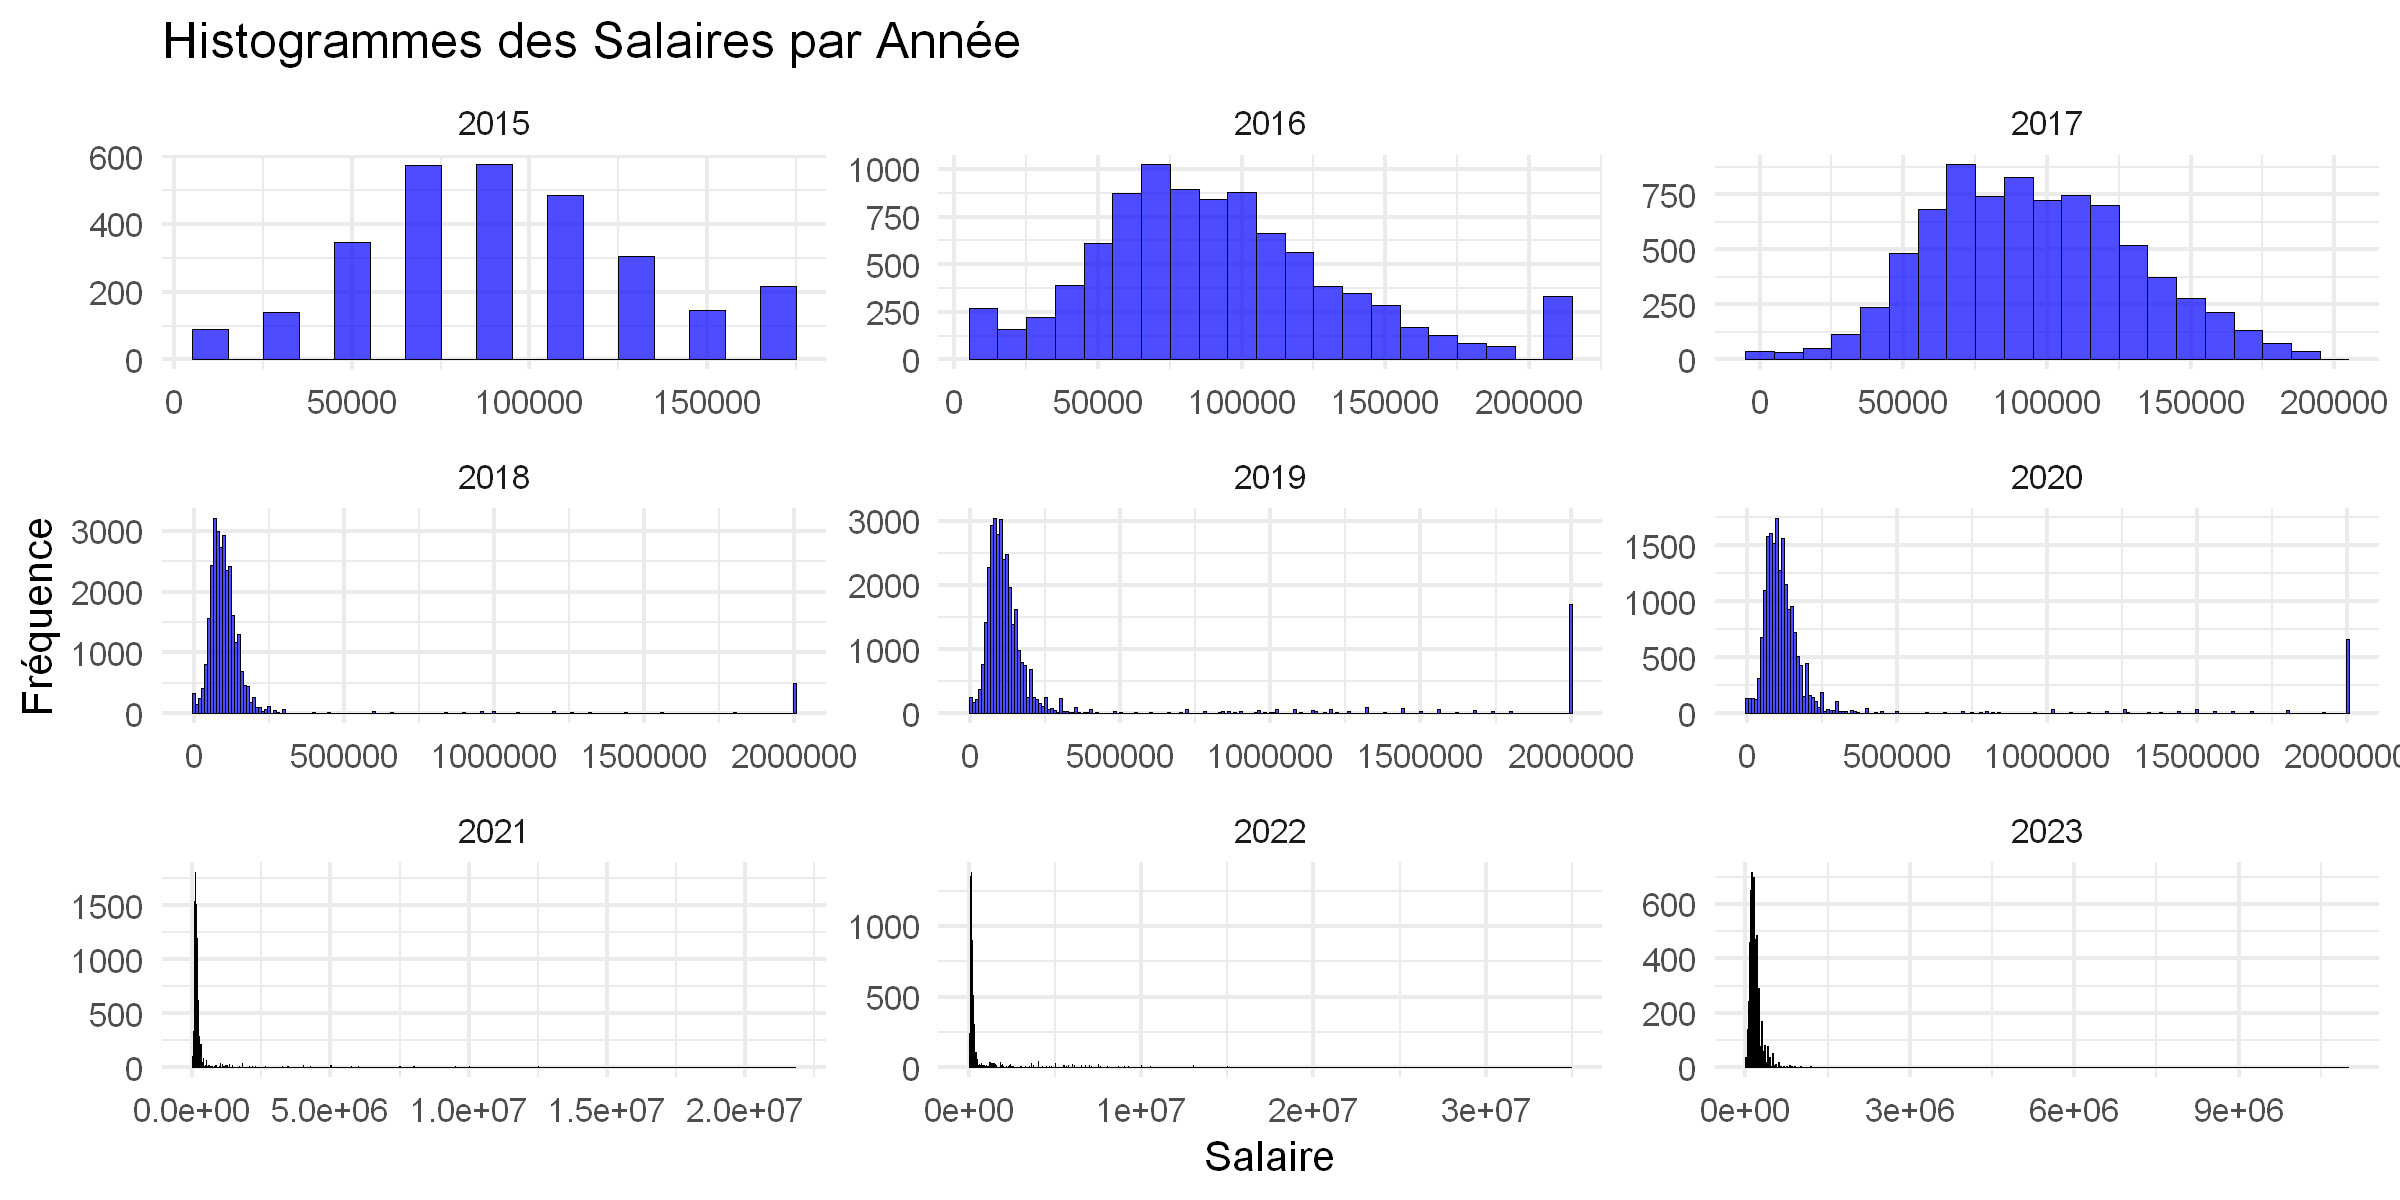

In [169]:
plot_salary_histograms(combined_data)

In [170]:
# Spécification de la taille du graphique
options(repr.plot.width=60, repr.plot.height=40)

In [171]:
plot_salary_boxplots <- function(data) {
  ggplot(data, aes(x = as.factor(Year), y = salaire)) +
    geom_boxplot(fill = "blue", color = "black", alpha = 0.7) +
    labs(title = "Boxplots des Salaires par Année", x = "Année", y = "Salaire") +
    scale_y_continuous(labels = scales::comma, breaks = seq(0, max(data$salaire, na.rm = TRUE), by = 250000)) +
    theme_minimal(base_size = 30)
}

Warning message:
"Removed 42178 rows containing non-finite outside the scale range (`stat_boxplot()`)."


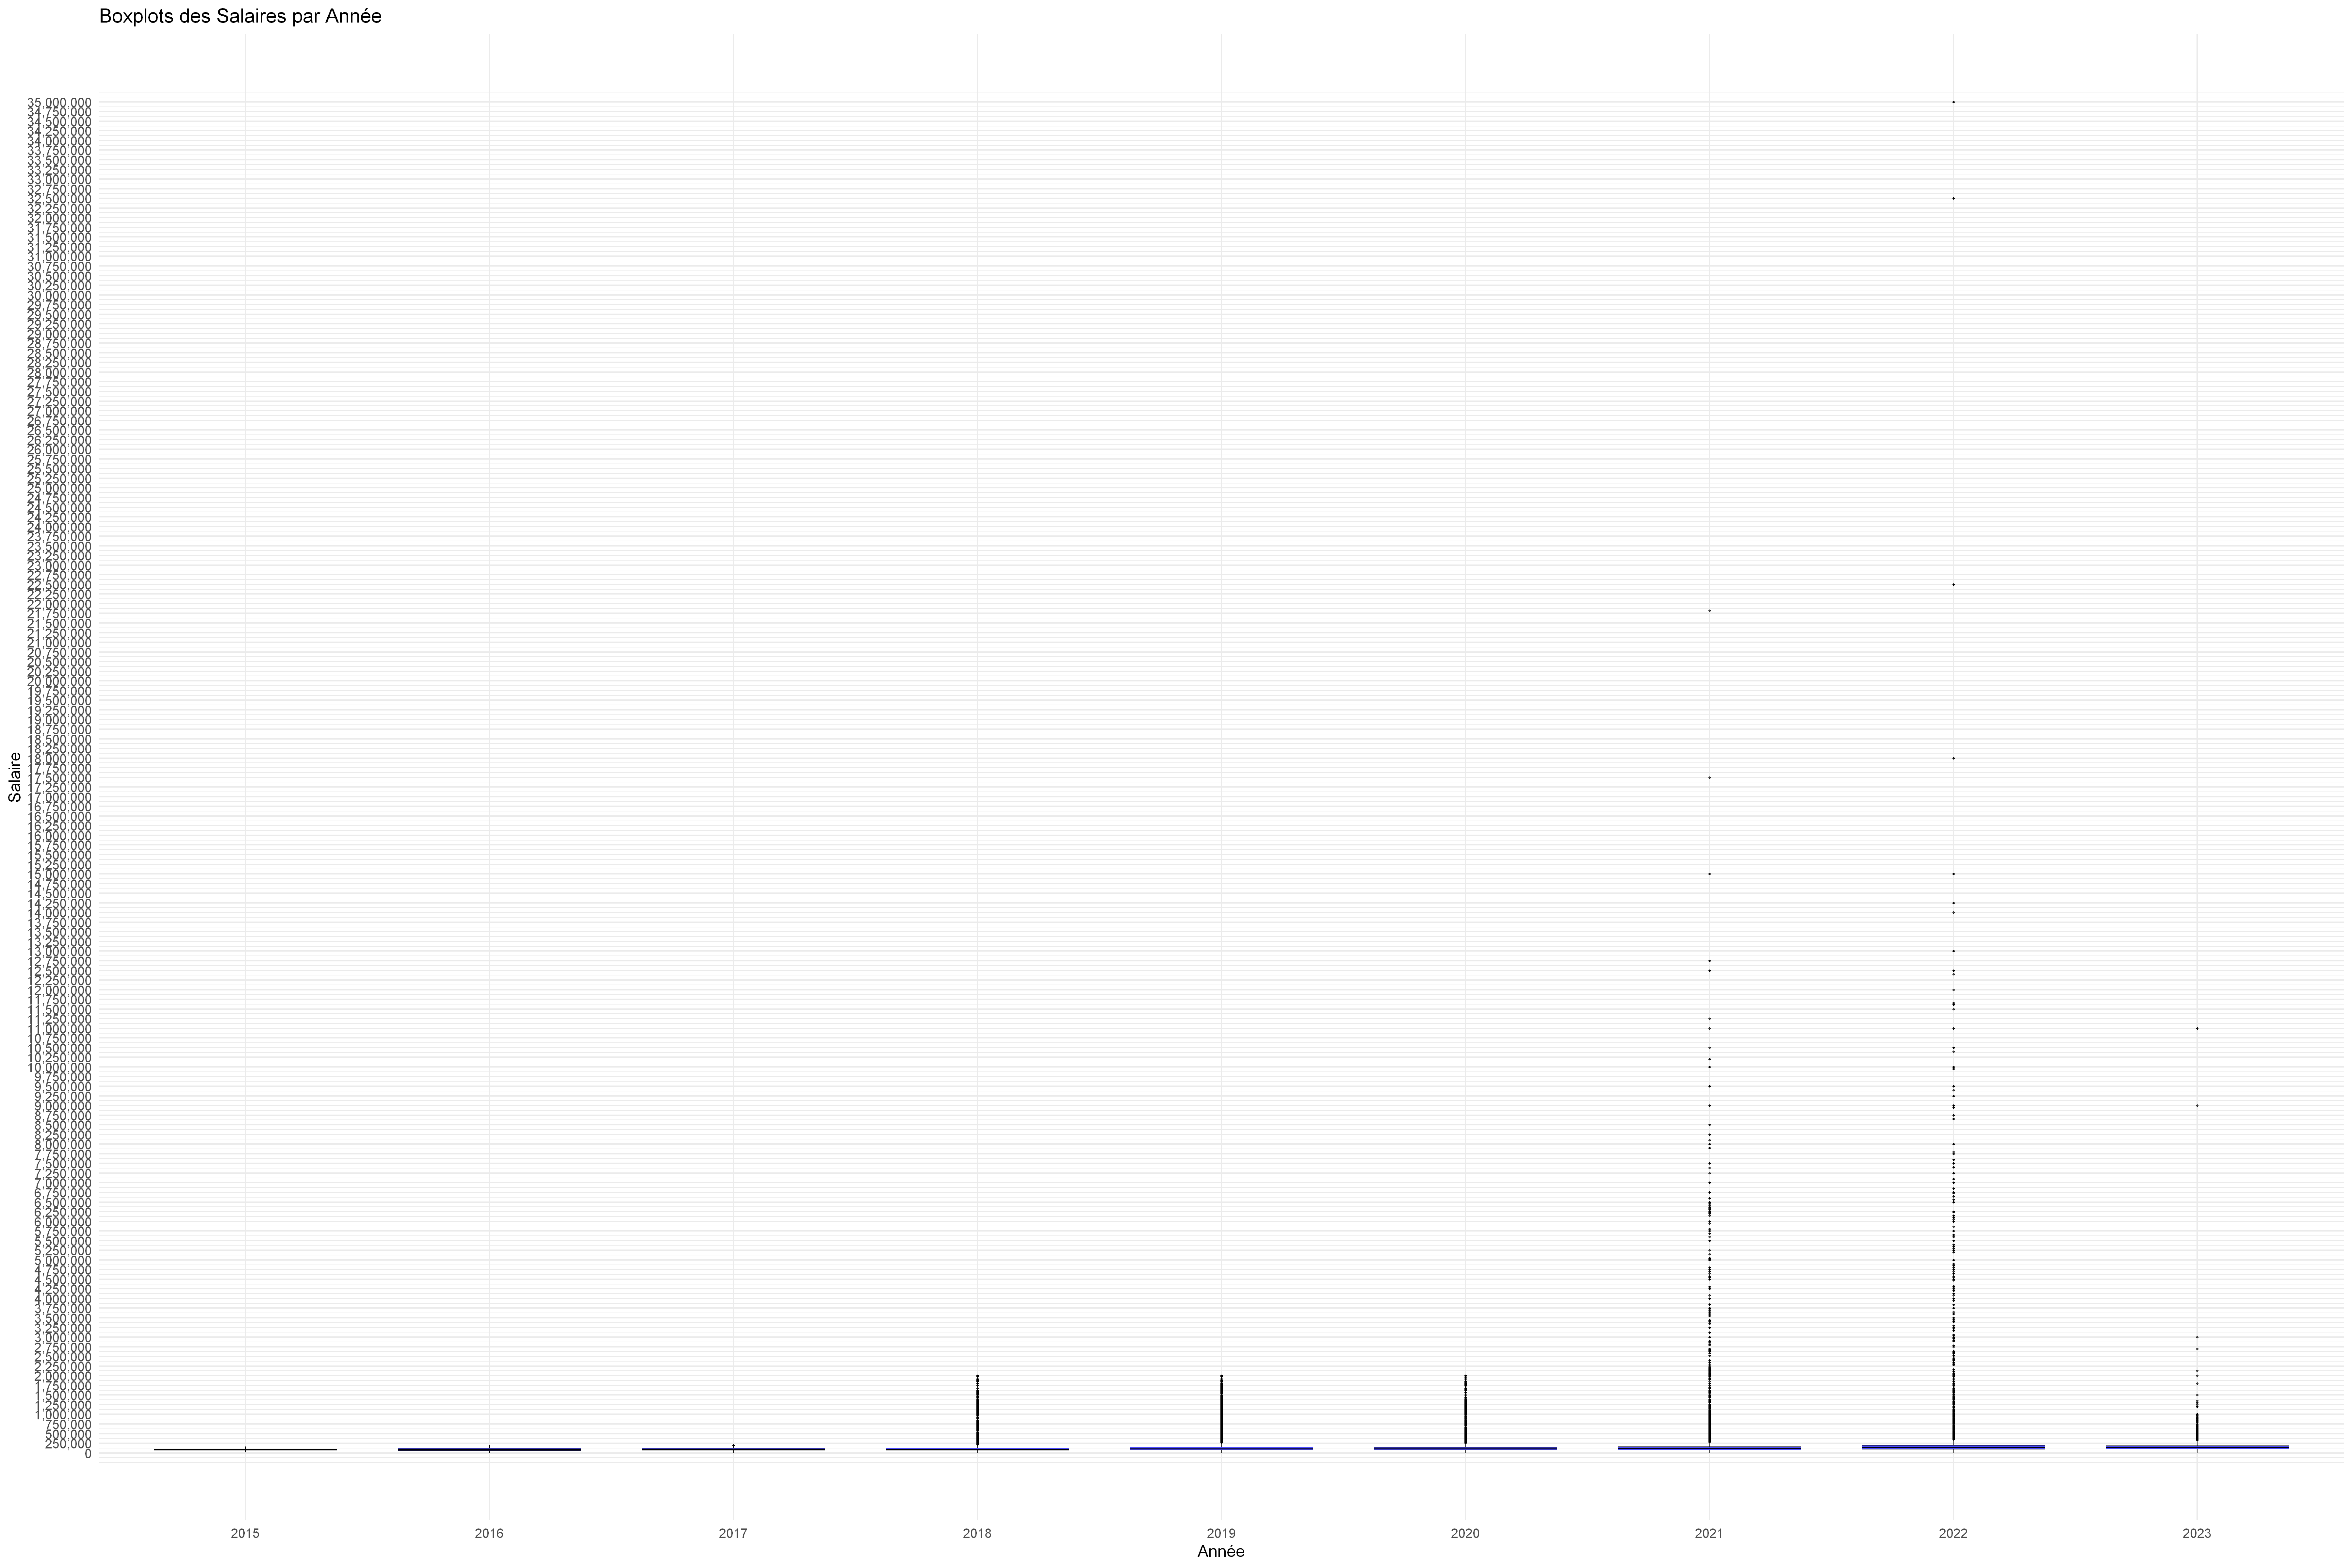

In [172]:
plot_salary_boxplots(combined_data)

## Corrigeons les salaires sur les données de 2018 - 2023

In [173]:
detect_outliers1pourcent <- function(data) {
  data %>%
    group_by(Year) %>%
    mutate(
      Q1 = quantile(salaire, 0.01, na.rm = TRUE),
      Q99 = quantile(salaire, 0.99, na.rm = TRUE),
      is_outlier = salaire < Q1 | salaire > Q99,
      salaire_corrected = ifelse(is_outlier, NA, salaire)
    ) %>%
    ungroup()# %>%
    #select(-Q10, -Q90, -is_outlier)
}

In [174]:
donnees_salaires_corrected = detect_outliers1pourcent(combined_data)

In [175]:
sum(donnees_salaires_corrected$is_outlier,na.rm = T)

[1] 1932

In [176]:
donnees_salaires_corrected %>% filter(is.na(salaire)) %>% select(c(salaire, is_outlier, salaire_corrected)) %>% unique()

salaire,is_outlier,salaire_corrected
<dbl>,<lgl>,<dbl>
NA,NA,NA


In [177]:
sum(is.na(donnees_salaires_corrected$is_outlier))

[1] 42178

In [178]:
salary_stats_yearly_corrected <- function(data) {
  
  if (nrow(data) == 0) {
    stop("Aucune donnée disponible pour le pays spécifié.")
  }
  
  stats_by_dev_type <- data %>%
    group_by(Year) %>%
    summarise(
      total = n(),
      min = min(salaire_corrected, na.rm = TRUE),
      max = max(salaire_corrected, na.rm = TRUE),
      mean = mean(salaire_corrected, na.rm = TRUE),
      median = median(salaire_corrected, na.rm = TRUE),
      mode = calculate_mode(salaire_corrected)[1],
      q25 = quantile(salaire_corrected, 0.25, na.rm = TRUE),
      q75 = quantile(salaire_corrected, 0.75, na.rm = TRUE),
      q99 = mean(Q99),
      q1 = mean(Q1)
    ) %>%
    arrange(desc(mean))
  
  return(stats_by_dev_type)
}

In [179]:
salary_stats_yearly_corrected(donnees_salaires_corrected)

Year,total,min,max,mean,median,mode,q25,q75,q99,q1
<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2022,25022,21768,6750000,288748.63,140000,150000,100000,200000,6750000,21768
2019,42303,12000,2000000,253840.02,110000,2000000,80000,155000,2000000,12000
2020,23201,12000,2000000,214634.43,112000,120000,81000,153000,2000000,12000
2021,25459,18000,4250000,183932.63,120000,150000,86000,165000,4250000,18000
2023,12677,35000,550000,160435.40,145000,150000,106000,195000,550000,35000
2018,35604,1800,2000000,155042.76,99000,120000,72500,130000,2000000,1800
2016,10827,5000,210000,96811.06,95000,75000,65000,125000,210000,5000
2017,19815,19040,180000,96702.01,95000,120000,70000,120000,180000,19040
2015,3730,10000,170000,92378.30,90000,90000,70000,110000,170000,10000


In [180]:
donnees_salaires_corrected %>%
    filter(Year == 2023 & !(is.na(salaire_corrected)) & !(is.na(type_developpeur))) %>%
    group_by(type_developpeur) %>%
    summarise(
      total = n(),
      min = min(salaire_corrected, na.rm = TRUE),
      max = max(salaire_corrected, na.rm = TRUE),
      mean = mean(salaire_corrected, na.rm = TRUE),
      median = median(salaire_corrected, na.rm = TRUE),
      mode = calculate_mode(salaire_corrected)[1],
      q25 = quantile(salaire_corrected, 0.25, na.rm = TRUE),
      q75 = quantile(salaire_corrected, 0.75, na.rm = TRUE),
      q99 = mean(Q99),
      q1 = mean(Q1)
    ) %>%
    arrange(desc(median))

type_developpeur,total,min,max,mean,median,mode,q25,q75,q99,q1
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
"senior executive (c-suite, vp, etc.)",154,50000,520000,233672.30,215000,300000,158500.00,283750.0,550000,35000
developer experience,69,40000,450000,207183.43,200000,250000,144000.00,250000.0,550000,35000
engineering manager,331,76000,550000,206045.69,190400,200000,155000.00,240000.0,550000,35000
security professional,84,35000,500000,193942.26,183000,120000,120000.00,250000.0,550000,35000
cloud infrastructure engineer,214,64600,500000,194704.62,180000,200000,138022.75,229250.0,550000,35000
site reliability engineer,102,37000,500000,193819.02,180000,150000,130000.00,238750.0,550000,35000
developer advocate,20,50000,500000,202131.90,177500,160000,122409.50,227500.0,550000,35000
back-end developer,1637,40000,550000,182161.25,164000,200000,125000.00,214000.0,550000,35000
mobile developer,236,50000,550000,183767.05,162000,200000,129044.50,215000.0,550000,35000


## Régression de la déclaration du salaire

In [181]:
copie_combined_data <- copie_combined_data %>%
  mutate(a_declare_salaire = case_when(
    !is.na(salaire) ~ 1,
    TRUE ~ 0
  ))

In [182]:
print(names(copie_combined_data))

 [1] "Year"                         "pays"                        
 [3] "genre"                        "experiences_en_programmation"
 [5] "type_developpeur"             "salaire"                     
 [7] "statut_d_emploi"              "satisfaction_travail"        
 [9] "age"                          "niveau_d_etudes"             
[11] "taille_entreprise"            "competences"                 
[13] "tech_next"                    "id"                          
[15] "taille_entreprise_numeric"    "a_declare_salaire"           


In [183]:
#copie_combined_data = copie_combined_data %>% 
#         separate_rows(tech_next, sep = ";")

In [184]:
#copie_combined_data = copie_combined_data %>% 
#         separate_rows(competences, sep = ";")

In [185]:
nrow(copie_combined_data)

[1] 198638

In [186]:
glimpse(copie_combined_data)

Rows: 198,638
Columns: 16
$ Year                         <dbl> 2015, 2015, 2015, 2015, 2015, 2015, 2015,…
$ pays                         <chr> "United States", "United States", "United…
$ genre                        <chr> "male", "male", "male", "male", "male", "…
$ experiences_en_programmation <dbl> 11.0, 11.0, 11.0, 8.0, 11.0, 11.0, 11.0, …
$ type_developpeur             <chr> "back-end developer", "back-end developer…
$ salaire                      <dbl> NA, 90000, 90000, 90000, 110000, 130000, …
$ statut_d_emploi              <chr> "employed, full-time", "independent contr…
$ satisfaction_travail         <chr> "Slightly dissatisfied", "Slightly satisf…
$ age                          <dbl> 37.5, 45.5, 37.5, 32.5, 45.5, 37.5, 32.5,…
$ niveau_d_etudes              <chr> "Some College", "Some College", "Other", …
$ taille_entreprise            <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N…
$ competences                  <chr> "Mac OS X;C#;JavaScript;SQL Server;Git;SV…
$ tech_next   

In [187]:
data_for_regression = copie_combined_data %>% select(-c(salaire, pays,id))

In [188]:
data_for_regression$genre <- as_factor(data_for_regression$genre)
data_for_regression$type_developpeur <- as_factor(data_for_regression$type_developpeur)
data_for_regression$statut_d_emploi <- as_factor(data_for_regression$statut_d_emploi)
data_for_regression$satisfaction_travail <- as_factor(data_for_regression$satisfaction_travail)
data_for_regression$niveau_d_etudes <- as_factor(data_for_regression$niveau_d_etudes)
#data_for_regression$competences <- as_factor(data_for_regression$competences)
#data_for_regression$tech_next <- as_factor(data_for_regression$tech_next)

In [189]:
#data_for_regression = data_for_regression %>% filter(Year == 2023)

In [190]:
data_for_regression = data_for_regression %>% select(-c(taille_entreprise,competences,tech_next))

In [191]:
glimpse(data_for_regression)

Rows: 198,638
Columns: 10
$ Year                         <dbl> 2015, 2015, 2015, 2015, 2015, 2015, 2015,…
$ genre                        <fct> "male", "male", "male", "male", "male", "…
$ experiences_en_programmation <dbl> 11.0, 11.0, 11.0, 8.0, 11.0, 11.0, 11.0, …
$ type_developpeur             <fct> "back-end developer", "back-end developer…
$ statut_d_emploi              <fct> "employed, full-time", "independent contr…
$ satisfaction_travail         <fct> Slightly dissatisfied, Slightly satisfied…
$ age                          <dbl> 37.5, 45.5, 37.5, 32.5, 45.5, 37.5, 32.5,…
$ niveau_d_etudes              <fct> Some College, Some College, Other, Colleg…
$ taille_entreprise_numeric    <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N…
$ a_declare_salaire            <dbl> 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,…


In [192]:
modele_logistique <- glm(a_declare_salaire ~ ., data = data_for_regression, family = binomial())

In [193]:
summary(modele_logistique)


Call:
glm(formula = a_declare_salaire ~ ., family = binomial(), data = data_for_regression)

Coefficients:
                                                                      Estimate
(Intercept)                                                          7.308e+01
Year                                                                -3.454e-02
genrefemale                                                          6.579e-02
genrenot precised                                                   -8.740e-01
genretransgender                                                     5.157e-01
genrenon-binary                                                      1.589e-01
experiences_en_programmation                                        -1.181e-02
type_developpeurbi / dw expert                                       1.294e+00
type_developpeurdata scientist / machine learning                   -9.830e-02
type_developpeurdatabase administrator                              -7.475e-02
type_developpeurgraphic

## Régression du log salaire sur les variables commune à IPIUMS

Cette régression ne concerne que les variables qui sont également disponible sur la base de IPIUMS, notamment:
- le niveau de salaire,
- le statut d'emploi
- l'éducation
- l'année
- le type de développeur
- le genre
- l'age

In [194]:
glimpse(copie_combined_data)

Rows: 198,638
Columns: 16
$ Year                         <dbl> 2015, 2015, 2015, 2015, 2015, 2015, 2015,…
$ pays                         <chr> "United States", "United States", "United…
$ genre                        <chr> "male", "male", "male", "male", "male", "…
$ experiences_en_programmation <dbl> 11.0, 11.0, 11.0, 8.0, 11.0, 11.0, 11.0, …
$ type_developpeur             <chr> "back-end developer", "back-end developer…
$ salaire                      <dbl> NA, 90000, 90000, 90000, 110000, 130000, …
$ statut_d_emploi              <chr> "employed, full-time", "independent contr…
$ satisfaction_travail         <chr> "Slightly dissatisfied", "Slightly satisf…
$ age                          <dbl> 37.5, 45.5, 37.5, 32.5, 45.5, 37.5, 32.5,…
$ niveau_d_etudes              <chr> "Some College", "Some College", "Other", …
$ taille_entreprise            <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N…
$ competences                  <chr> "Mac OS X;C#;JavaScript;SQL Server;Git;SV…
$ tech_next   

In [195]:
copie_combined_data = detect_outliers1pourcent(copie_combined_data)

In [196]:
glimpse(copie_combined_data)

Rows: 198,638
Columns: 20
$ Year                         <dbl> 2015, 2015, 2015, 2015, 2015, 2015, 2015,…
$ pays                         <chr> "United States", "United States", "United…
$ genre                        <chr> "male", "male", "male", "male", "male", "…
$ experiences_en_programmation <dbl> 11.0, 11.0, 11.0, 8.0, 11.0, 11.0, 11.0, …
$ type_developpeur             <chr> "back-end developer", "back-end developer…
$ salaire                      <dbl> NA, 90000, 90000, 90000, 110000, 130000, …
$ statut_d_emploi              <chr> "employed, full-time", "independent contr…
$ satisfaction_travail         <chr> "Slightly dissatisfied", "Slightly satisf…
$ age                          <dbl> 37.5, 45.5, 37.5, 32.5, 45.5, 37.5, 32.5,…
$ niveau_d_etudes              <chr> "Some College", "Some College", "Other", …
$ taille_entreprise            <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N…
$ competences                  <chr> "Mac OS X;C#;JavaScript;SQL Server;Git;SV…
$ tech_next   

In [197]:
copie_combined_data = copie_combined_data %>% select(-c(a_declare_salaire, Q1, Q99, is_outlier, salaire, pays, competences, tech_next, taille_entreprise))

In [198]:
glimpse(copie_combined_data)

Rows: 198,638
Columns: 11
$ Year                         <dbl> 2015, 2015, 2015, 2015, 2015, 2015, 2015,…
$ genre                        <chr> "male", "male", "male", "male", "male", "…
$ experiences_en_programmation <dbl> 11.0, 11.0, 11.0, 8.0, 11.0, 11.0, 11.0, …
$ type_developpeur             <chr> "back-end developer", "back-end developer…
$ statut_d_emploi              <chr> "employed, full-time", "independent contr…
$ satisfaction_travail         <chr> "Slightly dissatisfied", "Slightly satisf…
$ age                          <dbl> 37.5, 45.5, 37.5, 32.5, 45.5, 37.5, 32.5,…
$ niveau_d_etudes              <chr> "Some College", "Some College", "Other", …
$ id                           <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13…
$ taille_entreprise_numeric    <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N…
$ salaire_corrected            <dbl> NA, 90000, 90000, 90000, 110000, 130000, …


In [199]:
copie_combined_data$genre <- as_factor(copie_combined_data$genre)
copie_combined_data$type_developpeur <- as_factor(copie_combined_data$type_developpeur)
copie_combined_data$statut_d_emploi <- as_factor(copie_combined_data$statut_d_emploi)
copie_combined_data$satisfaction_travail <- as_factor(copie_combined_data$satisfaction_travail)
copie_combined_data$niveau_d_etudes <- as_factor(copie_combined_data$niveau_d_etudes)

In [200]:
## Supprimer les lignes avec salaire NA
copie_combined_data_NotNull = copie_combined_data %>% filter(!(is.na(salaire_corrected)))

In [201]:
glimpse(copie_combined_data_NotNull)

Rows: 154,528
Columns: 11
$ Year                         <dbl> 2015, 2015, 2015, 2015, 2015, 2015, 2015,…
$ genre                        <fct> "male", "male", "male", "male", "male", "…
$ experiences_en_programmation <dbl> 11.0, 11.0, 8.0, 11.0, 11.0, 11.0, 3.5, 1…
$ type_developpeur             <fct> "back-end developer", "back-end developer…
$ statut_d_emploi              <fct> "independent contractor, freelancer, or s…
$ satisfaction_travail         <fct> Slightly satisfied, Slightly satisfied, E…
$ age                          <dbl> 45.5, 37.5, 32.5, 45.5, 37.5, 32.5, 27.5,…
$ niveau_d_etudes              <fct> Some College, Other, College, Other, <= H…
$ id                           <int> 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 1…
$ taille_entreprise_numeric    <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N…
$ salaire_corrected            <dbl> 90000, 90000, 90000, 110000, 130000, 9000…


In [202]:
copie_combined_data_NotNull$log_salaire_corrected = log(copie_combined_data_NotNull$salaire_corrected)

In [203]:
copie_combined_data_NotNull = copie_combined_data_NotNull %>% select(-salaire_corrected)

### Régression Log Salaire

In [204]:
model = lm(log_salaire_corrected ~ ., data = copie_combined_data_NotNull)

In [205]:
summary(model)


Call:
lm(formula = log_salaire_corrected ~ ., data = copie_combined_data_NotNull)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.8467 -0.3969 -0.1350  0.1513  3.9948 

Coefficients:
                                                                      Estimate
(Intercept)                                                         -7.945e-01
Year                                                                 5.806e-03
genrefemale                                                         -1.108e-01
genrenot precised                                                   -6.303e-02
genretransgender                                                    -5.401e-02
genrenon-binary                                                     -8.515e-02
experiences_en_programmation                                         1.251e-02
type_developpeurbi / dw expert                                      -8.506e-02
type_developpeurdata scientist / machine learning                    6.349e-02
type_developpeurda

## Régression pénalisante

In [206]:
library(glmnet)
library(caret)

Le chargement a nécessité le package : Matrix


Attachement du package : 'Matrix'


Les objets suivants sont masqués depuis 'package:tidyr':

    expand, pack, unpack


Loaded glmnet 4.1-8

Le chargement a nécessité le package : lattice


Attachement du package : 'caret'


L'objet suivant est masqué depuis 'package:purrr':

    lift




In [207]:
copie_combined_data_NotNull = copie_combined_data_NotNull %>% select(-satisfaction_travail)

In [208]:
copie_combined_data_NotNull = copie_combined_data_NotNull %>% filter(Year %in% 2021:2023)

In [209]:
nrow(copie_combined_data_NotNull %>% drop_na())

[1] 48465

In [210]:
copie_combined_data_NotNull = copie_combined_data_NotNull %>% drop_na()

In [211]:
x <- model.matrix(log_salaire_corrected ~ ., data = copie_combined_data_NotNull)[,-1]
y <- copie_combined_data_NotNull$log_salaire_corrected

In [212]:
nrow(x)

[1] 48465

In [213]:
glimpse(copie_combined_data_NotNull)

Rows: 48,465
Columns: 10
$ Year                         <dbl> 2021, 2021, 2021, 2021, 2021, 2021, 2021,…
$ genre                        <fct> "male", "male", "male", "male", "male", "…
$ experiences_en_programmation <dbl> 8, 20, 13, 13, 13, 13, 13, 13, 13, 13, 13…
$ type_developpeur             <fct> "embedded developer", "back-end developer…
$ statut_d_emploi              <fct> "employed, full-time", "employed, full-ti…
$ age                          <dbl> 21.0, 39.5, 29.5, 29.5, 29.5, 29.5, 29.5,…
$ niveau_d_etudes              <fct> College, Some College, College, College, …
$ id                           <int> 58273, 58274, 58276, 58276, 58276, 58276,…
$ taille_entreprise_numeric    <dbl> 60, 3000, 10000, 10000, 10000, 10000, 100…
$ log_salaire_corrected        <dbl> 11.54248, 12.61154, 11.77529, 11.77529, 1…


In [214]:
# Ajuster le modèle LASSO
lasso_model <- cv.glmnet(x, y, alpha = 1)

In [215]:
# Afficher le lambda optimal
best_lambda <- lasso_model$lambda.min
print(best_lambda)

[1] 0.0001300666


In [216]:
final_lasso_model <- glmnet(x, y, alpha = 1, lambda = best_lambda)

In [217]:
lasso_coefs <- coef(final_lasso_model)
print(lasso_coefs)

67 x 1 sparse Matrix of class "dgCMatrix"
                                                                                 s0
(Intercept)                                                           -3.788079e+02
Year                                                                   1.930438e-01
genrefemale                                                           -9.051474e-02
genrenot precised                                                     -2.488785e-01
genregender non-conforming                                             .           
genretransgender                                                       .           
genrenon-binary                                                       -8.274748e-02
genreor, in your own words:                                           -2.977023e-01
experiences_en_programmation                                           1.428119e-02
type_developpeurbi / dw expert                                         .           
type_developpeurdata scientist / m

In [218]:
final_lasso_model <- glmnet(x, y, alpha = 1, lambda = best_lambda)

In [219]:
lasso_coefs <- coef(final_lasso_model)

In [220]:
lasso_coefs

67 x 1 sparse Matrix of class "dgCMatrix"
                                                                                 s0
(Intercept)                                                           -3.788079e+02
Year                                                                   1.930438e-01
genrefemale                                                           -9.051474e-02
genrenot precised                                                     -2.488785e-01
genregender non-conforming                                             .           
genretransgender                                                       .           
genrenon-binary                                                       -8.274748e-02
genreor, in your own words:                                           -2.977023e-01
experiences_en_programmation                                           1.428119e-02
type_developpeurbi / dw expert                                         .           
type_developpeurdata scientist / m

## Cross Validation

On prendra 80% des données pour l'entrainement de LASSO et puis 20% pour tester la performance

In [221]:
library(caret)

In [222]:
set.seed(123)
train_index <- sample(seq_len(nrow(copie_combined_data_NotNull)), size = 0.8 * nrow(copie_combined_data_NotNull))
X_train <- x[train_index, ]
X_test <- x[-train_index, ]
Y_train <- y[train_index]
Y_test <- y[-train_index]

### Première méthode

In [223]:
lasso_params = 10^seq(10,-2,length=1000)
lasso<-train(y = Y_train,
                 x = X_train,
                 method = 'glmnet', 
                 tuneGrid = expand.grid(alpha = seq(0,1,100), lambda = lasso_params) ,
                 metric =  "MSE"
               )

Warning message in train.default(y = Y_train, x = X_train, method = "glmnet", tuneGrid = expand.grid(alpha = seq(0, :
"The metric "MSE" was not in the result set. RMSE will be used instead."
Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
"There were missing values in resampled performance measures."


In [224]:
print(paste0('Lasso best parameters: ' , lasso$finalModel$lambdaOpt))

[1] "Lasso best parameters: 0.0131862140139475"


In [225]:
predictions_lasso <- lasso %>% predict(X_test)
Lasso_R2 = R2(predictions_lasso, Y_test)
Lasso_R2

[1] 0.1085122

In [226]:
lasso_coef = data.frame(
  lasso = as.data.frame.matrix(coef(lasso$finalModel, lasso$finalModel$lambdaOpt))
)

In [227]:
# nombre de coefs significatif selon lasso
nrow(lasso_coef %>% filter(s1!=0))

[1] 44

In [228]:
print(lasso_coef %>% filter(s1!=0))

                                                                               s1
(Intercept)                                                         -3.200017e+02
Year                                                                 1.638945e-01
genrefemale                                                         -1.030068e-01
genrenot precised                                                   -2.264777e-01
genrenon-binary                                                     -7.786706e-02
genreor, in your own words:                                         -2.676795e-01
experiences_en_programmation                                         1.391610e-02
type_developpeurdata scientist / machine learning                   -7.935839e-02
type_developpeurdatabase administrator                              -1.647691e-01
type_developpeurgraphic designer / graphics                         -1.429432e-01
type_developpeurdeveloper, desktop or enterprise applications       -1.517043e-01
type_developpeur

### Méthode 2

In [229]:
grid = 10^seq(-2,2,length=1000)
Lasso.mod = glmnet(x,y,alpha=1,lambda = grid)

In [230]:
set.seed(145)
cv.out =cv.glmnet(as.matrix(X_train),Y_train,alpha=1,lambda = grid) 

In [231]:
#valeur de lambda 
cv.out$lambda.min
#autre valeur de lambda
cv.out$lambda.1se

[1] 0.01

[1] 0.02189477

Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
"suppression des ex-aequos de 'x'"


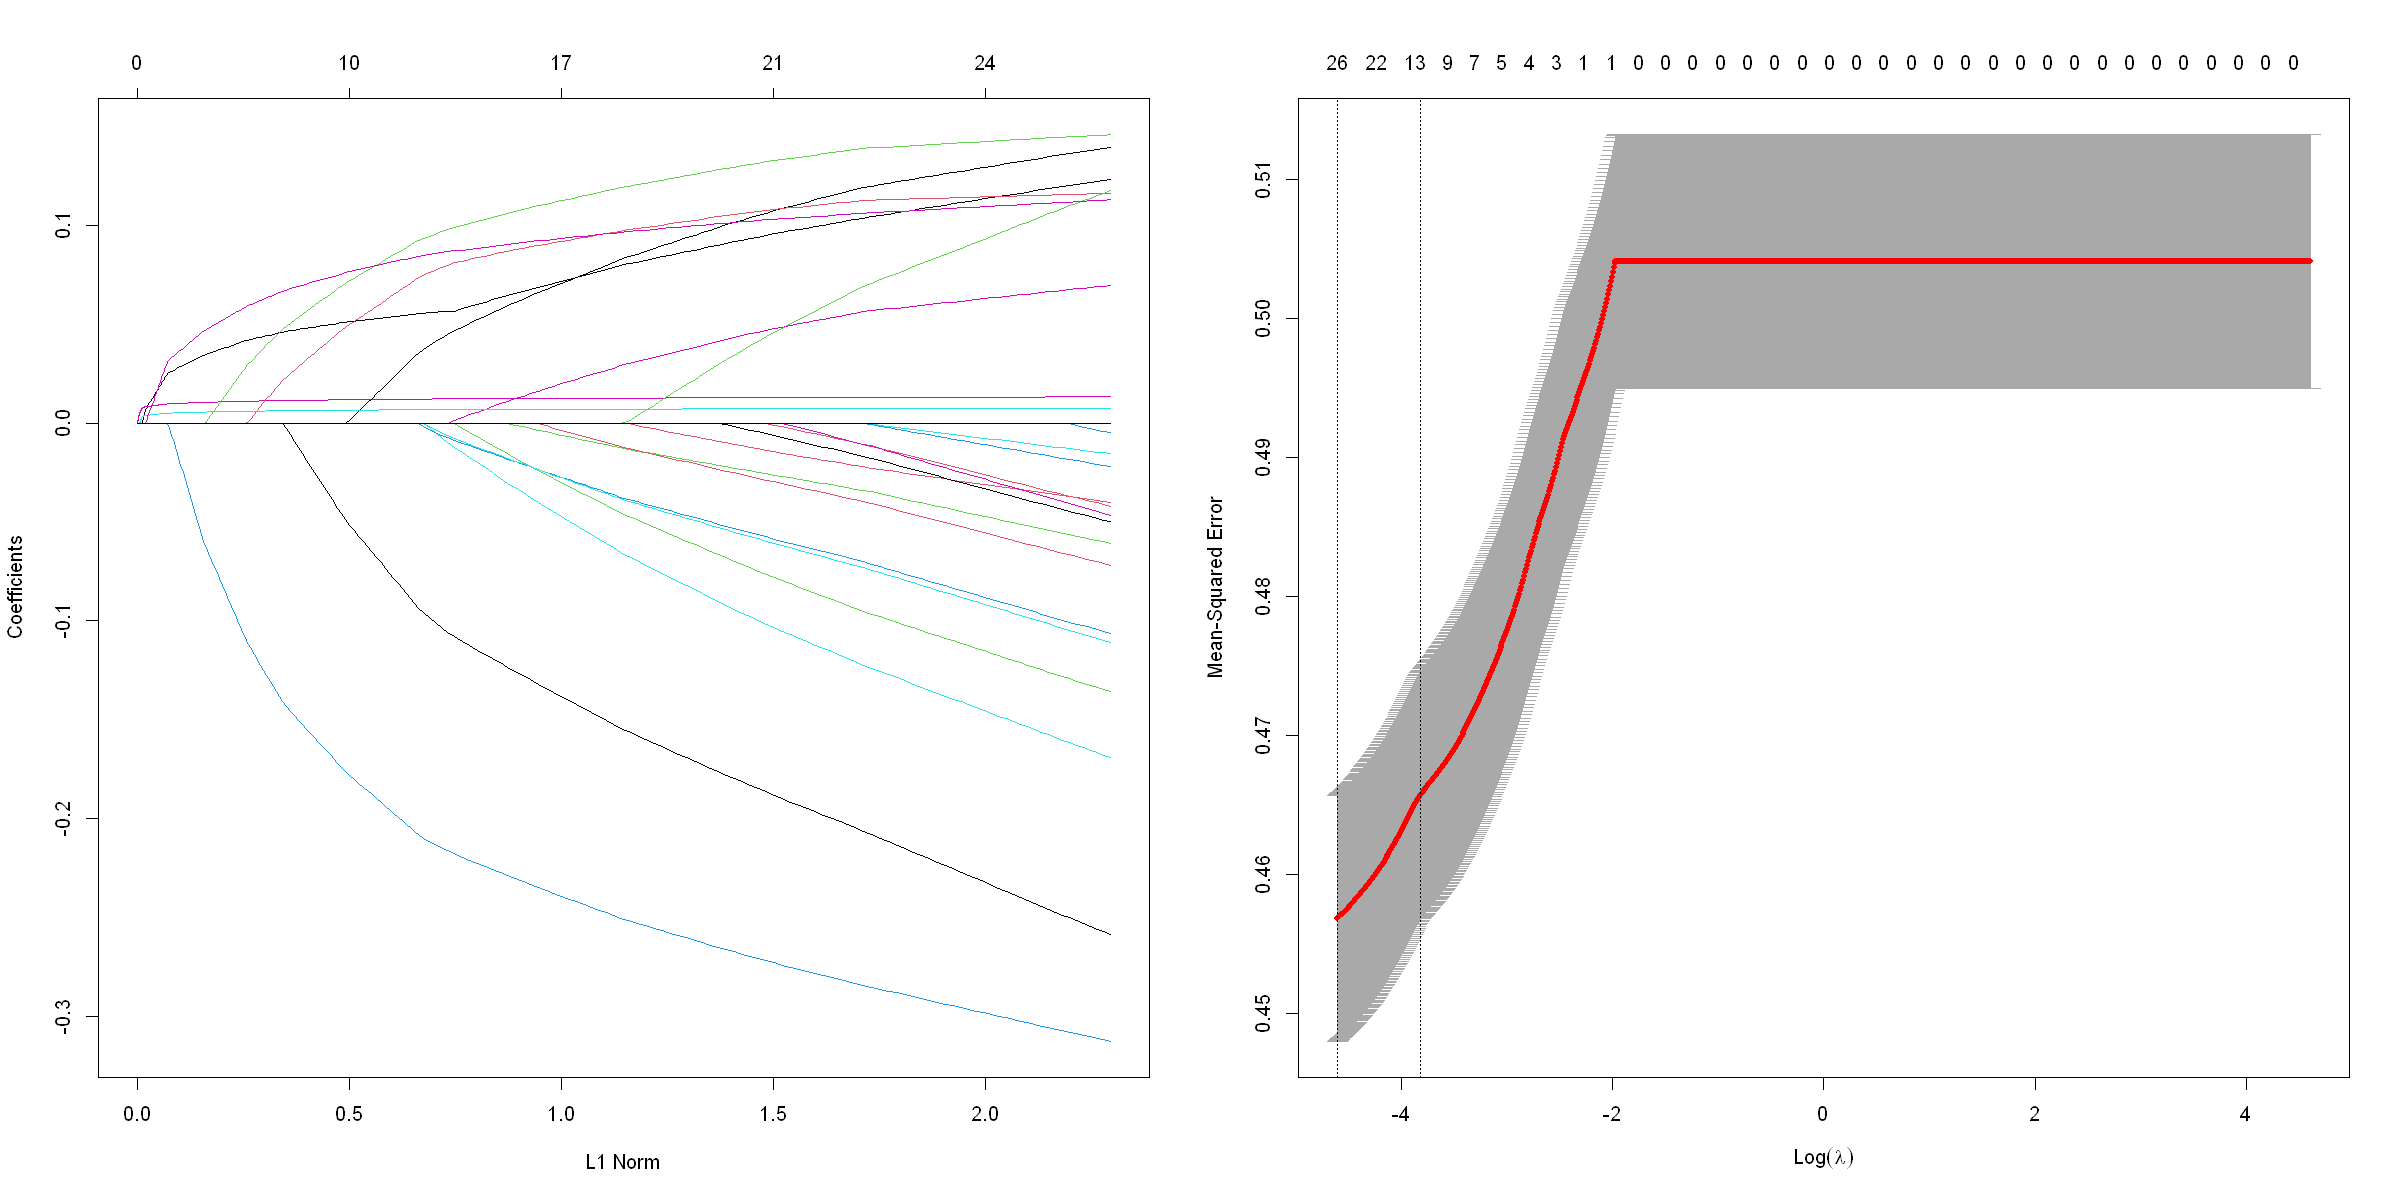

In [232]:
# Spécification de la taille du graphique
options(repr.plot.width=20, repr.plot.height=10)

par(mfrow=c(1,2)) 
plot(Lasso.mod, cex = 15) #chemin régularisation
plot(cv.out, cex = 15) #Evolution lambda en fonction MSE

In [233]:
best_lambda <- cv.out$lambda.min

In [234]:
best_lambda

[1] 0.01

In [235]:
predictions_lasso <- predict(cv.out, s = best_lambda, newx = X_test)
R2 <- 1 - sum((Y_test - predictions_lasso)^2) / sum((Y_test - mean(Y_test))^2)

In [236]:
R2

[1] 0.09788273

In [237]:
coef(Lasso.mod,s=cv.out$lambda.min)

67 x 1 sparse Matrix of class "dgCMatrix"
                                                                                 s1
(Intercept)                                                           -2.384313e+02
Year                                                                   1.235278e-01
genrefemale                                                           -4.017852e-02
genrenot precised                                                     -1.359161e-01
genregender non-conforming                                             .           
genretransgender                                                       .           
genrenon-binary                                                       -4.835330e-03
genreor, in your own words:                                           -1.691312e-01
experiences_en_programmation                                           1.343825e-02
type_developpeurbi / dw expert                                         .           
type_developpeurdata scientist / m

In [238]:
val_coef=as.vector(coef(Lasso.mod,s=cv.out$lambda.min))[-1]
print(colnames(x)[val_coef!=0])

 [1] "Year"                                                         
 [2] "genrefemale"                                                  
 [3] "genrenot precised"                                            
 [4] "genrenon-binary"                                              
 [5] "genreor, in your own words:"                                  
 [6] "experiences_en_programmation"                                 
 [7] "type_developpeurdatabase administrator"                       
 [8] "type_developpeurgraphic designer / graphics"                  
 [9] "type_developpeurdeveloper, desktop or enterprise applications"
[10] "type_developpeurfront-end developer"                          
[11] "type_developpeurfull-stack developer"                         
[12] "type_developpeurquality assurance"                            
[13] "type_developpeurstudent"                                      
[14] "type_developpeursystem administrator"                         
[15] "type_developpeurengineering 

La deuxième méthode fait une sélection, plus stricte, de variables comparée à la première.

In [239]:
model_lasso_avec_lambda_optimal = glmnet(x,y,alpha=1,lambda = cv.out$lambda.min)

In [240]:
lasso_coefs <- coef(model_lasso_avec_lambda_optimal)
print(lasso_coefs)

67 x 1 sparse Matrix of class "dgCMatrix"
                                                                                 s0
(Intercept)                                                           -2.384379e+02
Year                                                                   1.235310e-01
genrefemale                                                           -4.018094e-02
genrenot precised                                                     -1.359287e-01
genregender non-conforming                                             .           
genretransgender                                                       .           
genrenon-binary                                                       -4.837676e-03
genreor, in your own words:                                           -1.691293e-01
experiences_en_programmation                                           1.343830e-02
type_developpeurbi / dw expert                                         .           
type_developpeurdata scientist / m

In [241]:
val_coef=as.vector(coef(model_lasso_avec_lambda_optimal))[-1]

In [242]:
variables_significative = data.frame(
                                    variable = colnames(x)[val_coef!=0],
                                    coef = val_coef[val_coef!=0])

In [243]:
print(variables_significative)

                                                        variable          coef
1                                                           Year  1.235310e-01
2                                                    genrefemale -4.018094e-02
3                                              genrenot precised -1.359287e-01
4                                                genrenon-binary -4.837676e-03
5                                    genreor, in your own words: -1.691293e-01
6                                   experiences_en_programmation  1.343830e-02
7                         type_developpeurdatabase administrator -4.990178e-02
8                    type_developpeurgraphic designer / graphics -4.196668e-02
9  type_developpeurdeveloper, desktop or enterprise applications -6.070886e-02
10                           type_developpeurfront-end developer -2.180393e-02
11                          type_developpeurfull-stack developer -1.534783e-02
12                             type_developpeurquali

In [244]:
model_lasso_avec_lambda_optimal


Call:  glmnet(x = x, y = y, alpha = 1, lambda = cv.out$lambda.min) 

  Df %Dev Lambda
1 25  9.6   0.01

# Traitement sur les compétences

In [245]:
clean_competences <- function(texte) {
  texte_clean <- gsub("\\s+", " ", texte)
  
  texte_clean <- gsub("^[\\s]+|[\\s]+$", "", texte_clean)
  
  #texte_clean = gsub("etc\\.","",texte_clean)
  texte_clean <- gsub("\\(", ";", texte)
  texte_clean <- gsub("\\)", ";", texte_clean)
  texte_clean <- gsub(",", ";", texte_clean)
  texte_clean <- gsub("/", ";", texte_clean)
  texte_clean = tolower(texte_clean)
  texte_clean <- trimws(texte_clean)
  texte_clean = gsub("etc\\.","",texte_clean)
  texte_clean <- gsub(";{2,}", ";", texte_clean)
  texte_clean <- gsub("\\s*;\\s*", ";", texte_clean)
  texte_clean <- gsub(";{2,}", ";", texte_clean)
  texte_clean <- gsub("\\;na", "", texte_clean)
  texte_clean <- gsub("\\;5\\+", "", texte_clean)
  texte_clean <- gsub("1.0 \\- 4.8", "", texte_clean)
  texte_clean <- gsub(";{2,}", ";", texte_clean)
    
  #texte_clean = clean_column(texte_clean)
  return(texte_clean)
}

In [246]:
combined_data$cleaned_competences <- sapply(combined_data$competences, clean_competences)

In [247]:
glimpse(combined_data)

Rows: 198,638
Columns: 16
$ Year                         <dbl> 2015, 2015, 2015, 2015, 2015, 2015, 2015,…
$ pays                         <chr> "United States", "United States", "United…
$ genre                        <chr> "male", "male", "male", "male", "male", "…
$ experiences_en_programmation <dbl> 11.0, 11.0, 11.0, 8.0, 11.0, 11.0, 11.0, …
$ type_developpeur             <chr> "back-end developer", "back-end developer…
$ salaire                      <dbl> NA, 90000, 90000, 90000, 110000, 130000, …
$ statut_d_emploi              <chr> "employed, full-time", "independent contr…
$ satisfaction_travail         <chr> "Slightly dissatisfied", "Slightly satisf…
$ age                          <dbl> 37.5, 45.5, 37.5, 32.5, 45.5, 37.5, 32.5,…
$ niveau_d_etudes              <chr> "Some College", "Some College", "Other", …
$ taille_entreprise            <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N…
$ competences                  <chr> "Mac OS X;C#;JavaScript;SQL Server;Git;SV…
$ tech_next   

In [248]:
combined_data_long <- combined_data %>%
  separate_rows(cleaned_competences, sep = ";") %>%
  filter(!is.na(cleaned_competences) & cleaned_competences != "") %>%
  group_by(Year, cleaned_competences) %>%
  summarise(count = n(), .groups = 'drop')

In [249]:
top_10_competences_per_year <- combined_data_long %>%
  group_by(Year) %>%
  top_n(10, count) %>%
  ungroup()

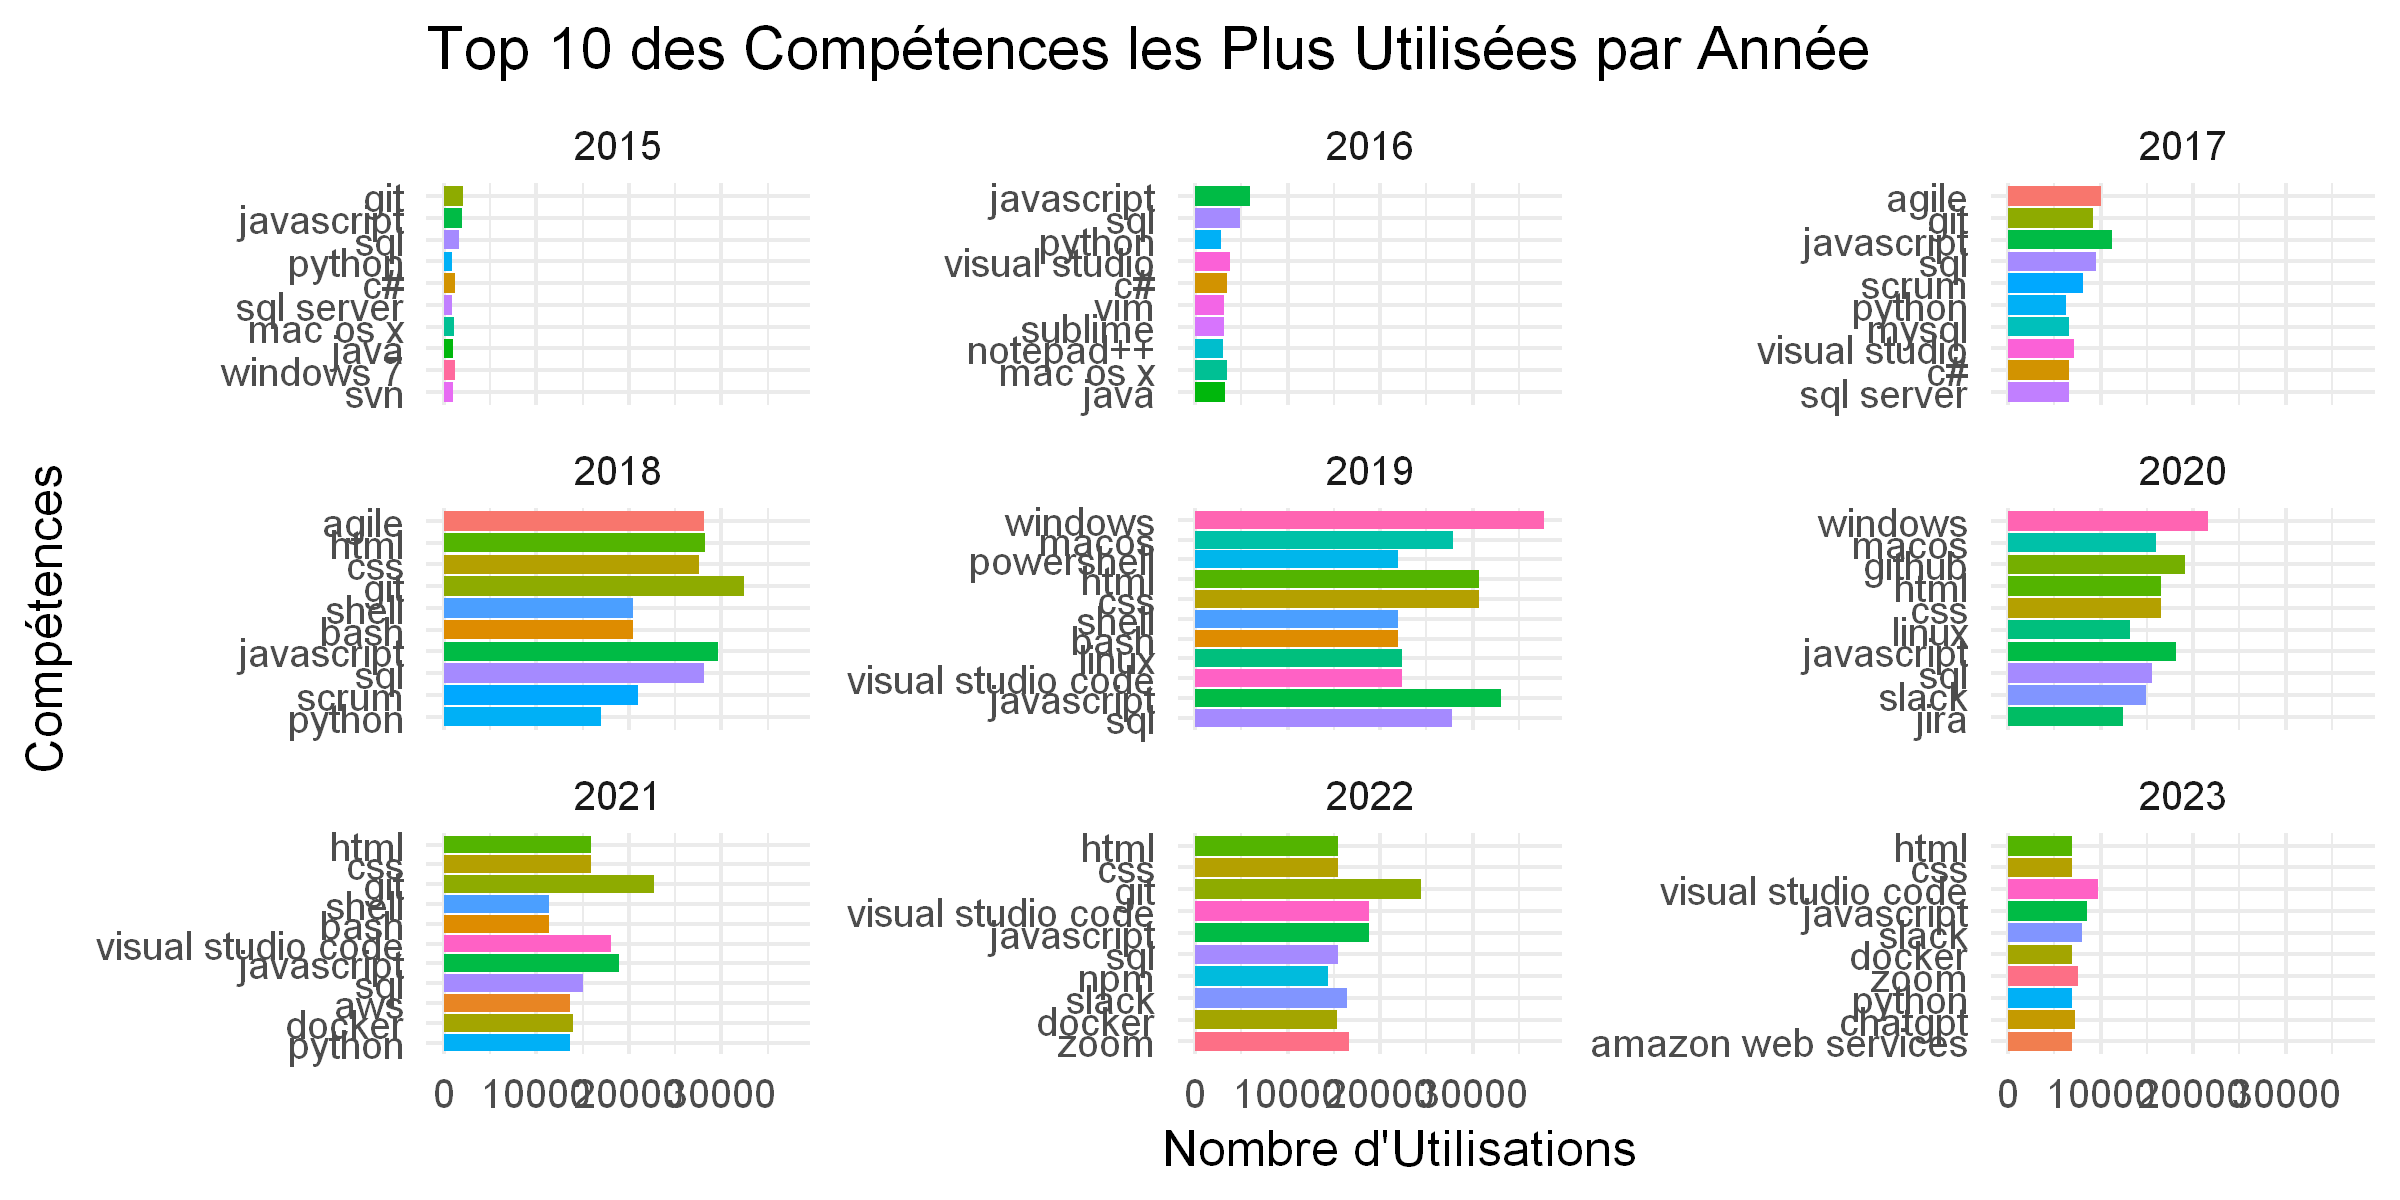

In [250]:
ggplot(top_10_competences_per_year, aes(x = reorder(cleaned_competences, count), y = count, fill = cleaned_competences)) +
  geom_bar(stat = "identity") +
  facet_wrap(~ Year, scales = "free_y") +
  coord_flip() +
  labs(title = "Top 10 des Compétences les Plus Utilisées par Année",
       x = "Compétences",
       y = "Nombre d'Utilisations") +
  theme_minimal(base_size = 30) +
  theme(legend.position = "none")

In [251]:
combined_data$cleaned_competences <- gsub("amazon web services", "aws", combined_data$cleaned_competences, ignore.case = TRUE)

In [252]:
combined_data_long <- combined_data %>%
  separate_rows(cleaned_competences, sep = ";") %>%
  filter(!is.na(cleaned_competences) & cleaned_competences != "") %>%
  group_by(Year, cleaned_competences) %>%
  summarise(count = n(), .groups = 'drop')

In [253]:
top_10_competences_per_year <- combined_data_long %>%
  group_by(Year) %>%
  top_n(10, count) %>%
  ungroup()

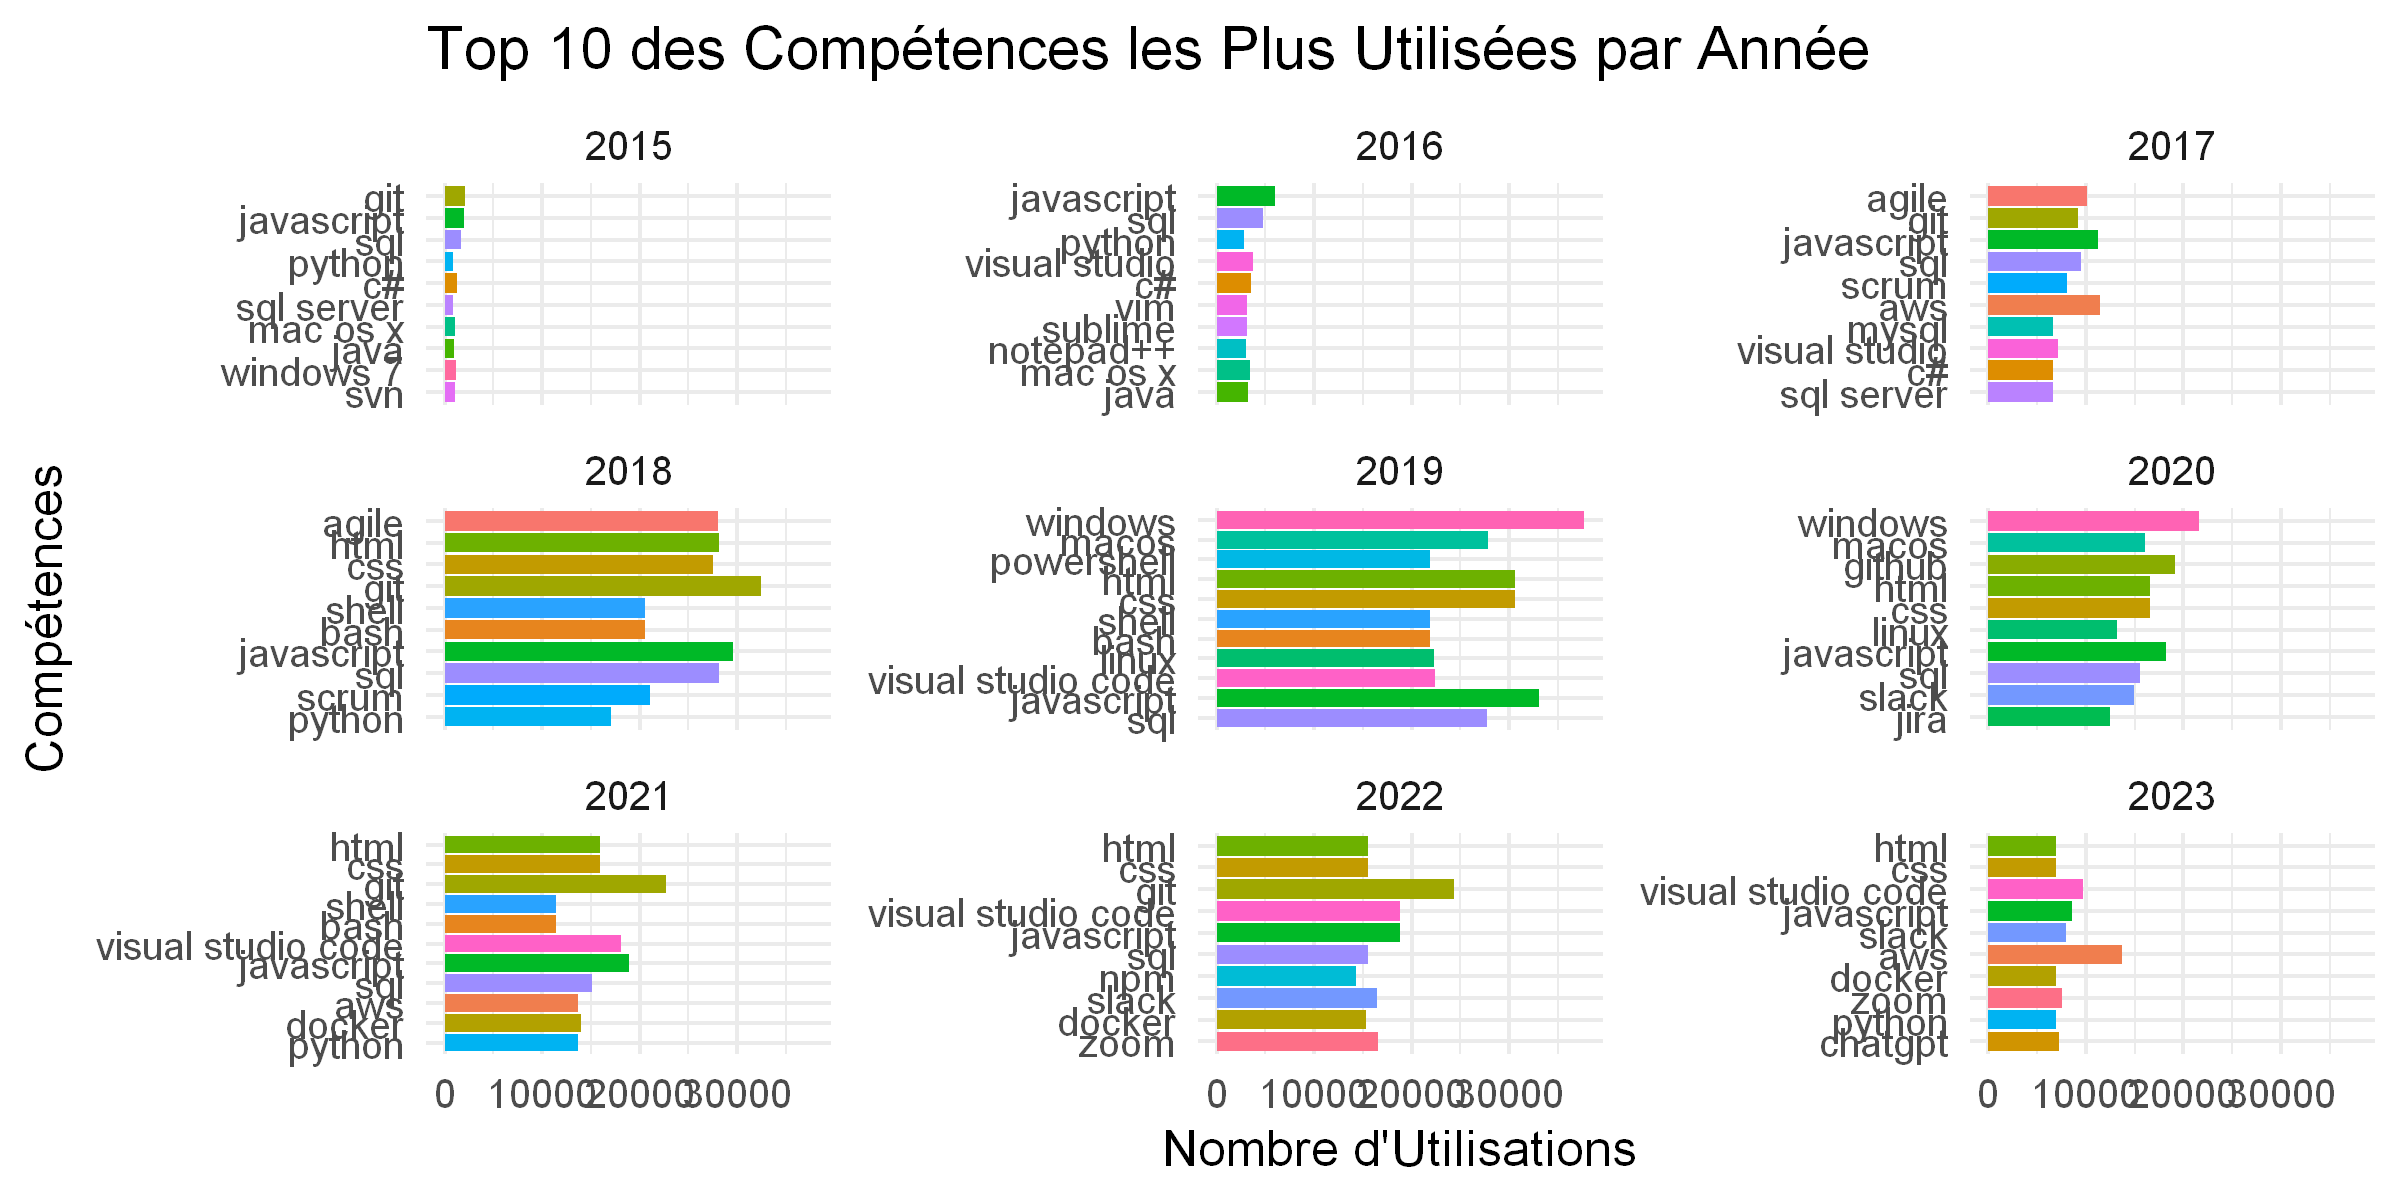

In [254]:
ggplot(top_10_competences_per_year, aes(x = reorder(cleaned_competences, count), y = count, fill = cleaned_competences)) +
  geom_bar(stat = "identity") +
  facet_wrap(~ Year, scales = "free_y") +
  coord_flip() +
  labs(title = "Top 10 des Compétences les Plus Utilisées par Année",
       x = "Compétences",
       y = "Nombre d'Utilisations") +
  theme_minimal(base_size = 30) +
  theme(legend.position = "none")

# Emergence de compétences

In [255]:
glimpse(combined_data)

Rows: 198,638
Columns: 16
$ Year                         <dbl> 2015, 2015, 2015, 2015, 2015, 2015, 2015,…
$ pays                         <chr> "United States", "United States", "United…
$ genre                        <chr> "male", "male", "male", "male", "male", "…
$ experiences_en_programmation <dbl> 11.0, 11.0, 11.0, 8.0, 11.0, 11.0, 11.0, …
$ type_developpeur             <chr> "back-end developer", "back-end developer…
$ salaire                      <dbl> NA, 90000, 90000, 90000, 110000, 130000, …
$ statut_d_emploi              <chr> "employed, full-time", "independent contr…
$ satisfaction_travail         <chr> "Slightly dissatisfied", "Slightly satisf…
$ age                          <dbl> 37.5, 45.5, 37.5, 32.5, 45.5, 37.5, 32.5,…
$ niveau_d_etudes              <chr> "Some College", "Some College", "Other", …
$ taille_entreprise            <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N…
$ competences                  <chr> "Mac OS X;C#;JavaScript;SQL Server;Git;SV…
$ tech_next   

In [256]:
combined_data_copy <- combined_data

In [257]:
combined_data_long <- combined_data_copy %>%
  separate_rows(cleaned_competences, sep = ";") %>%
  filter(!is.na(cleaned_competences) & cleaned_competences != "")

### Un peu plus de traitement

In [258]:
clean_skill <- function(skill) {
  skill %>%
    tolower() %>%  # Convertir en minuscules
    gsub("[^a-z0-9#\\+\\s]", " ", .) %>%  # Remplacer les caractères spéciaux sauf # et +
    gsub("\\s+", " ", .) %>%  # Remplacer les espaces multiples par un seul espace
    str_trim() %>%  # Supprimer les espaces de début et de fin
    gsub("(^\\d+|\\d+$)", "", .) %>%  # Supprimer les numéros en début ou fin de chaîne
    gsub("\\s\\d+\\s", " ", .) %>%  # Supprimer les numéros au milieu de la chaîne
    str_squish()  # Supprimer les espaces supplémentaires
}

In [259]:
normalize_skill <- function(skill) {
  # Nettoyer les compétences avant de les normaliser
  skill <- clean_skill(skill)
  
  # Regroupement des compétences similaires
  skill <- gsub("apache hbashe|apache hive|apache kafka|apache spark", "apache", skill)
  skill <- gsub("ansible|ansibleno", "ansible", skill)
  skill <- gsub("android|android studio|android studiono", "android", skill)
  skill <- gsub("angular|angular\\.js|angulardart|angularjs", "angular", skill)
  skill <- gsub("asp\\.net|asp\\.net core|asp\\.net mvc", "asp.net", skill)
  skill <- gsub("c#|c\\+\\+", "c#", skill)
  skill <- gsub("c\\+\\+ builder|c\\+\\+11|c\\+\\+14", "c++", skill)
  skill <- gsub("\\.net|\\.net 5|\\.net core|\\.net framework|\\.net maui|\\.netno", ".net", skill)
  skill <- gsub("actionscript|actionscript 3|actionscript 3\\.0", "actionscript", skill)
  skill <- gsub("amazon dynamodb|amazon echo|amazon rds|amazon redshift", "amazon", skill)
  skill <- gsub("aws|aws codewhisperer|awsno", "aws", skill)
  skill <- gsub("bash|bash script|bashs|bourne shell|bourne shell script", "bash", skill)
  skill <- gsub("git|git but i m not professional|git copilot|git discussions", "git", skill)
  skill <- gsub("ibm|ibm clearcase|ibm db", "ibm", skill)
  skill <- gsub("linux|linux bashed|linux desktop|linux gentoo|linux shell scripting", "linux", skill)
  skill <- gsub("mac os|mac os at work|macos", "mac os", skill)
  skill <- gsub("node\\.js|node\\.jsno", "node.js", skill)
  skill <- gsub("windows 10|windows 10 or windows 7|windows 10 preview|windows 10 tech preview|windows 10 technical", "windows 10", skill)
  skill <- gsub("windows 7|windows 7 & mac os x for work|windows 7 and 8|windows 7 at home", "windows 7", skill)
  skill <- gsub("windows 8|windows 8 at home|windows 8.1", "windows 8", skill)
  skill <- gsub("swiftui|swiftuino", "swiftui", skill)
  skill <- gsub("tableau|tabulano", "tableau", skill)
  skill <- gsub("unix|unixno", "unix", skill)
  skill <- gsub("terraform|terraformno", "terraform", skill)
  skill <- gsub("jenkins|jenkinsno", "jenkins", skill)
  skill <- gsub("kubernetes|kubernetesno", "kubernetes", skill)
  skill <- gsub("docker|dockerno", "docker", skill)
  skill <- gsub("react native|react", "react native", skill)
  skill <- gsub("vue\\.js|vuejs", "vue", skill)
  skill <- gsub("google cloud|google cloud platform|google cloud storage|google cloudno", "google cloud", skill)
  skill <- gsub("ruby|ruby on rails|rubymine", "ruby on rails", skill)
  skill <- gsub("mysql|mariadb", "mysql", skill)
  skill <- gsub("pandas|pandasno", "pandas", skill)
  skill <- gsub("php|phpstorm", "php", skill)
  skill <- gsub("typescript|ts|tsx", "typescript", skill)
  skill <- gsub("flutter|dart", "flutter", skill)
  skill <- gsub("jupyter|jupyter notebook|jupyterlab|jupyterno", "jupyter", skill)
  skill <- gsub("microsoft access|microsoft azure|microsoft azureno|microsoft lists|microsoft planner|microsoft sql|microsoft teams|microsoft visual sourcesafe", "microsoft", skill)
  skill <- gsub("visual studio|visual studio code|visual studio online|visual studio solution|visual studio solutionno", "visual studio", skill)
  
  # Traitement spécifique pour Golang
  skill <- gsub("golangd help me|golangdot|golangland|golanglandno|golangogle bard ai|golangogle bigquery|golangogle chat|golangogle cloud|golangogle cloud platform|golangogle cloud storage|golangogle cloudno|golangogle drive|golangogle home|golangogle meet|golangogle suite|golangogle test|golangsu", "golang", skill)
  
  # Gestion des compétences non pertinentes
  non_pertinent <- c(
    "a bit disappointed redhat is not there", "switching teams puts me back on windows 7", "none of the above",
    "no html5???", "none extensively", "no", "na", "for legacy stuff", "depends on the project heavily",
    "define extensive", "but complain about it profusely the entire time.", "but not for work.", "eg everything :d",
    "mac at work", "other", "please specify", "similar to mongodb", "unfortunately i work offline. it's easier to do my own 'source control' locally and manually.",
    "none extensively", "switching teams puts me back on windows 7", "i don't know what it is", "i don't use one",
    "i don't use source control", "i don't use version control", "my primary is mac but viva la virtual machines!",
    "none", "yes", "no", "not applicable", "prefer not to specify",
    "please make the tfs stop", "throughout the day my primary is mac but viva la virtual machines"

  )
  skill <- ifelse(skill %in% non_pertinent, NA, skill)
  
  # Retourner le résultat normalisé
  return(skill)
}


In [260]:
combined_data_long = combined_data_long %>% mutate(cleaned_competences = normalize_skill(cleaned_competences))

In [261]:
normalize_skill <- function(skill) {
  # Nettoyer les compétences avant de les normaliser
  skill <- clean_skill(skill)
  
  # Créer un vecteur des termes non pertinents
  non_pertinent <- c(
    "aka waterfall methodologies", "and", "andi", "anything that can bridge to git",
    "but complain about it profusely the entire time", "but i hate it", "but not for work", "bzr"
  )

  # Normalisation des compétences selon les instructions fournies
  skill <- gsub("and groovy", "groovy", skill)
  skill <- gsub("and kiln", "kiln", skill)
  skill <- gsub("and latest ubuntu", "ubuntu", skill)
  skill <- gsub("and linux", "linux", skill)
  skill <- gsub("apache hbase", "apache", skill)
  skill <- gsub("angular js", "angular", skill)
  skill <- gsub("apple watch or apple tv", "apple", skill)
  skill <- gsub("applescript", "apple", skill)
  skill <- gsub("arch linux", "archlinux", skill)
  skill <- gsub("backbone js", "backbone", skill)
  skill <- gsub("backbonejs", "backbone", skill)
  skill <- gsub("asp net core", "asp net", skill)
  skill <- gsub("asp net mvc", "asp net", skill)
  skill <- gsub("atomno", "atom", skill)
  skill <- gsub("bashs", "bash", skill)
  skill <- gsub("bbeditno", "bbedit", skill)
  skill <- gsub("build toolno", "build", skill)
  skill <- gsub("build tool", "build", skill)
  skill <- gsub("built in", "build", skill)
  skill <- gsub("c# builder", "c#", skill)
  skill <- gsub("ca scm harvest", "ca scm", skill)
  skill <- gsub("cargono", "cargo", skill)
  
  # Gestion des compétences non pertinentes
  skill <- ifelse(skill %in% non_pertinent, NA, skill)
  
  return(skill)
}

In [262]:
combined_data_long = combined_data_long %>% mutate(cleaned_competences = normalize_skill(cleaned_competences))

In [263]:
normalize_skill <- function(skill) {
  # Nettoyer les compétences avant de les normaliser
  skill <- clean_skill(skill)
  
  # Créer un vecteur des termes non pertinents
  non_pertinent <- c(
    "aka waterfall methodologies", "and", "andi", "anything that can bridge to git",
    "but complain about it profusely the entire time", "but i hate it", "but not for work", "bzr",
    "copying and pasting files to network shares", "development on windows server to",
    "d", "eg everything d"
  )
  
  # Normalisation des compétences selon les instructions fournies
  skill <- gsub("clionno", "clion", skill)
  skill <- gsub("clojurescript", "clojure", skill)
  skill <- gsub("cloud firestore", "cloud", skill)
  skill <- gsub("cloudflare", "cloud", skill)
  skill <- gsub("code blocksno", "code blocks", skill)
  skill <- gsub("cold fusion", "coldfusion", skill)
  skill <- gsub("code blocks", "code blocks", skill)
  skill <- gsub("cosmos db", "cosmosdb", skill)
  skill <- gsub("couch db", "couchdb", skill)
  skill <- gsub("couchbase server", "couchbase", skill)
  skill <- gsub("cryengine", "cryengine", skill)  # Pas de modification spécifique
  skill <- gsub("crystal reportypescript", "crystal", skill)
  skill <- gsub("css", "css", skill)  # Pas de modification spécifique
  skill <- gsub("codeigniter", "codeigniter", skill)  # Pas de modification spécifique
  skill <- gsub("codeium", "codeium", skill)  # Pas de modification spécifique
  skill <- gsub("coldfusion", "coldfusion", skill)  # Déjà géré
  skill <- gsub("condono", "condo", skill)
  skill <- gsub("cosmosdb", "cosmosdb", skill)  # Déjà géré
  skill <- gsub("couchbase", "couchbase", skill)  # Déjà géré
  skill <- gsub("cppunit", "cppunit", skill)  # Pas de modification spécifique
  skill <- gsub("crystal", "crystal", skill)  # Déjà géré
  skill <- gsub("datagripno", "datagrip", skill)
  skill <- gsub("debian on servers", "debian", skill)
  skill <- gsub("debian vm running on win7 host", "debian", skill)
  skill <- gsub("digitalocean", "digitalocean", skill)  # Déjà géré
  skill <- gsub("dynamsoft sourceanywhere", "dynamosoft", skill)
  skill <- gsub("elasticsearcg", "elasticsearch", skill)
  
  # Gestion des compétences non pertinentes
  skill <- ifelse(skill %in% non_pertinent, NA, skill)
  
  return(skill)
}

In [264]:
combined_data_long = combined_data_long %>% mutate(cleaned_competences = normalize_skill(cleaned_competences))

In [265]:
normalize_skill <- function(skill) {
  # Nettoyer les compétences avant de les normaliser
  skill <- clean_skill(skill)
  
  # Créer un vecteur des termes non pertinents
  non_pertinent <- c(
    "etc", "evidence based software engineering", "evidence based swe", 
    "formal standard such as iso or ieee", "god help me", 
    "have used fossil", "honestly all of these mac", 
    "how could you forget groovy", "h"
  )
  
  # Normalisation des compétences selon les instructions fournies
  skill <- gsub("emacsno", "emacs", skill)
  skill <- gsub("ember js", "ember", skill)
  skill <- gsub("emberw", "ember", skill)
  skill <- gsub("equally ubuntu osx", "ubuntu", skill)
  skill <- gsub("expression engine", "expressionengine", skill)
  skill <- gsub("extendscript", "extjs", skill)
  skill <- gsub("extjs", "extjs", skill)  # Déjà géré
  skill <- gsub("extreme programming", "extreme", skill)
  skill <- gsub("facebook workplace", "facebook", skill)
  skill <- gsub("firebase realtime database", "firebase", skill)
  skill <- gsub("fleetno", "fleet", skill)
  skill <- gsub("expressionengine", "expressionengine", skill)  # Déjà géré
  skill <- gsub("fossil", "fossil", skill)  # Pas de modification spécifique
  skill <- gsub("gentoo linux", "linux", skill)
  skill <- gsub("github copilot", "git", skill)
  skill <- gsub("github discussions", "git", skill)
  skill <- gsub("gnu gccno", "gnu gcc", skill)
  skill <- gsub("golandno", "goland", skill)
  skill <- gsub("google bard ai", "google", skill)
  skill <- gsub("google bigquery", "google", skill)
  skill <- gsub("google chat", "google", skill)
  skill <- gsub("google cloud", "google", skill)
  skill <- gsub("google drive", "google", skill)
  skill <- gsub("google home", "google", skill)
  skill <- gsub("google meet", "google", skill)
  skill <- gsub("google suite", "google", skill)
  skill <- gsub("google test", "google", skill)
  skill <- gsub("gtkno", "gtk", skill)
  skill <- gsub("have used fossil", "non_pertinent", skill)  # Déjà géré
  skill <- gsub("honestly all of these mac", "non_pertinent", skill)  # Déjà géré
  skill <- gsub("how could you forget groovy", "non_pertinent", skill)  # Déjà géré
  
  # Gestion des compétences non pertinentes
  skill <- ifelse(skill %in% non_pertinent, NA, skill)
  
  return(skill)
}


In [266]:
combined_data_long = combined_data_long %>% mutate(cleaned_competences = normalize_skill(cleaned_competences))

In [267]:
normalize_skill <- function(skill) {
  # Nettoyer les compétences avant de les normaliser
  skill <- clean_skill(skill)
  
  # Créer un vecteur des termes non pertinents
  non_pertinent <- c(
    "etc", "evidence based software engineering", "evidence based swe", 
    "formal standard such as iso or ieee", "god help me", 
    "have used fossil", "honestly all of these mac", 
    "how could you forget groovy", "h",
    "hugging face transformers", "i begrudgingly use tfs if a client uses it",
    "i don t know what it is", "i don t use one", "i don t use source control",
    "i don t use version control", "i like svn but my work doesn t believe in source control",
    "i use some other system", "in house", "managed hosting", "m", "m68k"
  )
  
  # Normalisation des compétences selon les instructions fournies
  skill <- gsub("html css", "html", skill)
  skill <- gsub("html5 canvas", "html", skill)
  skill <- gsub("i use git in my spare time", "git", skill)
  skill <- gsub("i use windows", "windows", skill)
  skill <- gsub("ibm cloud or watypescripton", "ibm", skill)
  skill <- gsub("intellij idea", "intellij", skill)
  skill <- gsub("intellij ideano", "intellij", skill)
  skill <- gsub("intellijno", "intellij", skill)
  skill <- gsub("ios dev", "ios", skill)
  skill <- gsub("ipythonno", "python", skill)
  skill <- gsub("jade", "jade", skill)  # Pas de modification spécifique
  skill <- gsub("jira work management", "jira", skill)
  skill <- gsub("jqueryno", "jquery", skill)
  skill <- gsub("knockoukt", "knockout", skill)
  skill <- gsub("knockout js", "knockout", skill)
  skill <- gsub("knockoutjs", "knockout", skill)
  skill <- gsub("korn shell", "kornshell", skill)
  skill <- gsub("ksh", "kornshell", skill)  # Ksh est souvent équivalent à KornShell
  skill <- gsub("kubernetes", "kubernetes", skill)  # Pas de modification spécifique
  skill <- gsub("light table", "lighttable", skill)
  skill <- gsub("lighttable", "lighttable", skill)  # Déjà géré
  skill <- gsub("lean", "lean", skill)  # Déjà géré
  skill <- gsub("legacy", "legacy", skill)  # Pas de modification spécifique
  skill <- gsub("less", "less", skill)  # Pas de modification spécifique
  skill <- gsub("liblittletest", "liblittletest", skill)  # Pas de modification spécifique
  skill <- gsub("marmalade", "marmalade", skill)  # Pas de modification spécifique
  skill <- gsub("markdown file", "markdown", skill)
  skill <- gsub("mathematica", "mathematica", skill)  # Pas de modification spécifique
  skill <- gsub("matlab", "matlab", skill)  # Pas de modification spécifique
  skill <- gsub("mattermost", "mattermost", skill)  # Pas de modification spécifique
  skill <- gsub("make", "make", skill)  # Déjà géré
  skill <- gsub("makeno", "make", skill)
  
  # Gestion des compétences non pertinentes
  skill <- ifelse(skill %in% non_pertinent, NA, skill)
  
  return(skill)
}


In [268]:
combined_data_long = combined_data_long %>% mutate(cleaned_competences = normalize_skill(cleaned_competences))

In [269]:
normalize_skill <- function(skill) {
  # Nettoyer les compétences avant de les normaliser
  skill <- clean_skill(skill)
  
  # Création d'une liste de termes non pertinents
  non_pertinent <- c(
    "etc", "evidence based software engineering", "evidence based swe", 
    "formal standard such as iso or ieee", "god help me", 
    "have used fossil", "honestly all of these mac", 
    "how could you forget groovy", "h", "i begrudgingly use tfs if a client uses it",
    "i don t know what it is", "i don t use one", "i don t use source control",
    "i don t use version control", "i like svn but my work doesn t believe in source control",
    "i use some other system", "in house", "managed hosting", "m", "m68k",
    "monday com", "multilingual windows", "multiple copies of the same files",
    "no html", "notion", "now akamai", "objective c", "perplexity ai", "d"
  )
  
  # Normalisation des compétences selon les instructions fournies
  skill <- gsub("memcached", "memcache", skill)
  skill <- gsub("meteor js", "meteor", skill)
  skill <- gsub("meteor sqlite", "meteor", skill)
  skill <- gsub("micronaut", "micro", skill)
  skill <- gsub("microno", "micro", skill)
  skill <- gsub("microsoft listypescripton", "microsoft", skill)
  skill <- gsub("ms source freaking safe", "microsoft", skill)
  skill <- gsub("msbuild", "microsoft", skill)
  skill <- gsub("msvc", "microsoft", skill)
  skill <- gsub("mint on business workstation", "mint", skill)
  skill <- gsub("mintlify", "mint", skill)
  skill <- gsub("mob programming", "mob", skill)
  skill <- gsub("mongodb", "mongodb", skill)
  skill <- gsub("na", NA, skill)
  skill <- gsub("neeva ai", "neeva", skill)
  skill <- gsub("next js", "next js", skill)
  skill <- gsub("net core", "net", skill)
  skill <- gsub("net framework", "net", skill)
  skill <- gsub("net maui", "net", skill)
  skill <- gsub("netbeans", "net", skill)
  skill <- gsub("netduino", "net", skill)
  skill <- gsub("netlify", "net", skill)
  skill <- gsub("netlinx", "net", skill)
  skill <- gsub("netno", "net", skill)
  skill <- gsub("node jsno", "node js", skill)
  skill <- gsub("nugetno", "nuget", skill)
  skill <- gsub("numpyno", "numpy", skill)
  skill <- gsub("nuxt js", "next js", skill)
  skill <- gsub("object pascal", "pascal", skill)
  skill <- gsub("pacmanno", "pacman", skill)
  skill <- gsub("pair programming", "pair", skill)
  skill <- gsub("perplexity ai", NA, skill)
  skill <- gsub("notepad\\+\\+", "notepad++", skill)
  skill <- gsub("next js", "next js", skill)
  skill <- gsub("node jsno", "node js", skill)
  skill <- gsub("nugetno", "nuget", skill)
  skill <- gsub("numpyno", "numpy", skill)
  skill <- gsub("nuxt js", "next js", skill)
  skill <- gsub("objective c", NA, skill)
  skill <- gsub("php", "php", skill)
  skill <- gsub("pig", "pig", skill)
  skill <- gsub("pip", "pip", skill)
  
  # Gestion des compétences non pertinentes
  skill <- ifelse(skill %in% non_pertinent, NA, skill)
  
  return(skill)
}


In [270]:
combined_data_long = combined_data_long %>% mutate(cleaned_competences = normalize_skill(cleaned_competences))

In [271]:
normalize_skill <- function(skill) {
  # Nettoyer les compétences avant de les normaliser
  skill <- clean_skill(skill)
  
  # Création d'une liste de termes non pertinents
  non_pertinent <- c(
    "planview projectplace or clarizen", "proprietary assembly", 
    "razor about to be accurev", "roughly equal measure", 
    "seapine s surround"
  )
  
  # Normalisation des compétences selon les instructions fournies
  skill <- gsub("pipno", "pip", skill)
  skill <- gsub("pl", "pl", skill)
  skill <- gsub("play framework", NA, skill)
  skill <- gsub("postypescriptcript", "postgresql", skill)
  skill <- gsub("pnpmno", "pnpm", skill)
  skill <- gsub("podmanno", "podman", skill)
  skill <- gsub("puppetno", "puppet", skill)
  skill <- gsub("pulumino", "pulumi", skill)
  skill <- gsub("pythonno", "python", skill)
  skill <- gsub("qmakeno", "qmake", skill)
  skill <- gsub("qtno", "qt", skill)
  skill <- gsub("react native js", "react native", skill)
  skill <- gsub("react nativejs", "react native", skill)
  skill <- gsub("redhat", "red hat", skill)
  skill <- gsub("redocly", "redocly", skill)
  skill <- gsub("sass", "sas", skill)
  skill <- gsub("scikit learnno", "scikit learn", skill)
  skill <- gsub("rpgle", "rpg", skill)
  skill <- gsub("ruby on railsno", "ruby", skill)
  skill <- gsub("scala", "scala", skill)
  skill <- gsub("scaleway", "scaleway", skill)
  skill <- gsub("scheme", "scheme", skill)
  skill <- gsub("sed", "sed", skill)
  
  # Gestion des compétences non pertinentes
  skill <- ifelse(skill %in% non_pertinent, NA, skill)
  
  return(skill)
}

In [272]:
combined_data_long = combined_data_long %>% mutate(cleaned_competences = normalize_skill(cleaned_competences))

In [273]:
normalize_skill <- function(skill) {
  # Nettoyer les compétences avant de les normaliser
  skill <- clean_skill(skill)
  
  # Création d'une liste de termes non pertinents
  non_pertinent <- c(
    "planview projectplace or clarizen", "proprietary assembly", 
    "razor about to be accurev", "roughly equal measure", 
    "seapine s surround", "switching teams putypescript me back on windows windows at home", 
    "unfortunately i work offline it s easier to do my own source control locally and manually"
  )
  

  # Traitement des nouveaux cas
  skill <- gsub("selenium", "selenium", skill)
  skill <- gsub("sencha", "sencha", skill)
  skill <- gsub("server", "server", skill)
  skill <- gsub("serverless", "server", skill)
  skill <- gsub("servicestack", "servicestack", skill)
  skill <- gsub("sh", "sh", skill)
  skill <- gsub("sharepoint", "sharepoint", skill)
  skill <- gsub("shell", "shell", skill)
  skill <- gsub("shellscript", "shell", skill)
  skill <- gsub("shortcut", "shortcut", skill)
  skill <- gsub("signal", "signal", skill)
  skill <- gsub("silverlight", "silverlight", skill)
  skill <- gsub("sitecore", "sitecore", skill)
  skill <- gsub("skype", "skype", skill)
  skill <- gsub("slack", "slack", skill)
  skill <- gsub("slack apps and integrations", "slack", skill)
  skill <- gsub("slackware", "slack", skill)
  skill <- gsub("smalltalk", "smalltalk", skill)
  skill <- gsub("smartgit", "smartgit", skill)
  skill <- gsub("smarttv", "smarttv", skill)
  skill <- gsub("smartypescriptheet", "smartypescriptheet", skill)
  skill <- gsub("sml", "sml", skill)
  skill <- gsub("snitch", "snitch", skill)
  skill <- gsub("snowflake", "snowflake", skill)
  skill <- gsub("soap", "soap", skill)
  skill <- gsub("socketio", "socketio", skill)
  skill <- gsub("solaris", "solaris", skill)
  skill <- gsub("solid js", "solid js", skill)
  skill <- gsub("solidity", "solidity", skill)
  skill <- gsub("solr", "solr", skill)
  skill <- gsub("source safe", "sourcesafe", skill)
  skill <- gsub("sourcegear vault", "sourcegear vault", skill)
  skill <- gsub("sourcegear vault \\+ pvcs", "sourcegear vault", skill)
  skill <- gsub("sourcesafe", "sourcesafe", skill)
  skill <- gsub("soy", "soy", skill)
  skill <- gsub("spark", "spark", skill)
  skill <- gsub("sparql", "sparql", skill)
  skill <- gsub("spring", "spring", skill)
  skill <- gsub("spring boot", "spring", skill)
  skill <- gsub("spring framework", "spring", skill)
  skill <- gsub("spring mvc", "spring", skill)
  skill <- gsub("spyder", "spyder", skill)
  skill <- gsub("sql", "sql", skill)
  skill <- gsub("sql server", "sql", skill)
  skill <- gsub("sqlfire", "sqlfire", skill)
  skill <- gsub("sqlite", "sqlite", skill)
  skill <- gsub("sqlno", "sql", skill)
  skill <- gsub("ssis", "ssis", skill)
  skill <- gsub("ssrs", "ssrs", skill)
  skill <- gsub("stack overflow for teams", NA, skill)
  skill <- gsub("starteam", "starteam", skill)
  skill <- gsub("stata", "stata", skill)
  skill <- gsub("storm", "storm", skill)
  skill <- gsub("streambase", "streambase", skill)
  skill <- gsub("sublime", "sublime text", skill)
  skill <- gsub("sublime text", "sublime text", skill)
  skill <- gsub("subversion", "subversion", skill)
  skill <- gsub("supabase", "supabase", skill)
  skill <- gsub("surround", "surround", skill)
  skill <- gsub("suse", "suse", skill)
  skill <- gsub("svelte", "svelte", skill)
  skill <- gsub("svn", "svn", skill)
  skill <- gsub("swift", "swift", skill)
  skill <- gsub("swiftui", "swift", skill)
  skill <- gsub("swit", "swift", skill)
  skill <- gsub("symfony", "symfony", skill)
  skill <- gsub("symphony", "symfony", skill)
  skill <- gsub("synk code", "synk code", skill)
  skill <- gsub("systemverilog", "systemverilog", skill)
  skill <- gsub("t sql", "sql", skill)
  skill <- gsub("tables", "tables", skill)
  skill <- gsub("tabnine", "tabnine", skill)
  skill <- gsub("tauri", "tauri", skill)
  skill <- gsub("tcl", "tcl", skill)
  skill <- gsub("tcl tk", "tcl", skill)
  skill <- gsub("team foundation server", "team", skill)
  skill <- gsub("team foundation version control", "team", skill)
  skill <- gsub("teambition", "team", skill)
  skill <- gsub("teamcenter", "team", skill)
  skill <- gsub("telegram", "telegram", skill)
  skill <- gsub("tensorflow", "tensorflow", skill)
  skill <- gsub("teraform", "terraform", skill)
  skill <- gsub("terraform", "terraform", skill)
  skill <- gsub("tettra", "tettra", skill)
  skill <- gsub("textmate", "textmate", skill)
  skill <- gsub("tfs", "team", skill)
  skill <- gsub("tidb", "tidb", skill)
  skill <- gsub("tidyverse", "tidyverse", skill)
  skill <- gsub("tidyverseno", "tidyverse", skill)
  skill <- gsub("tomcat", "tomcat", skill)
  skill <- gsub("torch", "torch", skill)
  skill <- gsub("trello", "trello", skill)
  skill <- gsub("tunit", "tunit", skill)
  skill <- gsub("typescript", "typescript", skill)
  skill <- gsub("ubuntu", "ubuntu", skill)
  skill <- gsub("ugh", NA, skill)
  skill <- gsub("unfortunately i work offline it s easier to do my own source control locally and manually", NA, skill)
  skill <- gsub("unify circuit", "unify circuit", skill)
  skill <- gsub("unity", "unity", skill)
  skill <- gsub("unity 3d", "unity", skill)
  
  # Gestion des compétences non pertinentes
  skill <- ifelse(skill %in% non_pertinent, NA, skill)
  
  return(skill)
}


In [274]:
combined_data_long = combined_data_long %>% mutate(cleaned_competences = normalize_skill(cleaned_competences))

In [275]:
normalize_skill <- function(skill) {
  # Nettoyer les compétences avant de les normaliser
  skill <- clean_skill(skill)
  
  # Création d'une liste de termes non pertinents
  non_pertinent <- c(
    "planview projectplace or clarizen", "proprietary assembly", 
    "razor about to be accurev", "roughly equal measure", 
    "seapine s surround", "switching teams putypescript me back on windows windows at home", 
    "unfortunately i work offline it s easier to do my own source control locally and manually", 
    "whatypescriptapp", "win and mac equally", "you com", 
    "zip file back ups"
  )
  
  # Traitement des nouveaux cas
  skill <- gsub("unity 3dno", "unity", skill)
  skill <- gsub("unity3d", "unity", skill)
  skill <- gsub("unityscript", "unity", skill)
  skill <- gsub("unix", "unix", skill)
  skill <- gsub("uno platform", "uno platform", skill)
  skill <- gsub("unreal engine", "unreal engine", skill)
  skill <- gsub("unreal engineno", "unreal engine", skill)
  skill <- gsub("vault", "vault", skill)
  skill <- gsub("vb net", "vb net", skill)
  skill <- gsub("vba", "vba", skill)
  skill <- gsub("vbscript", "vbscript", skill)
  skill <- gsub("vercel", "vercel", skill)
  skill <- gsub("verilog", "verilog", skill)
  skill <- gsub("vertica", "vertica", skill)
  skill <- gsub("vhdl", "vhdl", skill)
  skill <- gsub("vim", "vim", skill)
  skill <- gsub("visual basic", "visual basic", skill)
  skill <- gsub("visual sourcesafe", "visual sourcesafe", skill)
  skill <- gsub("visual sourcesafe from seriously", "visual sourcesafe", skill)
  skill <- gsub("visual studio", "visual studio", skill)
  skill <- gsub("vite", "vite", skill)
  skill <- gsub("viteno", "vite", skill)
  skill <- gsub("vlsi", "vlsi", skill)
  skill <- gsub("vmware", "vmware", skill)
  skill <- gsub("vscodium", "vscodium", skill)
  skill <- gsub("vss", "vss", skill)
  skill <- gsub("vue js", "vue js", skill)
  skill <- gsub("vue jsno", "vue js", skill)
  skill <- gsub("vultr", "vultr", skill)
  skill <- gsub("was mac os x", "os", skill)
  skill <- gsub("wasmer", "wasmer", skill)
  skill <- gsub("waterfall", "waterfall", skill)
  skill <- gsub("webassembly", "webassembly", skill)
  skill <- gsub("webpackno", "webpack", skill)
  skill <- gsub("websocketypescript", "websocketypescript", skill)
  skill <- gsub("webstorm", "webstorm", skill)
  skill <- gsub("whispr ai", "whispr ai", skill)
  skill <- gsub("wickr", "wickr", skill)
  skill <- gsub("wikis", "wikis", skill)
  skill <- gsub("wimi", "wimi", skill)
  skill <- gsub("win and mac equally", NA, skill)
  skill <- gsub("win work", "windows", skill)
  skill <- gsub("win7 and win8 because of my job", "windows", skill)
  skill <- gsub("win7 at home", "windows", skill)
  skill <- gsub("win8 but i hate it so much", "windows", skill)
  skill <- gsub("windows", "windows", skill)
  skill <- gsub("windows and", "windows", skill)
  skill <- gsub("windows at home", "windows", skill)
  skill <- gsub("windows desktop", "windows", skill)
  skill <- gsub("windows desktop or server", "windows", skill)
  skill <- gsub("windows mac os x for work", "windows", skill)
  skill <- gsub("windows or windows", "windows", skill)
  skill <- gsub("windows phone", "windows", skill)
  skill <- gsub("windows preview", "windows", skill)
  skill <- gsub("windows server", "windows", skill)
  skill <- gsub("windows server r", "windows", skill)
  skill <- gsub("windows store", "windows", skill)
  skill <- gsub("windows subsystem for linux", "windows", skill)
  skill <- gsub("windows tech preview", "windows", skill)
  skill <- gsub("windows technical", "windows", skill)
  skill <- gsub("windows vista", "windows", skill)
  skill <- gsub("windows xp", "windows", skill)
  skill <- gsub("winforms", "windows", skill)
  skill <- gsub("with git", "git", skill)
  skill <- gsub("wix", "wix", skill)
  skill <- gsub("wolframalpha", "wolframalpha", skill)
  skill <- gsub("wordpressno", "wordpress", skill)
  skill <- gsub("workzone", "workzone", skill)
  skill <- gsub("wrike", "wrike", skill)
  skill <- gsub("wsl", "wsl", skill)
  skill <- gsub("wt", "wt", skill)
  skill <- gsub("wxwidgetypescript", "wxwidgetypescript", skill)
  skill <- gsub("x", "x", skill)
  skill <- gsub("x\\+\\+", "x\\+\\+", skill)
  skill <- gsub("x86 assembler", "x86", skill)
  skill <- gsub("x86 assembly", "x86", skill)
  skill <- gsub("xamarin", "xamarin", skill)
  skill <- gsub("xamarin forms", "xamarin", skill)
  skill <- gsub("xamarinno", "xamarin", skill)
  skill <- gsub("xaml", "xaml", skill)
  skill <- gsub("xcode", "xcode", skill)
  skill <- gsub("xcode local", "xcode", skill)
  skill <- gsub("xojo", "xojo", skill)
  skill <- gsub("xp", "windows", skill)
  skill <- gsub("xquery", "xquery", skill)
  skill <- gsub("xslt", "xslt", skill)
  skill <- gsub("xubuntu", "ubuntu", skill)
  skill <- gsub("yacc", "yacc", skill)
  skill <- gsub("yarnno", "yarn", skill)
  skill <- gsub("you com", NA, skill)
  skill <- gsub("z", "z", skill)
  skill <- gsub("zend", "zend", skill)
  skill <- gsub("zig", "zig", skill)
  skill <- gsub("zoom", "zoom", skill)
  skill <- gsub("zulip", "zulip", skill)
  
  # Gestion des compétences non pertinentes
  skill <- ifelse(skill %in% non_pertinent, NA, skill)
  
  return(skill)
}


In [276]:
combined_data_long = combined_data_long %>% mutate(cleaned_competences = normalize_skill(cleaned_competences))

In [277]:
normalize_skill <- function(skill) {
  # Nettoyer les compétences avant de les normaliser
  skill <- clean_skill(skill)
  
  # Création d'une liste de termes non pertinents
  non_pertinent <- c(
    "non pertinent", 
    "swiftching teams putypescript me back on windows windows"
  )
  
  # Normalisation des compétences selon les instructions fournies
  skill <- gsub("assembly language", "assembly", skill)
  skill <- gsub("azure devops", "azure", skill)
  skill <- gsub("couchbase", "couchdb", skill)
  skill <- gsub("elastic search", "elasticsearch", skill)
  skill <- gsub("ewindowsressionengine", "ewindowsress", skill)
  skill <- gsub("helixno", "helix", skill)
  skill <- gsub("herokuno", "heroku", skill)
  skill <- gsub("homebrewno", "homebrew", skill)
  skill <- gsub("ipados", "ios", skill)
  skill <- gsub("jupyterno", "jupyter", skill)
  skill <- gsub("kateno", "kate", skill)
  skill <- gsub("leankor", "lean", skill)
  skill <- gsub("linux based", "linux", skill)
  skill <- gsub("other linux", "linux", skill)
  skill <- gsub("other linux based", "linux", skill)
  skill <- gsub("llvm s clang", "llvm", skill)
  skill <- gsub("llvm s clangno", "llvm", skill)
  skill <- gsub("npmno", "npm", skill)
  skill <- gsub("oracle cloud infrastructure", "oracle cloud", skill)
  skill <- gsub("mac os", "os", skill)
  skill <- gsub("mac os x", "os", skill)
  skill <- gsub("mac os x at work", "os", skill)
  skill <- gsub("osx home", "osx", skill)
  skill <- gsub("osx hosting win via vmware fusion both run of the time", "osx", skill)
  skill <- gsub("ipython", "python", skill)
  skill <- gsub("sublime text text", "sublime text", skill)
  skill <- gsub("unityno", "unity", skill)
  skill <- gsub("windows or server", "windows", skill)
  skill <- gsub("windows r", "windows", skill)
  
  # Gestion des compétences non pertinentes
  skill <- ifelse(skill %in% non_pertinent, NA, skill)
  
  return(skill)
}

In [278]:
combined_data_long = combined_data_long %>% mutate(cleaned_competences = normalize_skill(cleaned_competences))

In [279]:
normalize_skill <- function(skill) {
  # Nettoyer les compétences avant de les normaliser
  skill <- clean_skill(skill)
  
  # Normalisation des compétences selon les instructions fournies
  skill <- gsub("os x at work", "os", skill)
  skill <- gsub("os x", "os", skill)
  skill <- gsub("osx", "os", skill)
  skill <- gsub("x", "x", skill)
  skill <- gsub("oracle cloud", "oracle", skill)
  skill <- gsub("ruby on rails", "ruby", skill)
  skill <- gsub(" ", "", skill)
    
  # Traitement des chaînes vides comme NA
  skill <- ifelse(skill == "", NA, skill)
  
  return(skill)
}

In [280]:
combined_data_long = combined_data_long %>% mutate(cleaned_competences = normalize_skill(cleaned_competences))

In [281]:
write.csv(unique(combined_data_long$cleaned_competences), "skills.csv")

In [282]:
glimpse(combined_data_long)

Rows: 4,516,312
Columns: 16
$ Year                         <dbl> 2015, 2015, 2015, 2015, 2015, 2015, 2015,…
$ pays                         <chr> "United States", "United States", "United…
$ genre                        <chr> "male", "male", "male", "male", "male", "…
$ experiences_en_programmation <dbl> 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 1…
$ type_developpeur             <chr> "back-end developer", "back-end developer…
$ salaire                      <dbl> NA, NA, NA, NA, NA, NA, 90000, 90000, 900…
$ statut_d_emploi              <chr> "employed, full-time", "employed, full-ti…
$ satisfaction_travail         <chr> "Slightly dissatisfied", "Slightly dissat…
$ age                          <dbl> 37.5, 37.5, 37.5, 37.5, 37.5, 37.5, 45.5,…
$ niveau_d_etudes              <chr> "Some College", "Some College", "Some Col…
$ taille_entreprise            <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N…
$ competences                  <chr> "Mac OS X;C#;JavaScript;SQL Server;Git;SV…
$ tech_next 

## Evolution des compétences

In [283]:
top_10_competences_per_year <- combined_data_long %>%
  filter(!is.na(cleaned_competences)) %>%
  group_by(Year, cleaned_competences) %>%
  summarise(count = n(), .groups = 'drop') %>%
  group_by(Year) %>%
  top_n(10, count) %>%
  ungroup()

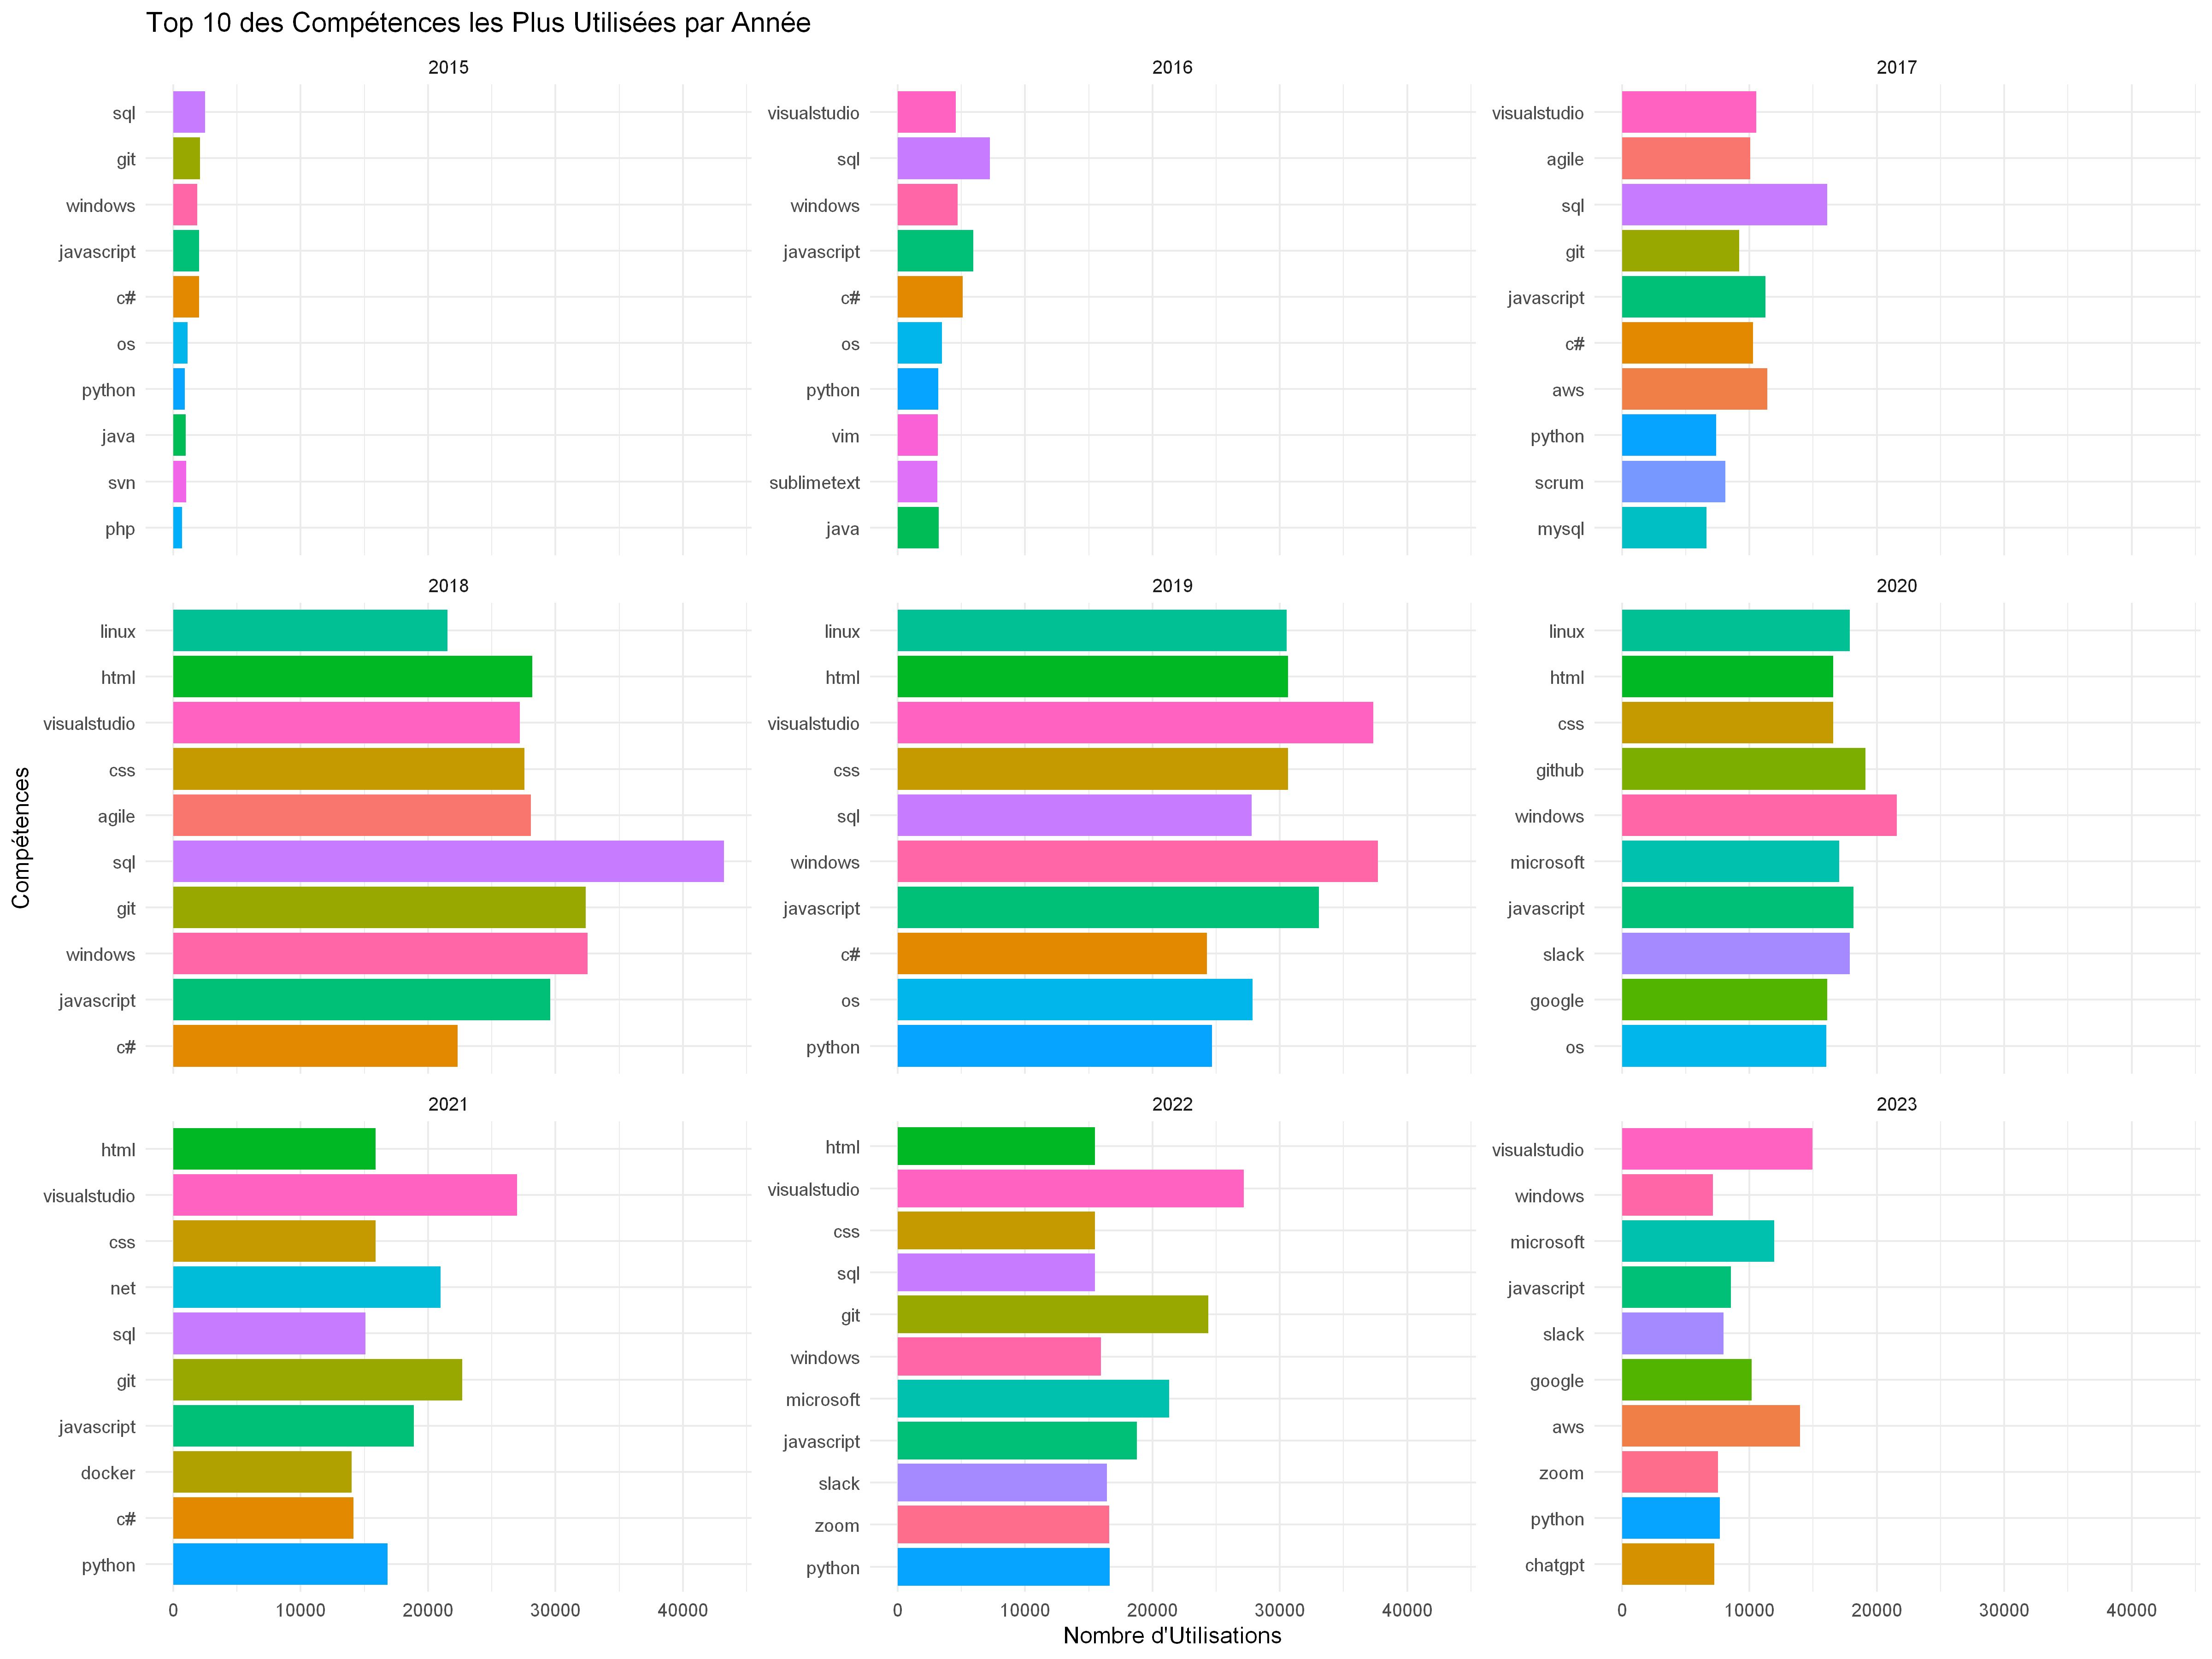

In [284]:
# Spécification de la taille du graphique
options(repr.plot.width=40, repr.plot.height=30)
ggplot(top_10_competences_per_year, aes(x = reorder(cleaned_competences, count), y = count, fill = cleaned_competences)) +
  geom_bar(stat = "identity") +
  facet_wrap(~ Year, scales = "free_y") +
  coord_flip() +
  labs(title = "Top 10 des Compétences les Plus Utilisées par Année",
       x = "Compétences",
       y = "Nombre d'Utilisations") +
  theme_minimal(base_size = 30) +
  theme(legend.position = "none")

In [285]:
glimpse(combined_data_long)

Rows: 4,516,312
Columns: 16
$ Year                         <dbl> 2015, 2015, 2015, 2015, 2015, 2015, 2015,…
$ pays                         <chr> "United States", "United States", "United…
$ genre                        <chr> "male", "male", "male", "male", "male", "…
$ experiences_en_programmation <dbl> 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 1…
$ type_developpeur             <chr> "back-end developer", "back-end developer…
$ salaire                      <dbl> NA, NA, NA, NA, NA, NA, 90000, 90000, 900…
$ statut_d_emploi              <chr> "employed, full-time", "employed, full-ti…
$ satisfaction_travail         <chr> "Slightly dissatisfied", "Slightly dissat…
$ age                          <dbl> 37.5, 37.5, 37.5, 37.5, 37.5, 37.5, 45.5,…
$ niveau_d_etudes              <chr> "Some College", "Some College", "Some Col…
$ taille_entreprise            <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N…
$ competences                  <chr> "Mac OS X;C#;JavaScript;SQL Server;Git;SV…
$ tech_next 

## Emergence des skills

In [286]:
combined_data_long_copy <- combined_data_long

In [287]:
first_appearance <- combined_data_long_copy %>%
  group_by(cleaned_competences) %>%
  summarise(first_year = min(Year), .groups = 'drop')

In [288]:
emergent_skills <- combined_data_long_copy %>%
  left_join(first_appearance, by = "cleaned_competences") %>%
  mutate(is_emergent = ifelse(Year == first_year, 1, 0))

In [289]:
emergent_summary <- emergent_skills %>%
  group_by(id, Year) %>%
  summarise(
    emergent_tot_skill_user = sum(is_emergent, na.rm = TRUE),
    emergent_skill_user = ifelse(any(is_emergent == 1, na.rm = TRUE), 1, 0),
    .groups = 'drop'
  )

In [290]:
combined_data_long_final <- combined_data_long %>%
  left_join(emergent_summary, by = c("id", "Year"))

In [291]:
# Vérifier les résultats
glimpse(combined_data_long_final)

Rows: 4,516,312
Columns: 18
$ Year                         <dbl> 2015, 2015, 2015, 2015, 2015, 2015, 2015,…
$ pays                         <chr> "United States", "United States", "United…
$ genre                        <chr> "male", "male", "male", "male", "male", "…
$ experiences_en_programmation <dbl> 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 1…
$ type_developpeur             <chr> "back-end developer", "back-end developer…
$ salaire                      <dbl> NA, NA, NA, NA, NA, NA, 90000, 90000, 900…
$ statut_d_emploi              <chr> "employed, full-time", "employed, full-ti…
$ satisfaction_travail         <chr> "Slightly dissatisfied", "Slightly dissat…
$ age                          <dbl> 37.5, 37.5, 37.5, 37.5, 37.5, 37.5, 45.5,…
$ niveau_d_etudes              <chr> "Some College", "Some College", "Some Col…
$ taille_entreprise            <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N…
$ competences                  <chr> "Mac OS X;C#;JavaScript;SQL Server;Git;SV…
$ tech_next 

In [292]:
head(combined_data_long_final %>% filter(emergent_skill_user==1, Year == 2016))

Year,pays,genre,experiences_en_programmation,type_developpeur,salaire,statut_d_emploi,satisfaction_travail,age,niveau_d_etudes,taille_entreprise,competences,tech_next,id,taille_entreprise_numeric,cleaned_competences,emergent_tot_skill_user,emergent_skill_user
<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>,<dbl>,<dbl>
2016,United States,male,13,devops,105000,"employed, full-time",Slightly satisfied,37,Other,"10,000+ employees",Perl; SQL;Windows 7;Notepad++; Vim,Go; Perl; SQL,3733,10000,perl,2,1
2016,United States,male,13,devops,105000,"employed, full-time",Slightly satisfied,37,Other,"10,000+ employees",Perl; SQL;Windows 7;Notepad++; Vim,Go; Perl; SQL,3733,10000,sql,2,1
2016,United States,male,13,devops,105000,"employed, full-time",Slightly satisfied,37,Other,"10,000+ employees",Perl; SQL;Windows 7;Notepad++; Vim,Go; Perl; SQL,3733,10000,windows,2,1
2016,United States,male,13,devops,105000,"employed, full-time",Slightly satisfied,37,Other,"10,000+ employees",Perl; SQL;Windows 7;Notepad++; Vim,Go; Perl; SQL,3733,10000,notepad++,2,1
2016,United States,male,13,devops,105000,"employed, full-time",Slightly satisfied,37,Other,"10,000+ employees",Perl; SQL;Windows 7;Notepad++; Vim,Go; Perl; SQL,3733,10000,vim,2,1
2016,United States,female,8,full-stack developer,35000,"employed, full-time",Extremely satisfied,37,Other,100-499 employees,JavaScript; LAMP; PHP; SQL; SQL Server;Windows 7;Atom; Notepad++; Sublime; Vim; PhpStorm; Visual Studio; Visual Studio Code,Arduino / Raspberry Pi; AngularJS; C#; Node.js; Python; Ruby,3734,300,javascript,4,1


In [293]:
unique(combined_data_long_final$emergent_skill_user)

[1] 1 0

In [294]:
nrow(combined_data_long_final)

[1] 4516312

## Régression sur l'émergence des skills

In [295]:
glimpse(combined_data_long_final)

Rows: 4,516,312
Columns: 18
$ Year                         <dbl> 2015, 2015, 2015, 2015, 2015, 2015, 2015,…
$ pays                         <chr> "United States", "United States", "United…
$ genre                        <chr> "male", "male", "male", "male", "male", "…
$ experiences_en_programmation <dbl> 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 1…
$ type_developpeur             <chr> "back-end developer", "back-end developer…
$ salaire                      <dbl> NA, NA, NA, NA, NA, NA, 90000, 90000, 900…
$ statut_d_emploi              <chr> "employed, full-time", "employed, full-ti…
$ satisfaction_travail         <chr> "Slightly dissatisfied", "Slightly dissat…
$ age                          <dbl> 37.5, 37.5, 37.5, 37.5, 37.5, 37.5, 45.5,…
$ niveau_d_etudes              <chr> "Some College", "Some College", "Some Col…
$ taille_entreprise            <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N…
$ competences                  <chr> "Mac OS X;C#;JavaScript;SQL Server;Git;SV…
$ tech_next 

In [296]:
combined_data_long_final = detect_outliers1pourcent(combined_data_long_final)

In [297]:
combined_data_long_final = combined_data_long_final %>% filter(!(is.na(cleaned_competences)))

In [298]:
combined_data_long_final = combined_data_long_final %>% select(-c(pays,competences,tech_next,taille_entreprise,salaire,Q1,Q99,is_outlier))

In [299]:
combined_data_long_final$genre = as_factor(combined_data_long_final$genre)
combined_data_long_final$type_developpeur = as_factor(combined_data_long_final$type_developpeur)
combined_data_long_final$statut_d_emploi = as_factor(combined_data_long_final$statut_d_emploi)
combined_data_long_final$satisfaction_travail = as_factor(combined_data_long_final$satisfaction_travail)
#combined_data_long_final$cleaned_competences = as_factor(combined_data_long_final$cleaned_competences)

In [300]:
restriction_combined_data_long_final = combined_data_long_final %>% select(-c(id,emergent_tot_skill_user,cleaned_competences))

In [301]:
restriction_combined_data_long_final <- restriction_combined_data_long_final %>%
  distinct()

In [302]:
glimpse(restriction_combined_data_long_final)

Rows: 185,278
Columns: 11
$ Year                         <dbl> 2015, 2015, 2015, 2015, 2015, 2015, 2015,…
$ genre                        <fct> "male", "male", "male", "male", "male", "…
$ experiences_en_programmation <dbl> 11.0, 11.0, 11.0, 8.0, 11.0, 11.0, 11.0, …
$ type_developpeur             <fct> "back-end developer", "back-end developer…
$ statut_d_emploi              <fct> "employed, full-time", "independent contr…
$ satisfaction_travail         <fct> Slightly dissatisfied, Slightly satisfied…
$ age                          <dbl> 37.5, 45.5, 37.5, 32.5, 45.5, 37.5, 32.5,…
$ niveau_d_etudes              <chr> "Some College", "Some College", "Other", …
$ taille_entreprise_numeric    <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N…
$ emergent_skill_user          <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,…
$ salaire_corrected            <dbl> NA, 90000, 90000, 90000, 110000, 130000, …


In [303]:
model_emergence = lm(emergent_skill_user ~ ., data = restriction_combined_data_long_final)

In [304]:
summary(model_emergence)


Call:
lm(formula = emergent_skill_user ~ ., data = restriction_combined_data_long_final)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.3126 -0.4142  0.1574  0.2480  0.8504 

Coefficients:
                                                                      Estimate
(Intercept)                                                         -2.166e+02
Year                                                                 1.077e-01
genrefemale                                                         -6.765e-02
genrenot precised                                                   -1.913e-02
genretransgender                                                    -5.500e-02
genrenon-binary                                                      2.796e-02
experiences_en_programmation                                         2.364e-03
type_developpeurbi / dw expert                                       9.389e-02
type_developpeurdata scientist / machine learning                    8.456e-02
type_develo

In [305]:
restriction_combined_data_long_final2 = combined_data_long_final %>% select(-c(id,emergent_skill_user,cleaned_competences))

In [306]:
restriction_combined_data_long_final2 <- restriction_combined_data_long_final2 %>%
  distinct()

In [307]:
glimpse(restriction_combined_data_long_final2)

Rows: 190,659
Columns: 11
$ Year                         <dbl> 2015, 2015, 2015, 2015, 2015, 2015, 2015,…
$ genre                        <fct> "male", "male", "male", "male", "male", "…
$ experiences_en_programmation <dbl> 11.0, 11.0, 11.0, 8.0, 11.0, 11.0, 11.0, …
$ type_developpeur             <fct> "back-end developer", "back-end developer…
$ statut_d_emploi              <fct> "employed, full-time", "independent contr…
$ satisfaction_travail         <fct> Slightly dissatisfied, Slightly satisfied…
$ age                          <dbl> 37.5, 45.5, 37.5, 32.5, 45.5, 37.5, 32.5,…
$ niveau_d_etudes              <chr> "Some College", "Some College", "Other", …
$ taille_entreprise_numeric    <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N…
$ emergent_tot_skill_user      <dbl> 6, 17, 4, 6, 10, 26, 13, 5, 5, 12, 7, 8, …
$ salaire_corrected            <dbl> NA, 90000, 90000, 90000, 110000, 130000, …


In [308]:
model_emergence_tot = lm(emergent_tot_skill_user ~ ., data = restriction_combined_data_long_final2)

In [309]:
summary(model_emergence_tot)


Call:
lm(formula = emergent_tot_skill_user ~ ., data = restriction_combined_data_long_final2)

Residuals:
    Min      1Q  Median      3Q     Max 
-29.863  -6.420  -2.530   3.027 162.527 

Coefficients:
                                                                      Estimate
(Intercept)                                                         -1.064e+04
Year                                                                 5.276e+00
genrefemale                                                         -1.078e+00
genrenot precised                                                    1.408e+00
genretransgender                                                     6.569e+00
genrenon-binary                                                      5.864e+00
experiences_en_programmation                                         2.884e-01
type_developpeurbi / dw expert                                       3.184e+00
type_developpeurdata scientist / machine learning                    2.455e+00
type_d

## LDA

In [ ]:
print(unique(combined_data_long_final$cleaned_competences))

In [310]:
#install.packages(c("tm", "topicmodels", "text2vec", "tidytext"))

In [311]:
library(tm)
library(tidytext)
library(topicmodels)

Warning message:
"le package 'tm' a été compilé avec la version R 4.3.3"
Le chargement a nécessité le package : NLP


Attachement du package : 'NLP'


L'objet suivant est masqué depuis 'package:ggplot2':

    annotate


Warning message:
"le package 'tidytext' a été compilé avec la version R 4.3.3"
Warning message:
"le package 'topicmodels' a été compilé avec la version R 4.3.3"


In [312]:
glimpse(combined_data_long_final)

Rows: 4,326,104
Columns: 14
$ Year                         <dbl> 2015, 2015, 2015, 2015, 2015, 2015, 2015,…
$ genre                        <fct> "male", "male", "male", "male", "male", "…
$ experiences_en_programmation <dbl> 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 1…
$ type_developpeur             <fct> "back-end developer", "back-end developer…
$ statut_d_emploi              <fct> "employed, full-time", "employed, full-ti…
$ satisfaction_travail         <fct> Slightly dissatisfied, Slightly dissatisf…
$ age                          <dbl> 37.5, 37.5, 37.5, 37.5, 37.5, 37.5, 45.5,…
$ niveau_d_etudes              <chr> "Some College", "Some College", "Some Col…
$ id                           <int> 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,…
$ taille_entreprise_numeric    <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N…
$ cleaned_competences          <chr> "os", "c#", "javascript", "sql", "git", "…
$ emergent_tot_skill_user      <dbl> 6, 6, 6, 6, 6, 6, 17, 17, 17, 17, 17, 17,…
$ emergent_s

In [313]:
copy_combined_data_long_final = combined_data_long_final %>% select(-c(emergent_tot_skill_user,emergent_skill_user))

In [314]:
copy_combined_data_long_final <- copy_combined_data_long_final %>%
  filter(Year==2022) %>%
  #separate_rows(cleaned_competences, sep = ";") %>%
  count(id, cleaned_competences) %>%
  cast_dtm(id, cleaned_competences, n)

In [ ]:
num_topics <- 10

lda_model <- LDA(combined_data_long_final, k = num_topics, control = list(seed = 1234))

In [ ]:
topics <- tidy(lda_model, matrix = "beta")

In [ ]:
top_terms <- topics %>%
  group_by(topic) %>%
  top_n(10, beta) %>%
  ungroup() %>%
  arrange(topic, -beta)

print(top_terms)

In [ ]:
document_topics <- tidy(lda_model, matrix = "gamma")

In [ ]:
print(document_topics)